# <u>**Kaggle Competitions: House Price - Data Cleaning**</u>

## <span style = 'color: red'>**Importing Stage**</span>

In [1]:
# import basic data cleaning libraries
import pandas as pd
import numpy as np
# hide warnings if max iteration time does not converge
import warnings
# data visualization (along with EDA stage)
import matplotlib.pyplot as plt
import seaborn as sns
# data preprocessing (along with EDA stage)
from sklearn.preprocessing import PowerTransformer
from scipy.stats import skew, f_oneway, chi2_contingency
# saving dataframes or models
import joblib

In [2]:
# ignore warning messages
warnings.filterwarnings('ignore')
# show all columns
pd.set_option('display.max_columns', None)

## <span style = 'color: red'>**Importing Data**</span>

In [3]:
file = '../data/train.csv'
df = pd.read_csv(file)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

In [5]:
df_clean = df.copy()

In [6]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### <span style = 'color: yellow'>MSSubClass</span>
#### - categorical variable stored as numbers that identifies the type of dwelling (residential structure) invovled in the sale
#### - no missing value

In [7]:
df_clean['MSSubClass'].isna().sum()

np.int64(0)

In [8]:
df_clean['MSSubClass'].value_counts()

MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64

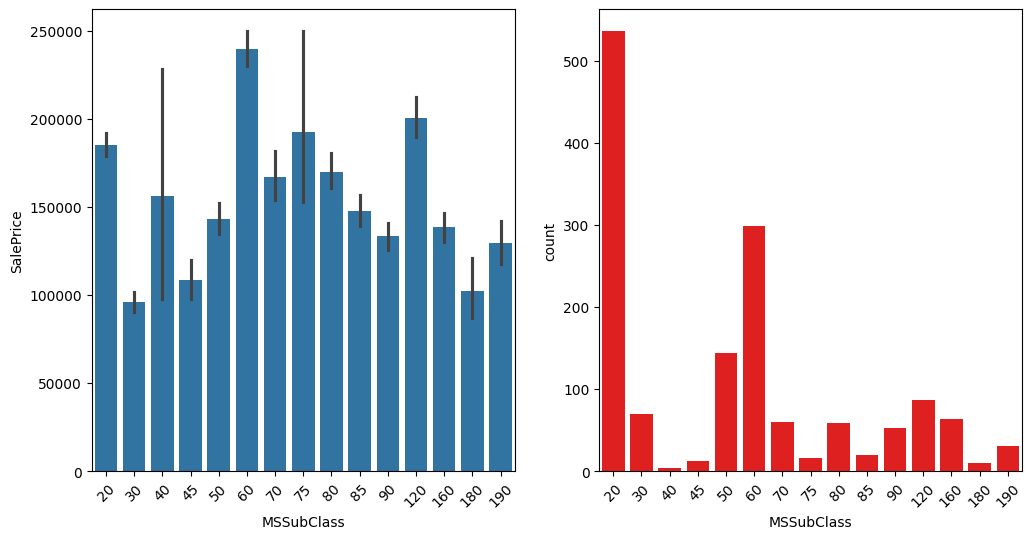

In [9]:
def categorical_correlation_plot(df, feature, target):
    fig, ax = plt.subplots(1, 2, figsize = [12, 6])
    sns.barplot(data = df, x = feature, y = target, ax = ax[0])
    if len(df[feature].unique()) > 7:
        ax[0].tick_params(axis="x", rotation=45)
    sns.countplot(data = df, x = feature, ax = ax[1], color = 'red')
    if len(df[feature].unique()) > 7:
        ax[1].tick_params(axis="x", rotation=45)
categorical_correlation_plot(df_clean, 'MSSubClass', 'SalePrice')

In [10]:
df_clean['MSSubClass'].unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40])

In [11]:
# split the numeric target into groups based on the categorical feature
# use a function to make ANOVA test
def anova_test(df, feature, target):
    # to store all the groups that has different categorical value
    groups = []
    # store target value with different sub class in MSSubClass
    for sub_class in df[feature].unique():
        groups.append(df[df[feature] == sub_class][target])
    # perform ANOVA test
    f_stat, p_value = f_oneway(*groups)
    return f_stat, p_value
    
f_stat, p_value = anova_test(df_clean, 'MSSubClass', 'SalePrice')
print(f'f_stat value between MSSubClass and SalePrice is: {round(f_stat, 4)}')
print(f'p_value between MSSubClass and SalePrice is: {p_value}')

f_stat value between MSSubClass and SalePrice is: 33.7321
p_value between MSSubClass and SalePrice is: 8.662166266096959e-79


#### <span style = 'color: green'><u>**OneHotEncoder**</u></span>

### <span style = 'color: yellow'>MSZoning</span>

In [12]:
df_clean['MSZoning'].isna().sum()

np.int64(0)

In [13]:
df_clean['MSZoning'].value_counts()

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

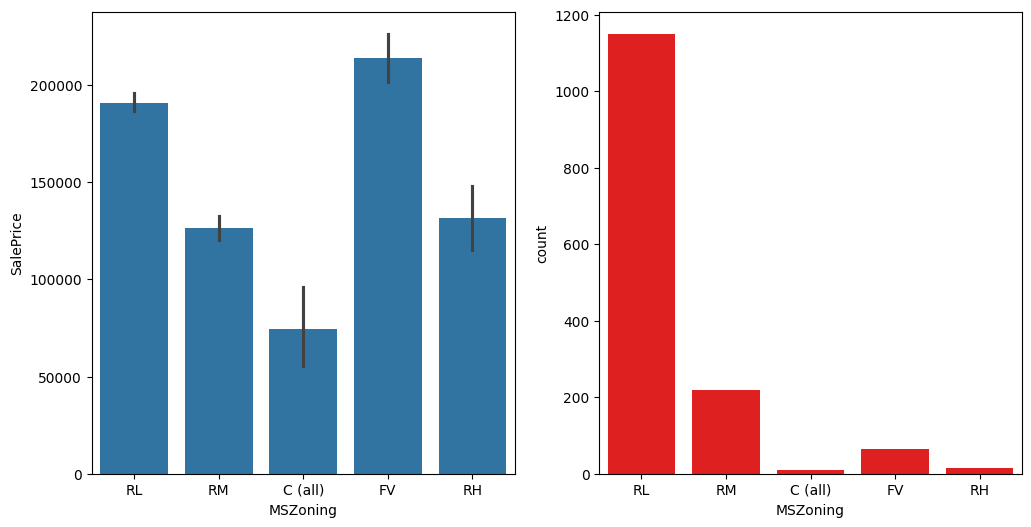

In [14]:
categorical_correlation_plot(df_clean, 'MSZoning', 'SalePrice')

In [15]:
f_stat, p_value = anova_test(df_clean, 'MSZoning', 'SalePrice')
print(f'f_stat value between MSSubClass and SalePrice is: {round(f_stat, 4)}')
print(f'p_value between MSSubClass and SalePrice is: {p_value}')

f_stat value between MSSubClass and SalePrice is: 43.8403
p_value between MSSubClass and SalePrice is: 8.817633866272648e-35


#### - check the MSSubClass and MSZoning is correlated and overlap using <u>Chi-Square Test

In [16]:
contingency_table = pd.crosstab(df_clean['MSSubClass'], df_clean['MSZoning'])
print(contingency_table)
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f'chi2 value between MSSubClass and MSZoning is: {chi2}')
print(f'p_value between MSSubClass and MSZoning is {p_value}')

MSZoning    C (all)  FV  RH   RL  RM
MSSubClass                          
20                2  13   3  508  10
30                2   0   1   33  33
40                0   0   0    2   2
45                0   0   1    4   7
50                4   0   1   88  51
60                0  25   0  273   1
70                1   0   3   30  26
75                0   0   0    6  10
80                0   0   0   58   0
85                0   0   0   20   0
90                0   0   3   43   6
120               0   5   2   59  21
160               0  22   0   11  30
180               0   0   0    0  10
190               1   0   2   16  11
chi2 value between MSSubClass and MSZoning is: 718.6314037798862
p_value between MSSubClass and MSZoning is 8.828110487123363e-116


#### <span style = 'color: green'><u>**OneHotEncoder**</u></span>

### <span style = 'color: yellow'>LotFrontage - the linear feet of the property that founts the street</span>

In [17]:
df_clean['LotFrontage'].isna().sum()

np.int64(259)

             LotFrontage  SalePrice
LotFrontage     1.000000   0.351799
SalePrice       0.351799   1.000000


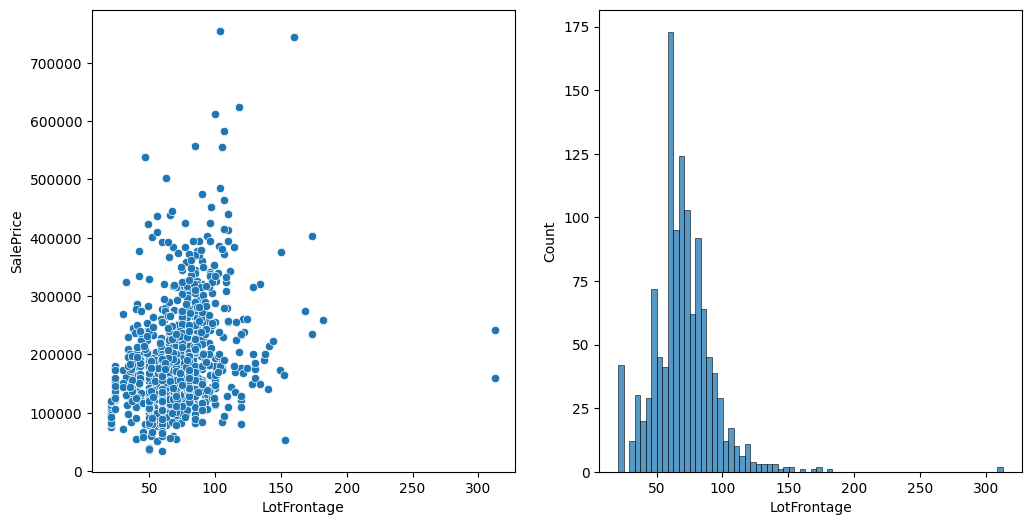

In [18]:
def numeric_correlation(data, feature, target):
    corr = data[[feature, target]].corr()
    print(corr)
    fig, ax = plt.subplots(1, 2, figsize = [12, 6])
    sns.scatterplot(data = data, x = feature, y = target, ax = ax[0])
    sns.histplot(data = data, x = feature, ax = ax[1])
    plt.show()
numeric_correlation(df_clean, 'LotFrontage', 'SalePrice')

#### <span style = 'color: green'>From above plots, we can tell that LotFrontage has lots of missing value</span>
#### <span style = 'color: green'>Also, LotFrontage is right-skewed distribution</span>
#### <span style = 'color: green'><u>**SimpleImputer with median, PowerTransformer, and StandardScaler**</u></span>

### <span style = 'color: yellow'>LotArea - total area of the lot (land) is square feet</span>

In [19]:
df_clean['LotArea'].isna().sum()

np.int64(0)

            LotArea  SalePrice
LotArea    1.000000   0.263843
SalePrice  0.263843   1.000000


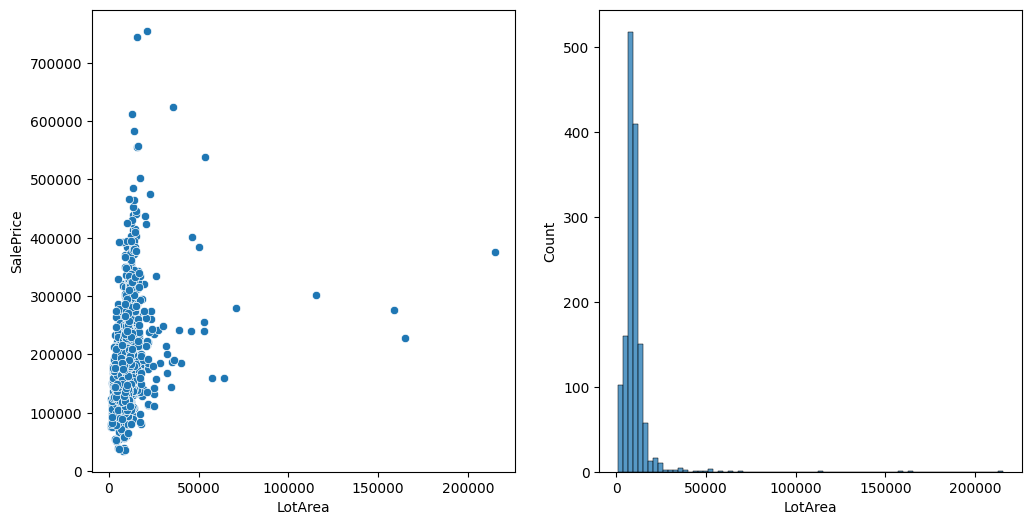

In [20]:
numeric_correlation(df_clean, 'LotArea', 'SalePrice')

#### <span style = 'color: green'><u>**PowerTransformer, and StandardScaler**</u></span>

### <span style = 'color: gray'>*LotRatio - ratio of front area divived by total lot area</span>
### - will be done in Pipeline preprocessor
### - feature that is featured engineered

### <span style = 'color: yellow'>Street - type of raod access to property</span>

In [21]:
df_clean['Street'].isna().sum()

np.int64(0)

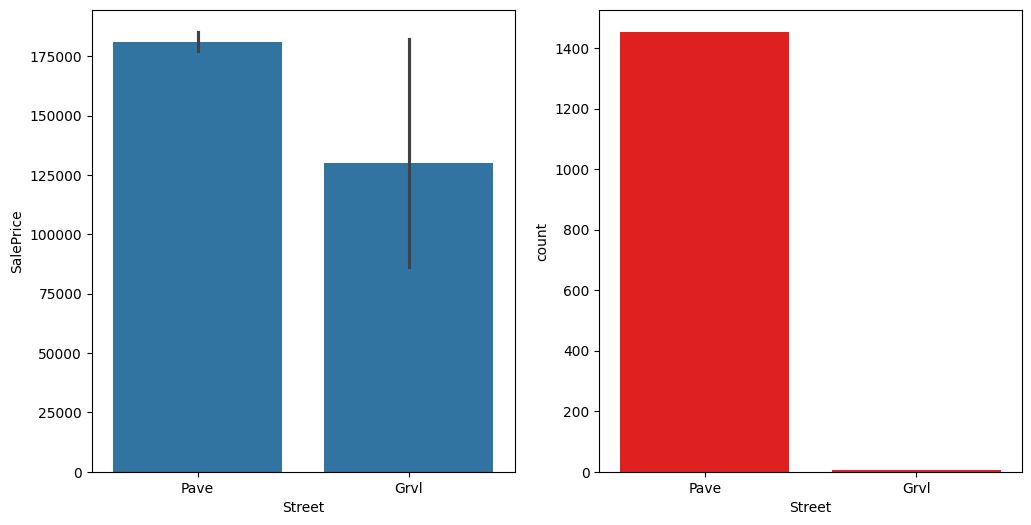

In [22]:
categorical_correlation_plot(df_clean, 'Street', 'SalePrice')

In [23]:
f_stat, p_value = anova_test(df_clean, 'Street', 'SalePrice')
print(f'f_stat value between Street and SalePrice is: {round(f_stat, 4)}')
print(f'p_value between Street and SalePrice is: {p_value}')

f_stat value between Street and SalePrice is: 2.4593
p_value between Street and SalePrice is: 0.1170486040678794


#### <span style = 'color: green'><u>**OneHotEncoder**</u></span>

### <span style = 'color: yellow'>Alley - type of alley access to property</span>

In [24]:
df_clean['Alley'].isna().sum()

np.int64(1369)

In [25]:
df_clean['Alley'].value_counts()

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

In [26]:
df_clean['Alley'] = df_clean['Alley'].replace(np.nan, 'NoAlley')

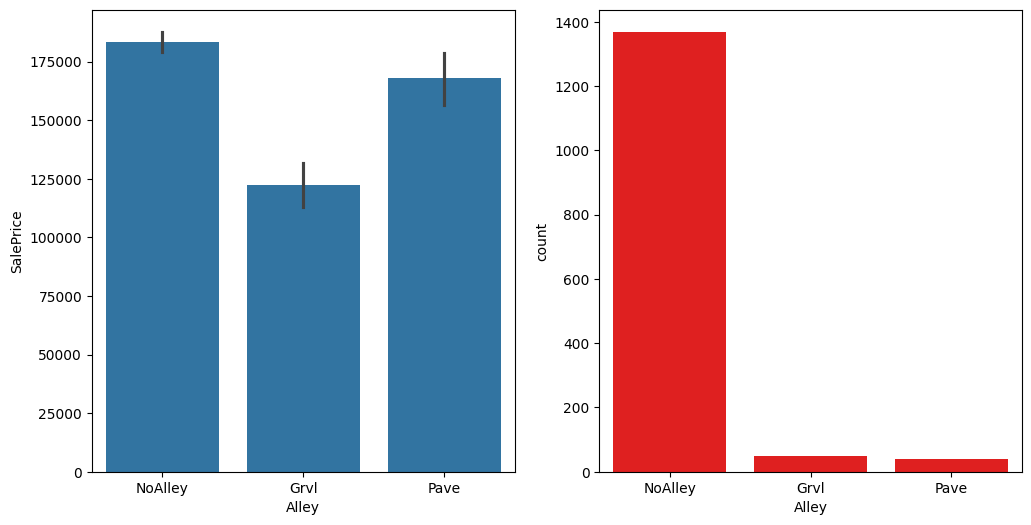

In [27]:
categorical_correlation_plot(df_clean, 'Alley', 'SalePrice')

In [28]:
f_stat, p_value = anova_test(df_clean, 'Alley', 'SalePrice')
print(f'f_stat value between MSSubClass and SalePrice is: {round(f_stat, 4)}')
print(f'p_value between MSSubClass and SalePrice is: {p_value}')

f_stat value between MSSubClass and SalePrice is: 15.1766
p_value between MSSubClass and SalePrice is: 2.996379680548782e-07


#### <span style = 'color: green'><u>**OneHotEncoder**</u></span>

### <span style = 'color: yellow'>LotShape - general shape of property</span>

In [29]:
df_clean['LotShape'].isna().sum()

np.int64(0)

In [30]:
df_clean['LotShape'].value_counts()

LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64

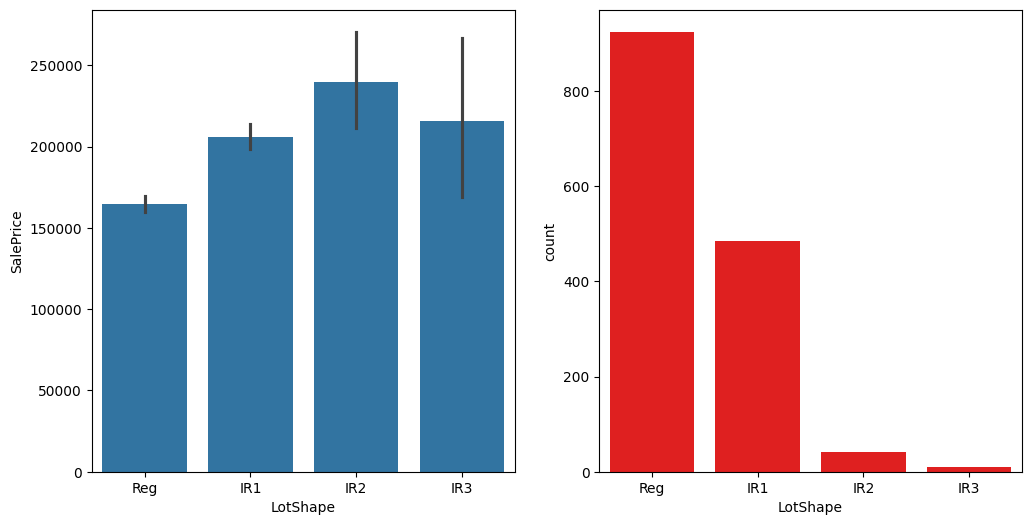

In [31]:
categorical_correlation_plot(df_clean, 'LotShape', 'SalePrice')

In [32]:
f_stat, p_value = anova_test(df_clean, 'LotShape', 'SalePrice')
print(f'f_stat value between LotShape and SalePrice is: {round(f_stat, 4)}')
print(f'p_value between LotShape and SalePrice is: {p_value}')

f_stat value between LotShape and SalePrice is: 40.1329
p_value between LotShape and SalePrice is: 6.447523852014698e-25


#### <span style = 'color: green'><u>**OneHotEncoder**</u></span>

### <span style = 'color: yellow'>LandContour - flatness of the property</span>

In [33]:
df_clean['LandContour'].isna().sum()

np.int64(0)

In [34]:
df_clean['LandContour'].value_counts()

LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64

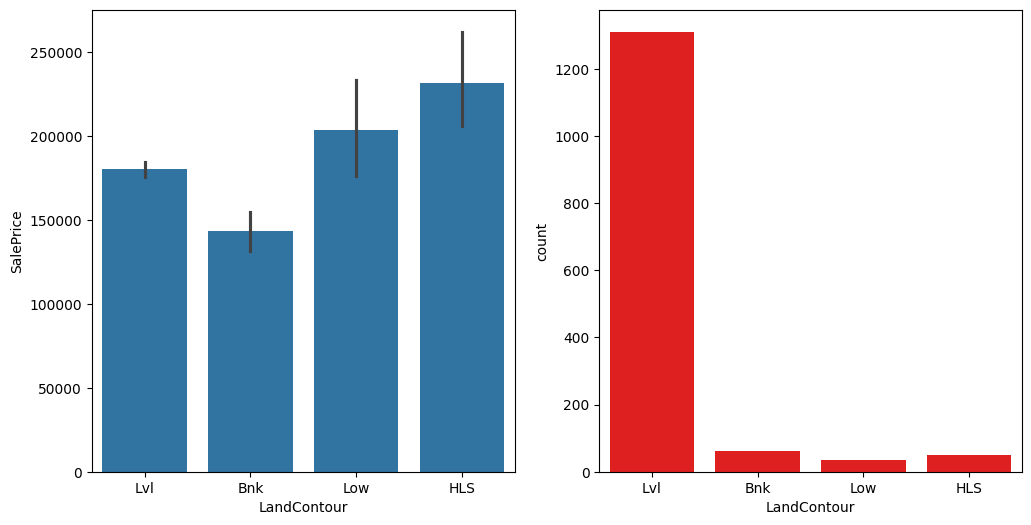

In [35]:
categorical_correlation_plot(df_clean, 'LandContour', 'SalePrice')

In [36]:
f_stat, p_value = anova_test(df_clean, 'LandContour', 'SalePrice')
print(f'f_stat value between LandContour and SalePrice is: {round(f_stat, 4)}')
print(f'p_value between LandContour and SalePrice is: {p_value}')

f_stat value between LandContour and SalePrice is: 12.8502
p_value between LandContour and SalePrice is: 2.7422167521391762e-08


#### <span style = 'color: green'><u>**OneHotEncoder**</u></span>

### <span style = 'color: yellow'>Utilities - type of utilities available</span>

In [37]:
df_clean['Utilities'].isna().sum()

np.int64(0)

In [38]:
df_clean['Utilities'].value_counts()

Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64

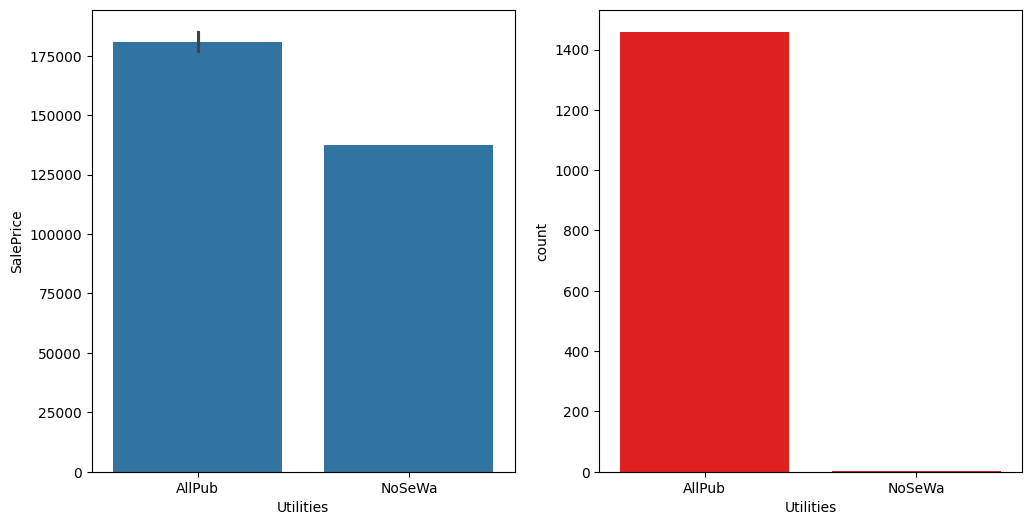

In [39]:
categorical_correlation_plot(df_clean, 'Utilities', 'SalePrice')

In [40]:
f_stat, p_value = anova_test(df_clean, 'Utilities', 'SalePrice')
print(f'f_stat value between Utilities and SalePrice is: {round(f_stat, 4)}')
print(f'p_value between Utilities and SalePrice is: {p_value}')

f_stat value between Utilities and SalePrice is: 0.2988
p_value between Utilities and SalePrice is: 0.5847167739687491


#### <span style = 'color: green'><u>**Extremely Imbalanced - Drop the feature**</u></span>

### <span style = 'color: yellow'>LotConfig - lot configuration</span>

In [41]:
df_clean['LotConfig'].isna().sum()

np.int64(0)

In [42]:
df_clean['LotConfig'].value_counts()

LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64

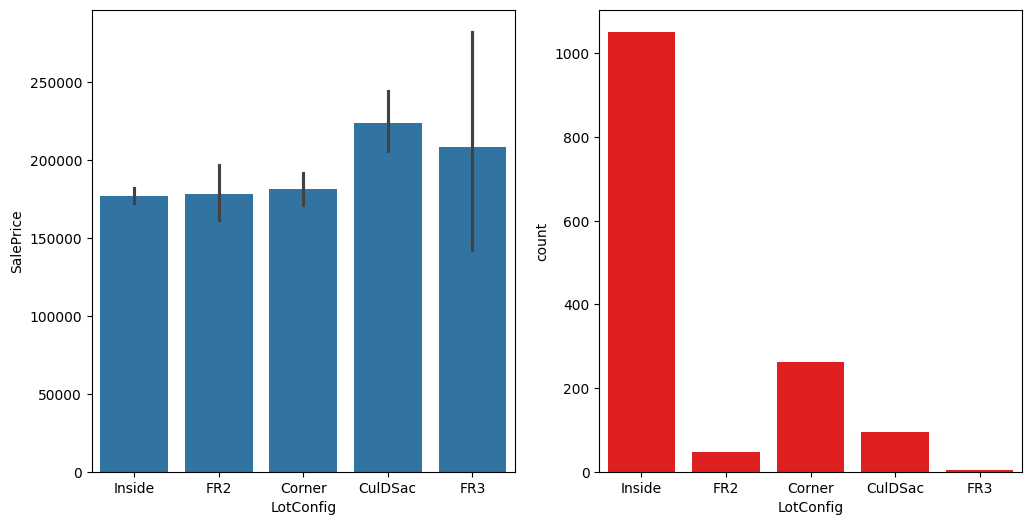

In [43]:
categorical_correlation_plot(df_clean, 'LotConfig', 'SalePrice')

In [44]:
f_stat, p_value = anova_test(df_clean, 'LotConfig', 'SalePrice')
print(f'f_stat value between LotConfig and SalePrice is: {round(f_stat, 4)}')
print(f'p_value between LotConfig and SalePrice is: {p_value}')

f_stat value between LotConfig and SalePrice is: 7.81
p_value between LotConfig and SalePrice is: 3.163167473604178e-06


### <span style = 'color: yellow'>LandSlope - slope of property</span>

In [45]:
df_clean['LandSlope'].isna().sum()

np.int64(0)

In [46]:
df_clean['LandSlope'].value_counts()

LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64

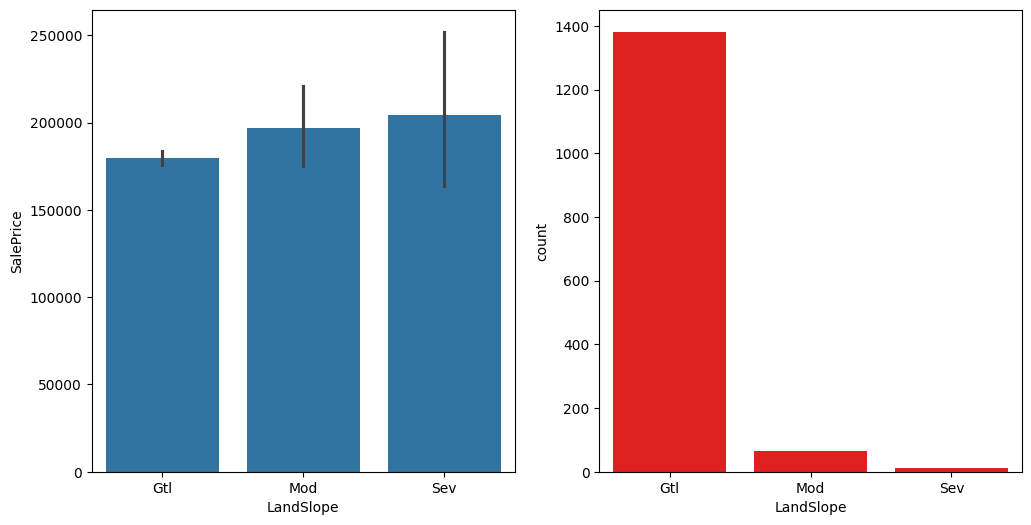

In [47]:
categorical_correlation_plot(df_clean, 'LandSlope', 'SalePrice')

In [48]:
f_stat, p_value = anova_test(df_clean, 'LandSlope', 'SalePrice')
print(f'f_stat value between LandSlope and SalePrice is: {round(f_stat, 4)}')
print(f'p_value between LandSlope and SalePrice is: {p_value}')

f_stat value between LandSlope and SalePrice is: 1.9588
p_value between LandSlope and SalePrice is: 0.14139635841153894


#### <span style = 'color: green'><u>**OneHotEncoder**</u></span>

### <span style = 'color: yellow'>Neighborhood - physical locations within Ames city limits</span>

In [49]:
df_clean['Neighborhood'].isna().sum()

np.int64(0)

In [50]:
df_clean['Neighborhood'].value_counts()

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64

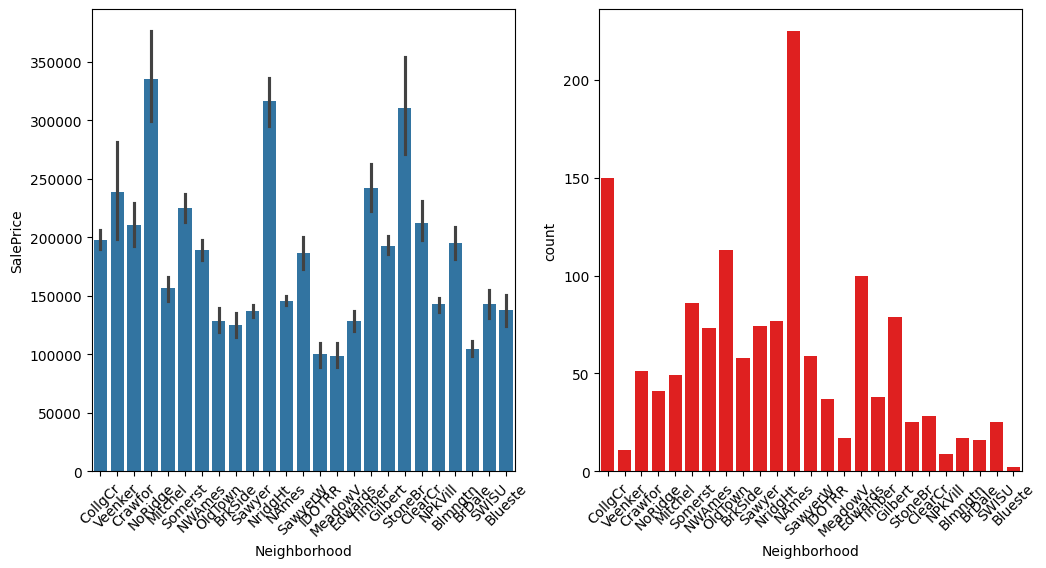

In [51]:
categorical_correlation_plot(df_clean, 'Neighborhood', 'SalePrice')

In [52]:
f_stat, p_value = anova_test(df_clean, 'Neighborhood', 'SalePrice')
print(f'f_stat value between Neighborhood and SalePrice is: {round(f_stat, 4)}')
print(f'p_value between Neighborhood and SalePrice is: {p_value}')

f_stat value between Neighborhood and SalePrice is: 71.7849
p_value between Neighborhood and SalePrice is: 1.5586002827718626e-225


### <span style = 'color: yellow'>Condition1 - proximity to various conditions</span>

In [53]:
df_clean['Condition1'].isna().sum()

np.int64(0)

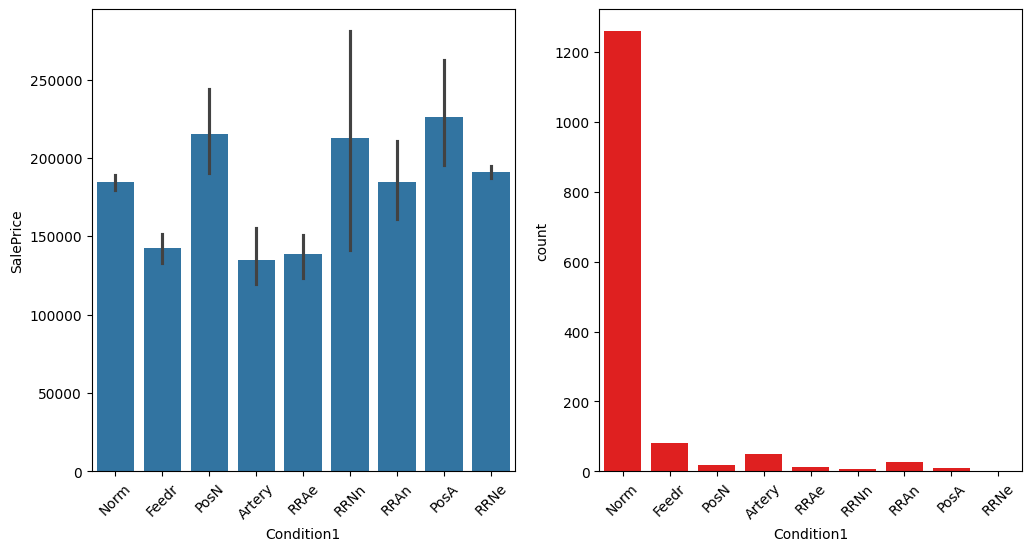

In [54]:
categorical_correlation_plot(df_clean, 'Condition1', 'SalePrice')

In [55]:
f_stat, p_value = anova_test(df_clean, 'Condition1', 'SalePrice')
print(f'f_stat value between Condition1 and SalePrice is: {round(f_stat, 4)}')
print(f'p_value between Condition1 and SalePrice is: {p_value}')

f_stat value between Condition1 and SalePrice is: 6.118
p_value between Condition1 and SalePrice is: 8.904549416146921e-08


### <span style = 'color: yellow'>Condition2 - proximity to various conditions (if more than one is present)</span>

In [56]:
df_clean['Condition2'].isna().sum()

np.int64(0)

In [57]:
df_clean['Condition2'].value_counts()

Condition2
Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: count, dtype: int64

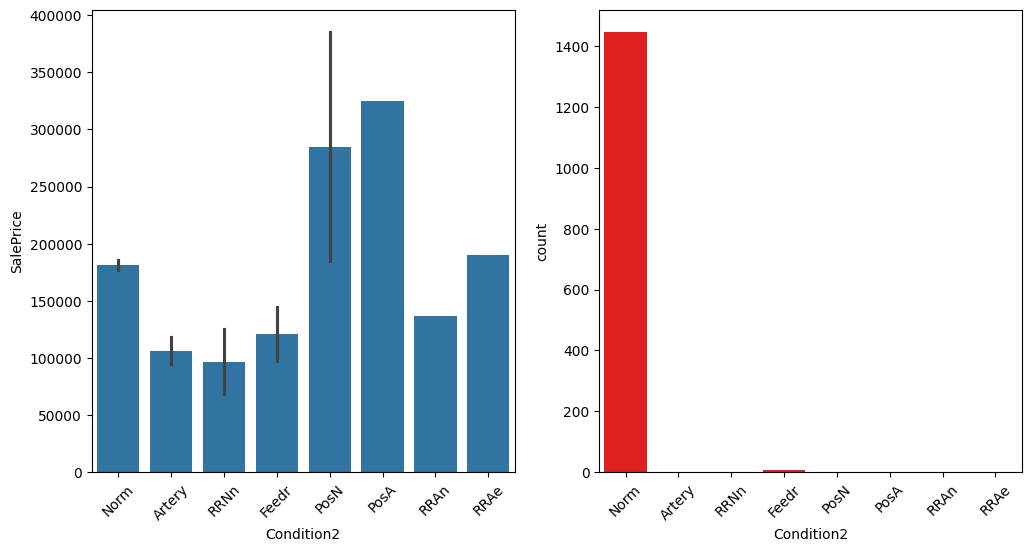

In [58]:
categorical_correlation_plot(df_clean, 'Condition2', 'SalePrice')

In [59]:
f_stat, p_value = anova_test(df_clean, 'Condition2', 'SalePrice')
print(f'f_stat value between Condition2 and SalePrice is: {round(f_stat, 4)}')
print(f'p_value between Condition2 and SalePrice is: {p_value}')

f_stat value between Condition2 and SalePrice is: 2.0739
p_value between Condition2 and SalePrice is: 0.04342565836094868


#### <span style = 'color: green'><u>**Extremely Imbalanced - Drop the feature**</u></span>

### <span style = 'color: yellow'>BldgType - type of dwelling</span>

In [60]:
df_clean['BldgType'].isna().sum()

np.int64(0)

In [61]:
df_clean['BldgType'].value_counts()

BldgType
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: count, dtype: int64

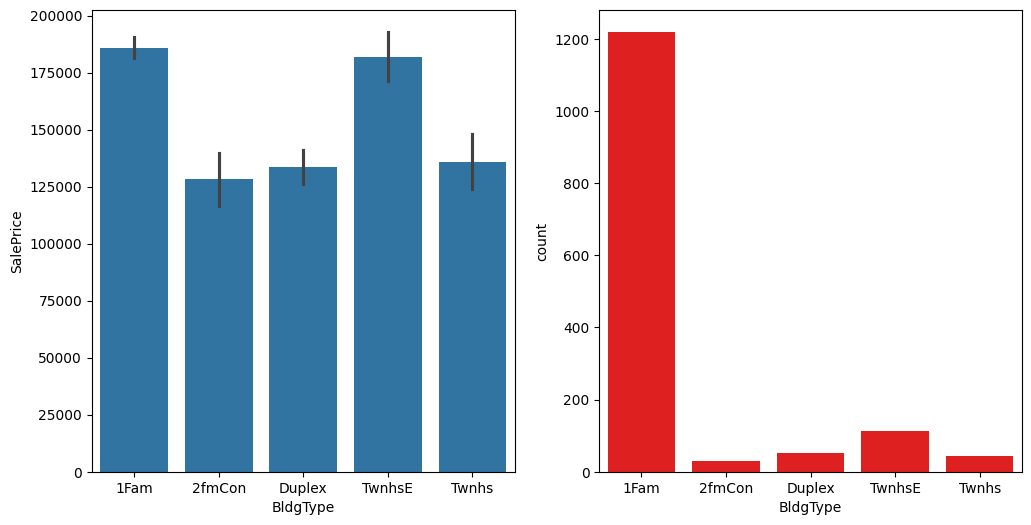

In [62]:
categorical_correlation_plot(df_clean, 'BldgType', 'SalePrice')

In [63]:
f_stat, p_value = anova_test(df_clean, 'BldgType', 'SalePrice')
print(f'f_stat value between BldgType and SalePrice is: {round(f_stat, 4)}')
print(f'p_value between BldgType and SalePrice is: {p_value}')

f_stat value between BldgType and SalePrice is: 13.0111
p_value between BldgType and SalePrice is: 2.0567364604967015e-10


#### <span style = 'color: green'><u>**Drop it becuz it is combined to new feature**</u></span>

### <span style = 'color: yellow'>HouseStyle - style of dwelling</span>

In [64]:
df_clean['HouseStyle'].isna().sum()

np.int64(0)

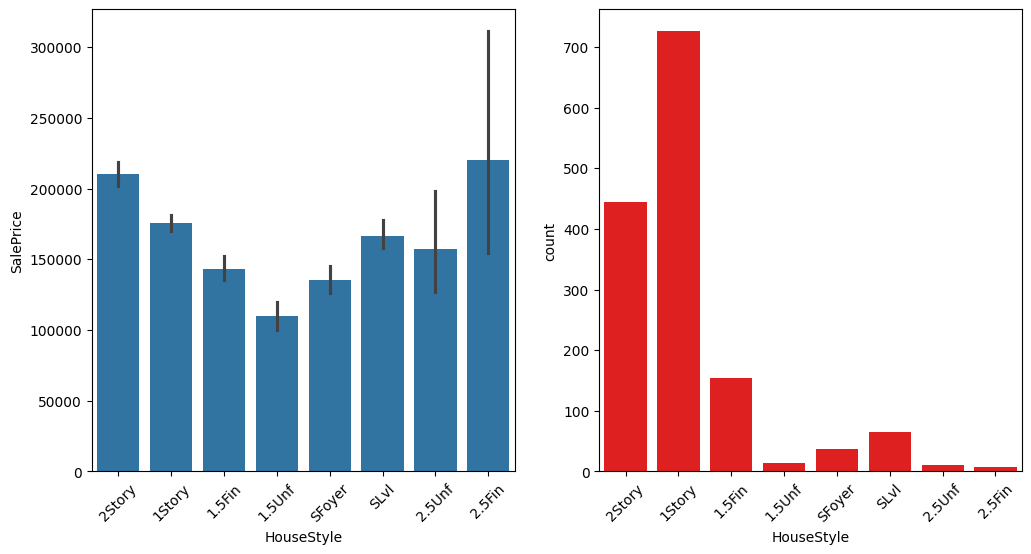

In [65]:
categorical_correlation_plot(df_clean, 'HouseStyle', 'SalePrice')

In [66]:
f_stat, p_value = anova_test(df_clean, 'HouseStyle', 'SalePrice')
print(f'f_stat value between HouseStyle and SalePrice is: {round(f_stat, 4)}')
print(f'p_value between HouseStyle and SalePrice is: {p_value}')

f_stat value between HouseStyle and SalePrice is: 19.595
p_value between HouseStyle and SalePrice is: 3.376776535121222e-25


#### <span style = 'color: green'><u>**Drop it becuz it is combined to new feature**</u></span>

### <span style = 'color: yellow'>Style_Type - type and style of dwelling</span>

In [67]:
df_clean['Style_Type'] = df_clean['BldgType'] + '_' + df_clean['HouseStyle']

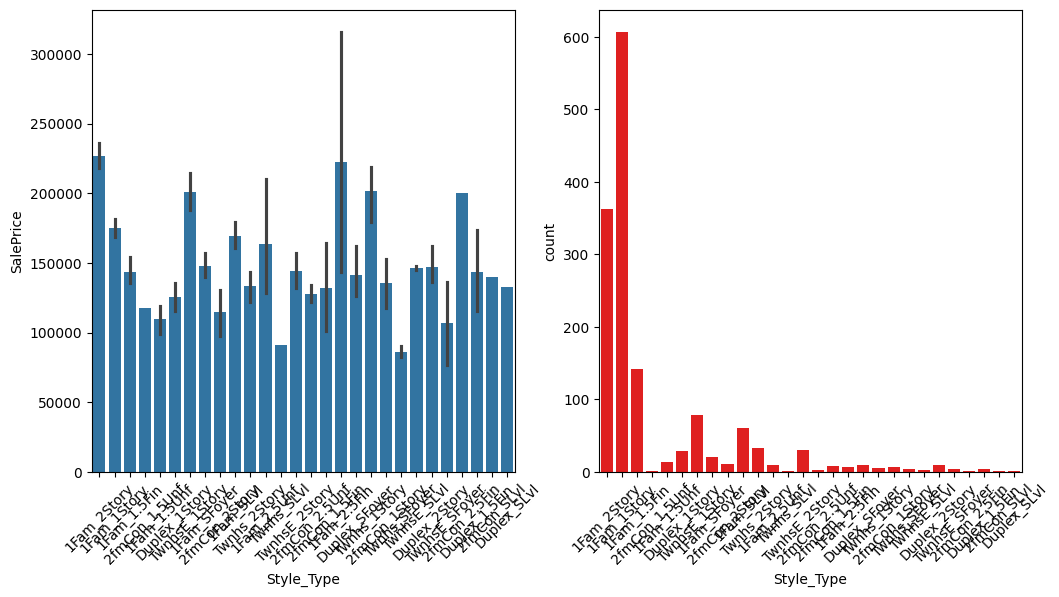

In [68]:
categorical_correlation_plot(df_clean, 'Style_Type', 'SalePrice')

In [69]:
f_stat, p_value = anova_test(df_clean, 'Style_Type', 'SalePrice')
print(f'f_stat value between Style_Type and SalePrice is: {round(f_stat, 4)}')
print(f'p_value between Style_Type and SalePrice is: {p_value}')

f_stat value between Style_Type and SalePrice is: 10.5145
p_value between Style_Type and SalePrice is: 3.448992086467835e-40


#### <span style = 'color: green'><u>**OneHotEncoder**</u></span>

### <span style = 'color: yellow'>OverallQual - Rates the overall material and finish of the house</span>

In [70]:
df_clean['OverallQual'].isna().sum()

np.int64(0)

In [71]:
df_clean['OverallQual'].value_counts()

OverallQual
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: count, dtype: int64

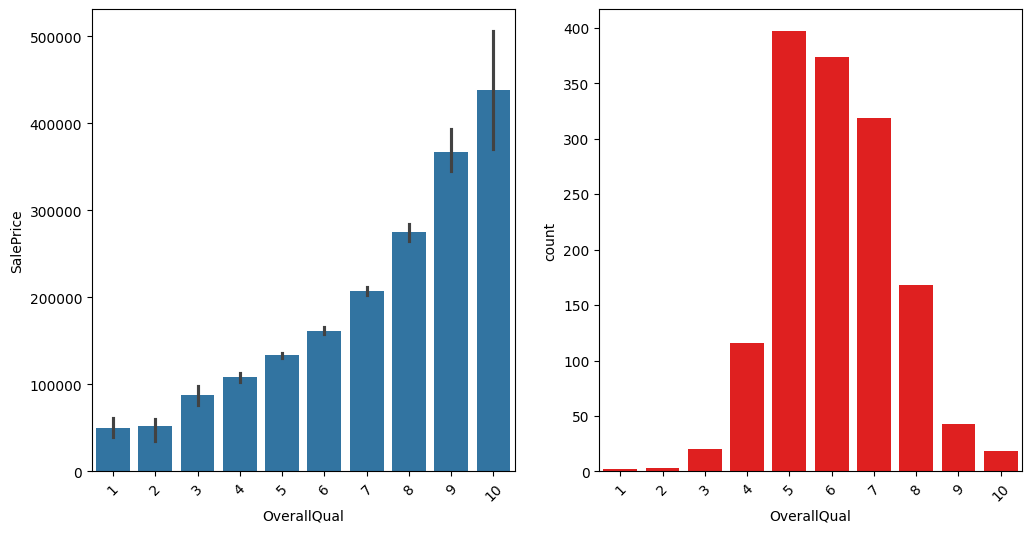

In [72]:
categorical_correlation_plot(df_clean, 'OverallQual', 'SalePrice')

In [73]:
f_stat, p_value = anova_test(df_clean, 'OverallQual', 'SalePrice')
print(f'f_stat value between OverallQual and SalePrice is: {round(f_stat, 4)}')
print(f'p_value between OverallQual and SalePrice is: {p_value}')

f_stat value between OverallQual and SalePrice is: 349.0268
p_value between OverallQual and SalePrice is: 0.0


#### <span style = 'color: green'><u>**ordinal - keep it (passthrough preprocessor)**</u></span>

### <span style = 'color: yellow'>OverallCond - Rates the overall condition of the house</span>

In [74]:
df_clean['OverallCond'].isna().sum()

np.int64(0)

In [75]:
df_clean['OverallCond'].value_counts()

OverallCond
5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: count, dtype: int64

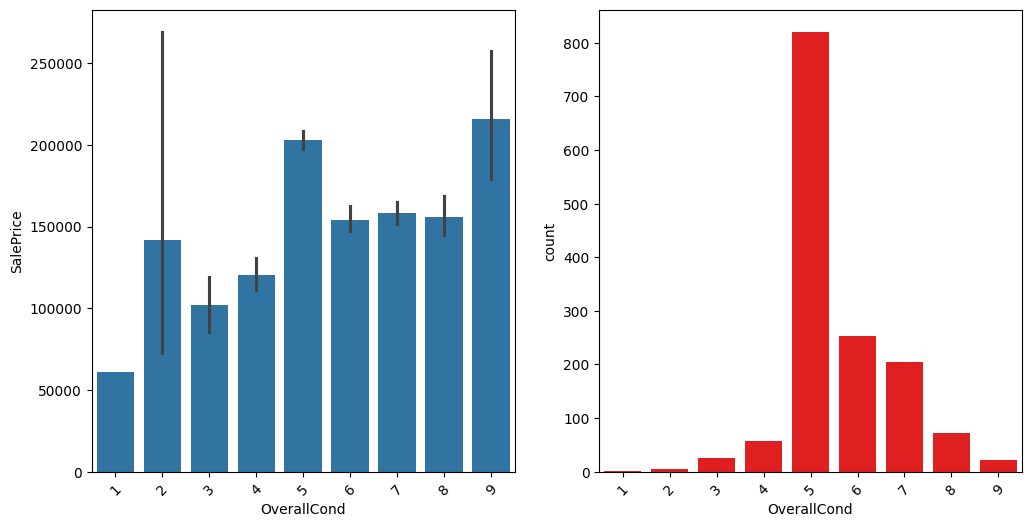

In [76]:
categorical_correlation_plot(df_clean, 'OverallCond', 'SalePrice')

In [77]:
f_stat, p_value = anova_test(df_clean, 'OverallCond', 'SalePrice')
print(f'f_stat value between OverallCond and SalePrice is: {round(f_stat, 4)}')
print(f'p_value between OverallCond and SalePrice is: {p_value}')

f_stat value between OverallCond and SalePrice is: 26.0032
p_value between OverallCond and SalePrice is: 7.962288819958536e-38


#### <span style = 'color: green'><u>**ordinal - keep it (passthrough preprocessor)**</u></span>

### <span style = 'color: yellow'>YearBuilt - Original construction date</span>

In [78]:
df_clean['YearBuilt'].isna().sum()

np.int64(0)

           YearBuilt  SalePrice
YearBuilt   1.000000   0.522897
SalePrice   0.522897   1.000000


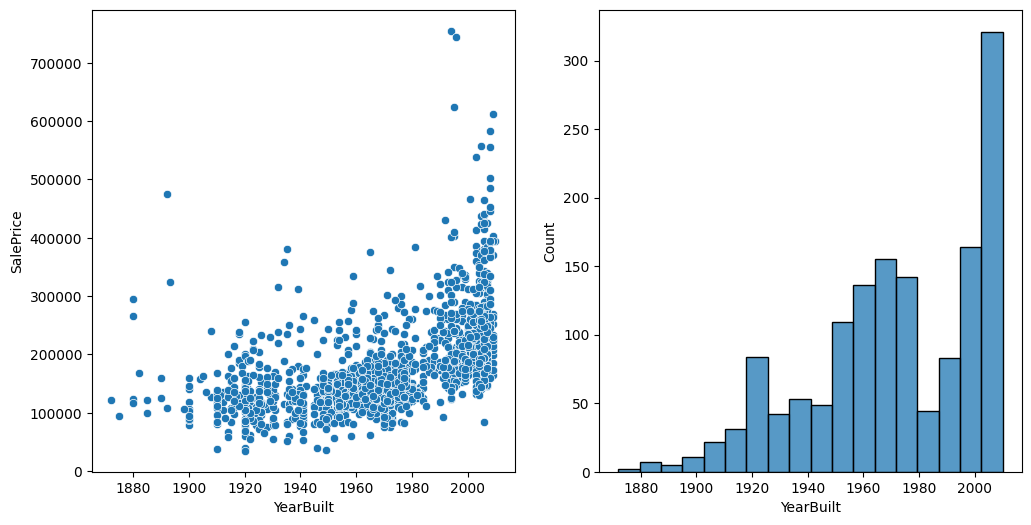

In [79]:
numeric_correlation(df_clean, 'YearBuilt', 'SalePrice')

#### <span style = 'color: green'><u>**drop it becuz it is combined to new feature**</u></span>

### <span style = 'color: yellow'>YearRemodAdd - remodel date (same as construction date if no remodeling or additions)</span>

In [80]:
df_clean['YearRemodAdd'].isna().sum()

np.int64(0)

              YearRemodAdd  SalePrice
YearRemodAdd      1.000000   0.507101
SalePrice         0.507101   1.000000


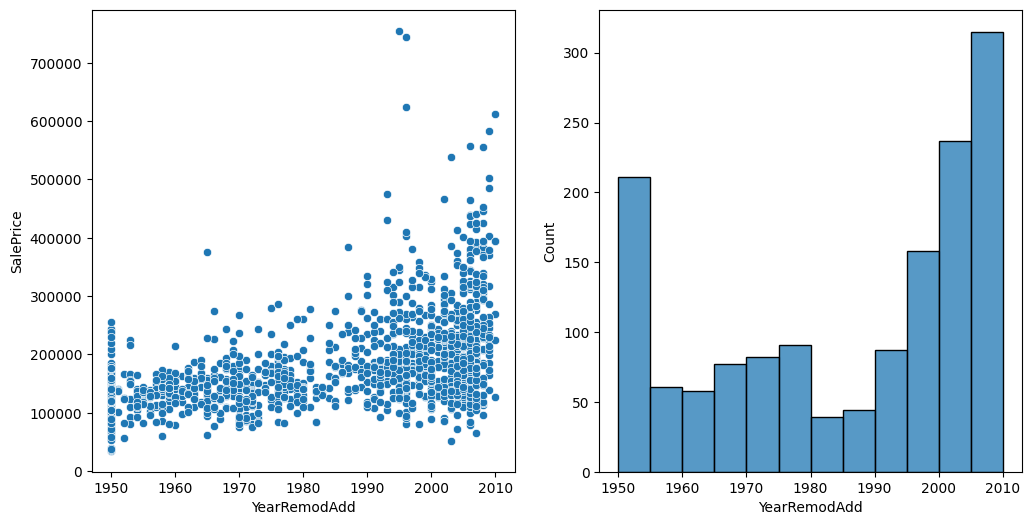

In [81]:
numeric_correlation(df_clean, 'YearRemodAdd', 'SalePrice')

#### <span style = 'color: green'><u>**drop it becuz it is combined to new feature**</u></span>

### <span style = 'color: yellow'>Year_Avg - effective house age</span>

In [82]:
df_clean['Year_Avg'] = (df_clean['YearBuilt'] + df_clean['YearRemodAdd']) / 2

           Year_Avg  SalePrice
Year_Avg   1.000000   0.576144
SalePrice  0.576144   1.000000


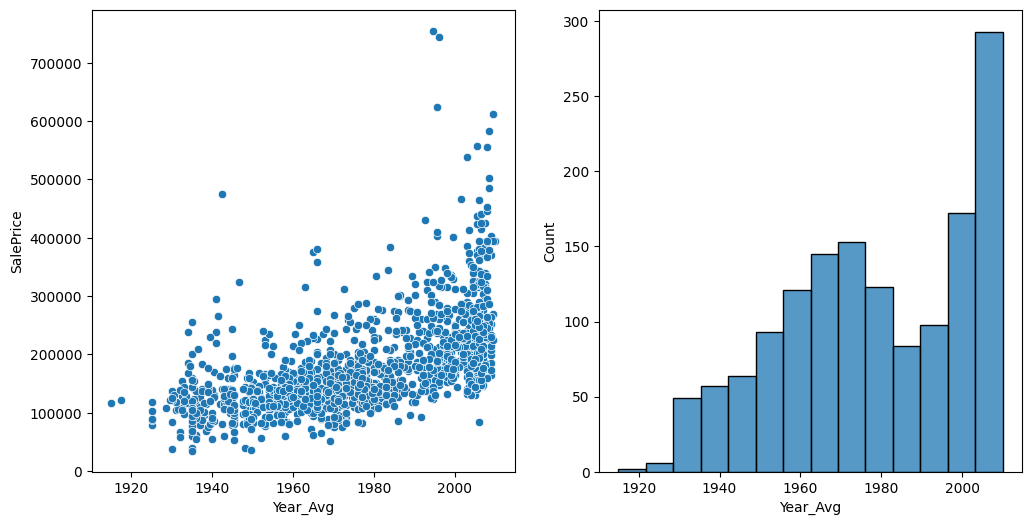

In [83]:
numeric_correlation(df_clean, 'Year_Avg', 'SalePrice')

#### <span style = 'color: green'><u>**standardize**</u></span>

### <span style = 'color: yellow'>RoofStyle - type of roof</span>

In [84]:
df_clean['RoofStyle'].isna().sum()

np.int64(0)

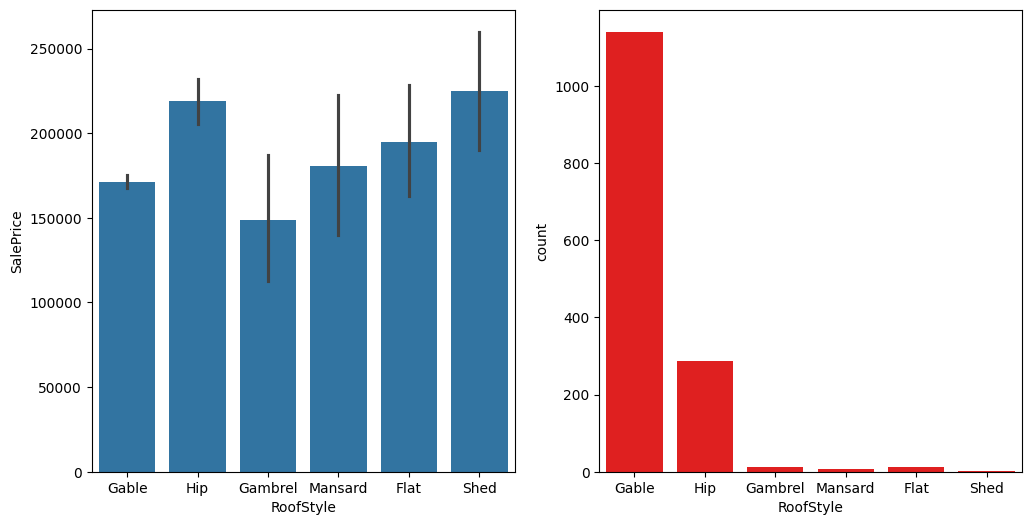

In [85]:
categorical_correlation_plot(df_clean, 'RoofStyle', 'SalePrice')

In [86]:
f_stat, p_value = anova_test(df_clean, 'RoofStyle', 'SalePrice')
print(f'f_stat value between RoofStyle and SalePrice is: {round(f_stat, 4)}')
print(f'p_value between RoofStyle and SalePrice is: {p_value}')

f_stat value between RoofStyle and SalePrice is: 17.8055
p_value between RoofStyle and SalePrice is: 3.653523047099125e-17


#### <span style = 'color: green'><u>**drop it becuz it is combined to new feature**</u></span>

### <span style = 'color: yellow'>RoofMatl - Roof material</span>

In [87]:
df_clean['RoofMatl'].isna().sum()

np.int64(0)

In [88]:
df_clean['RoofMatl'].value_counts()

RoofMatl
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: count, dtype: int64

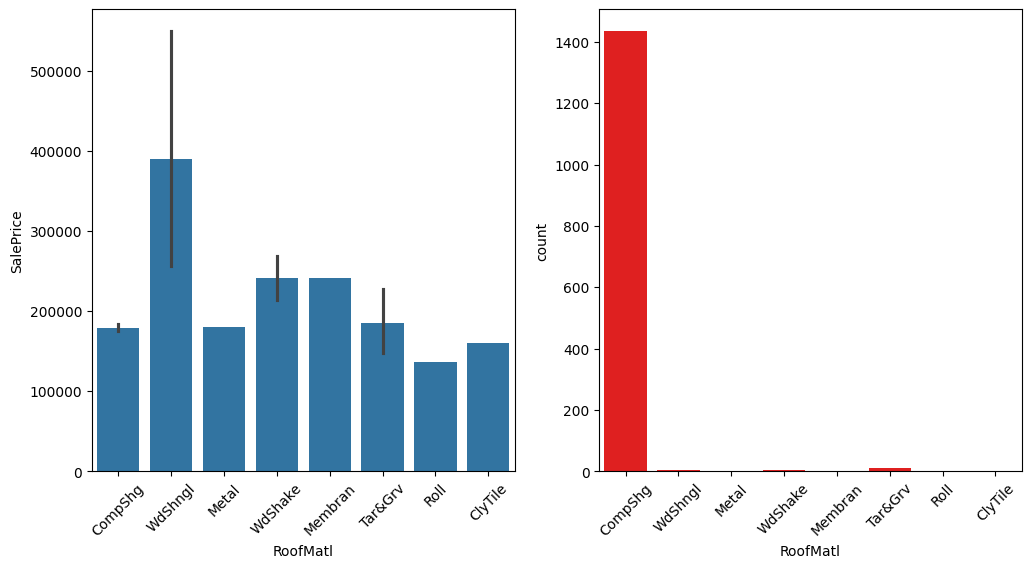

In [89]:
categorical_correlation_plot(df_clean, 'RoofMatl', 'SalePrice')

In [90]:
f_stat, p_value = anova_test(df_clean, 'RoofMatl', 'SalePrice')
print(f'f_stat value between RoofMatl and SalePrice is: {round(f_stat, 4)}')
print(f'p_value between RoofMatl and SalePrice is: {p_value}')

f_stat value between RoofMatl and SalePrice is: 6.7273
p_value between RoofMatl and SalePrice is: 7.231444779987162e-08


#### <span style = 'color: green'><u>**drop it becuz it is combined to new feature**</u></span>

### <span style = 'color: yellow'>Roof_Style_Mat - Roof style and material</span>

In [91]:
df_clean['Roof_Style_Mat'] = df_clean['RoofStyle'] + '_' + df_clean['RoofMatl']

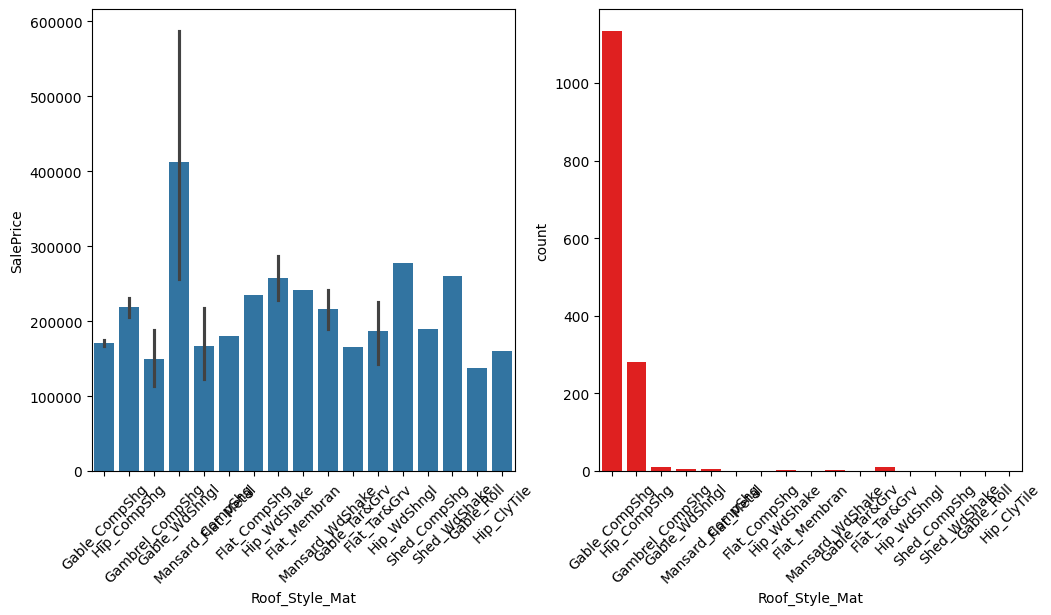

In [92]:
categorical_correlation_plot(df_clean, 'Roof_Style_Mat', 'SalePrice')

In [93]:
f_stat, p_value = anova_test(df_clean, 'Roof_Style_Mat', 'SalePrice')
print(f'f_stat value between Roof_Style_Mat and SalePrice is: {round(f_stat, 4)}')
print(f'p_value between Roof_Style_Mat and SalePrice is: {p_value}')

f_stat value between Roof_Style_Mat and SalePrice is: 9.114
p_value between Roof_Style_Mat and SalePrice is: 8.689554957070384e-22


#### <span style = 'color: green'><u>**OneHotEncoder**</u></span>

### <span style = 'color: yellow'>Exterior1st - exterior covering on house</span>

In [94]:
df_clean['Exterior1st'].isna().sum()

np.int64(0)

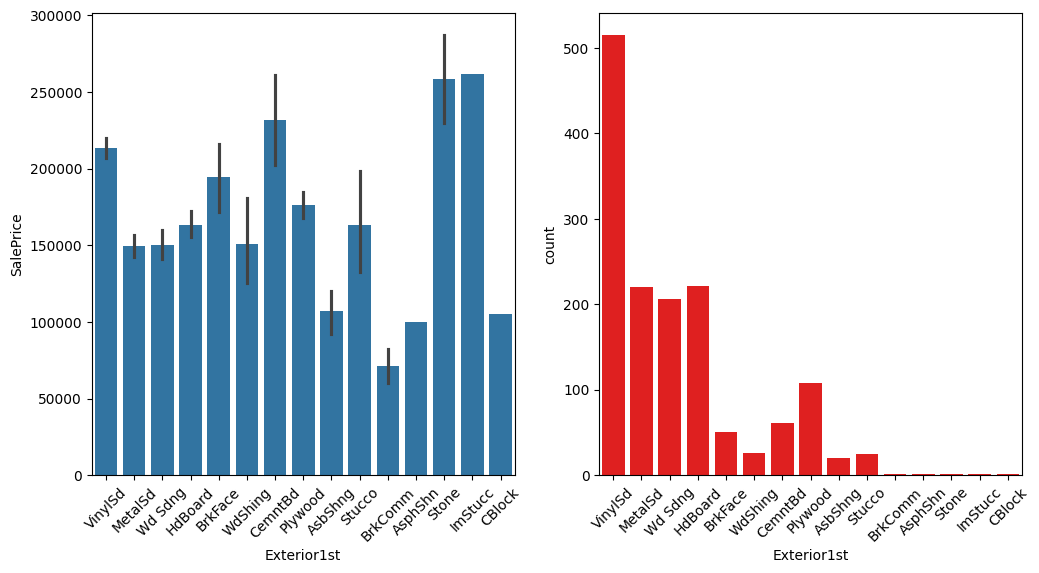

In [95]:
categorical_correlation_plot(df_clean, 'Exterior1st', 'SalePrice')

In [96]:
f_stat, p_value = anova_test(df_clean, 'Exterior1st', 'SalePrice')
print(f'f_stat value between Exterior1st and SalePrice is: {round(f_stat, 4)}')
print(f'p_value between Exterior1st and SalePrice is: {p_value}')

f_stat value between Exterior1st and SalePrice is: 18.6117
p_value between Exterior1st and SalePrice is: 2.5860887286385505e-43


### <span style = 'color: yellow'>Exterior2nd - exterior covering on house (if more than one material)</span>

In [97]:
df_clean['Exterior2nd'].isna().sum()

np.int64(0)

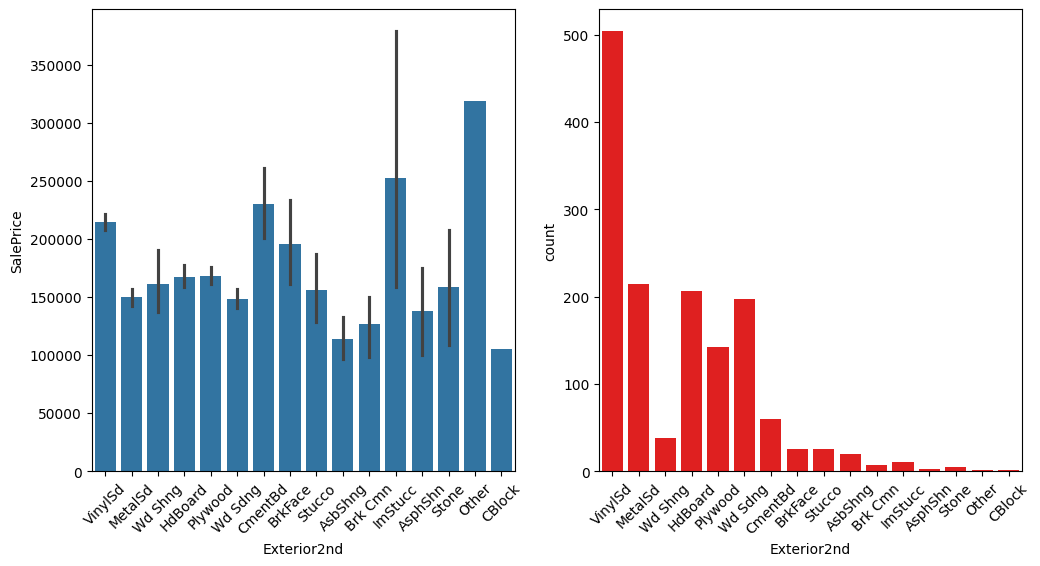

In [98]:
categorical_correlation_plot(df_clean, 'Exterior2nd', 'SalePrice')

In [99]:
f_stat, p_value = anova_test(df_clean, 'Exterior2nd', 'SalePrice')
print(f'f_stat value between Exterior2nd and SalePrice is: {round(f_stat, 4)}')
print(f'p_value between Exterior2nd and SalePrice is: {p_value}')

f_stat value between Exterior2nd and SalePrice is: 17.5008
p_value between Exterior2nd and SalePrice is: 4.8421856706985465e-43


### <span style = 'color: yellow'>ExteriorSame - check whether 2 exteriors are the same material</span>

In [100]:
df_clean['ExteriorSame'] = (df_clean['Exterior1st'] == df_clean['Exterior2nd']).astype(int)
df_clean[['Exterior1st', 'Exterior2nd', 'ExteriorSame']]

,Exterior1st,Exterior2nd,ExteriorSame
0,VinylSd,VinylSd,1
1,MetalSd,MetalSd,1
2,VinylSd,VinylSd,1
3,Wd Sdng,Wd Shng,0
4,VinylSd,VinylSd,1
...,...,...,...
1455,VinylSd,VinylSd,1
1456,Plywood,Plywood,1
1457,CemntBd,CmentBd,0
1458,MetalSd,MetalSd,1


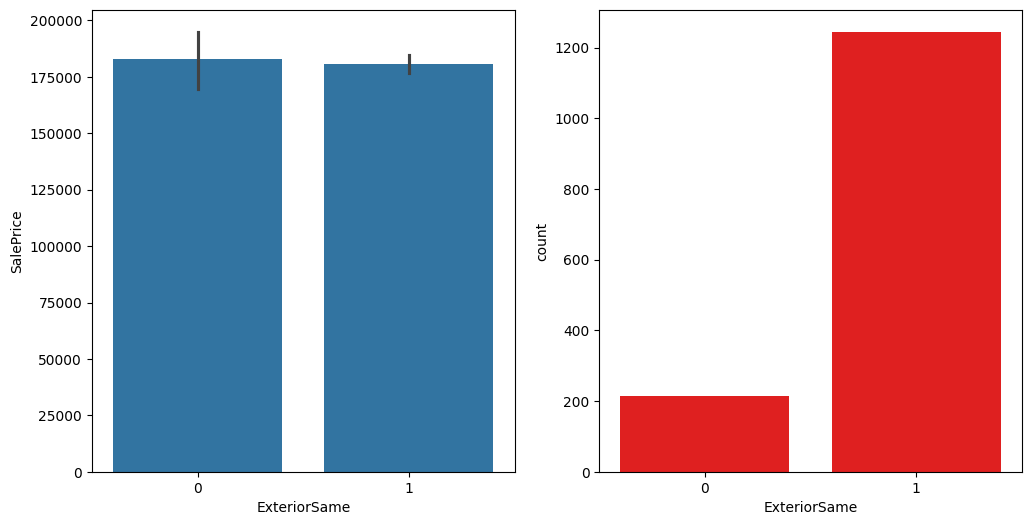

In [101]:
categorical_correlation_plot(df_clean, 'ExteriorSame', 'SalePrice')

In [102]:
f_stat, p_value = anova_test(df_clean, 'ExteriorSame', 'SalePrice')
print(f'f_stat value between ExteriorSame and SalePrice is: {round(f_stat, 4)}')
print(f'p_value between ExteriorSame and SalePrice is: {p_value}')

f_stat value between ExteriorSame and SalePrice is: 0.144
p_value between ExteriorSame and SalePrice is: 0.7044235752429281


### <span style = 'color: yellow'>MasVnrType - Masonry veneer type</span>

In [103]:
df_clean['MasVnrType'].isna().sum()

np.int64(872)

In [104]:
df_clean['MasVnrType'].value_counts()

MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

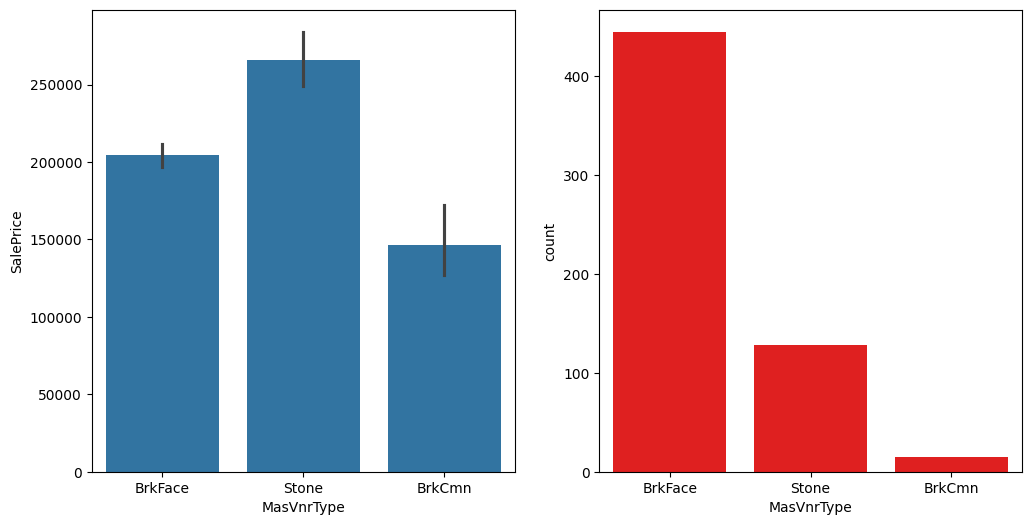

In [105]:
categorical_correlation_plot(df_clean, 'MasVnrType', 'SalePrice')

#### <span style = 'color: green'><u>**missing value over half data. Drop the feature**</u></span>

### <span style = 'color: yellow'>MasVnrArea - Masonry veneer area in square feet</span>

In [106]:
df_clean['MasVnrArea'].isna().sum()

np.int64(8)

In [107]:
df_clean['MasVnrArea'].value_counts()

MasVnrArea
0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: count, Length: 327, dtype: int64

            MasVnrArea  SalePrice
MasVnrArea    1.000000   0.477493
SalePrice     0.477493   1.000000


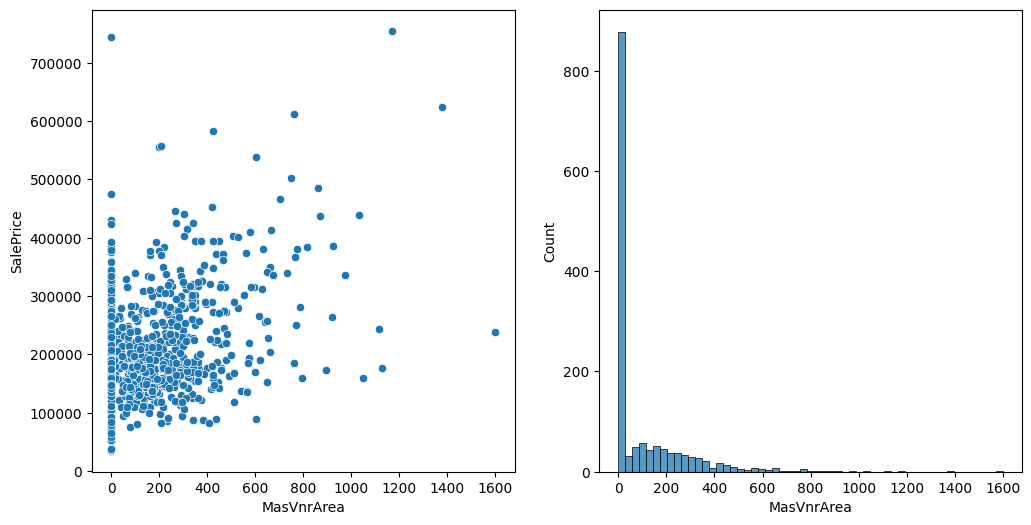

In [108]:
numeric_correlation(df_clean, 'MasVnrArea', 'SalePrice')

#### <span style = 'color: green'><u>**SimpleImputer with median, PowerTransformer, Standardize**</u></span>

### <span style = 'color: yellow'>is_MasVnr - check if there is any masonry veneer area</span>

In [109]:
def is_MasVnr(row):
    if row['MasVnrArea'] == 0:
        return 0
    else:
        return 1
df_clean['is_MasVnr'] = df_clean.apply(is_MasVnr, axis = 1)

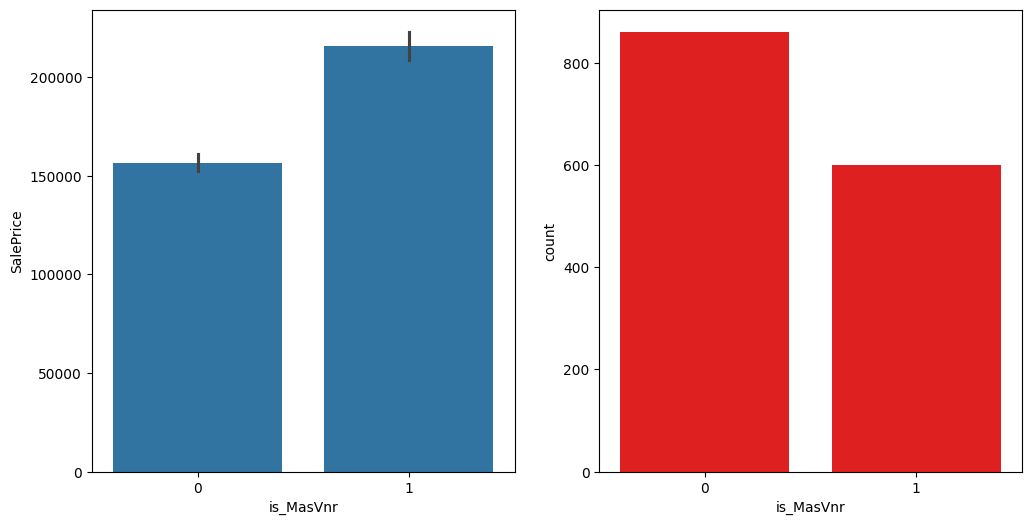

In [110]:
categorical_correlation_plot(df_clean, 'is_MasVnr', 'SalePrice')

In [111]:
f_stat, p_value = anova_test(df_clean, 'is_MasVnr', 'SalePrice')
print(f'f_stat value between is_MasVnr and SalePrice is: {round(f_stat, 4)}')
print(f'p_value between is_MasVnr and SalePrice is: {p_value}')

f_stat value between is_MasVnr and SalePrice is: 228.0979
p_value between is_MasVnr and SalePrice is: 5.422158876272518e-48


#### <span style = 'color: green'><u>**OneHotEncoder**</u></span>

### <span style = 'color: yellow'>ExterQual - evaluates the quality of the material on the exterior</span>

In [112]:
df_clean['ExterQual'].isna().sum()

np.int64(0)

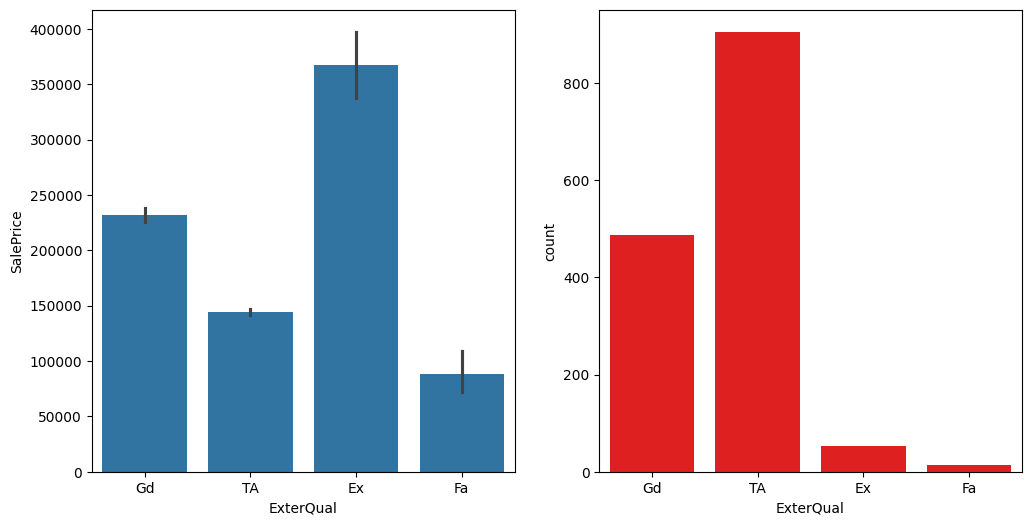

In [113]:
categorical_correlation_plot(df_clean, 'ExterQual', 'SalePrice')

In [114]:
f_stat, p_value = anova_test(df_clean, 'ExterQual', 'SalePrice')
print(f'f_stat value between ExterQual and SalePrice is: {round(f_stat, 4)}')
print(f'p_value between ExterQual and SalePrice is: {p_value}')

f_stat value between ExterQual and SalePrice is: 443.3348
p_value between ExterQual and SalePrice is: 1.439551096779444e-204


#### <span style = 'color: green'><u>**OneHotEncoder**</u></span>

### <span style = 'color: yellow'>ExterCond - evaluates the present condition of the material on the exterior</span>

In [115]:
df_clean['ExterCond'].isna().sum()

np.int64(0)

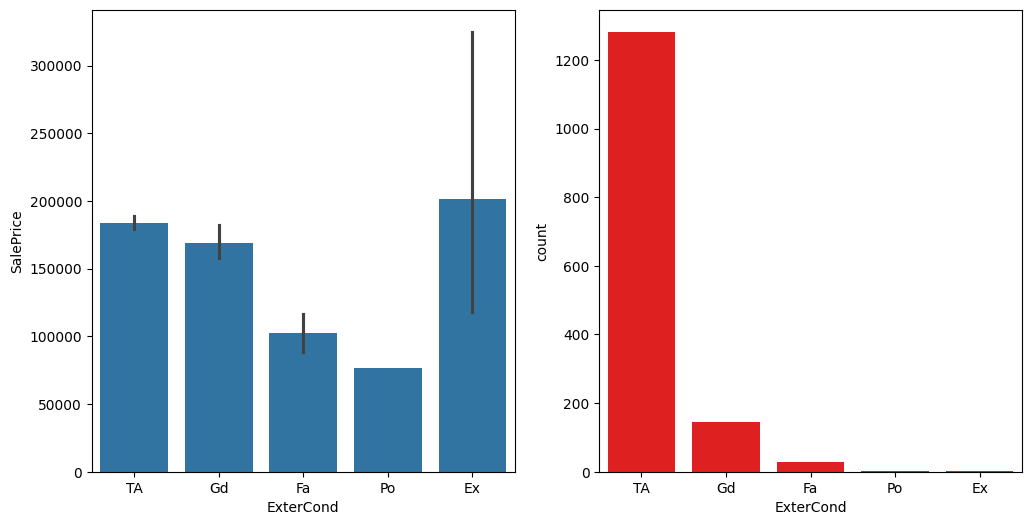

In [116]:
categorical_correlation_plot(df_clean, 'ExterCond', 'SalePrice')

In [117]:
f_stat, p_value = anova_test(df_clean, 'ExterCond', 'SalePrice')
print(f'f_stat value between ExterCond and SalePrice is: {round(f_stat, 4)}')
print(f'p_value between ExterCond and SalePrice is: {p_value}')

f_stat value between ExterCond and SalePrice is: 8.7987
p_value between ExterCond and SalePrice is: 5.106680608671854e-07


#### <span style = 'color: green'><u>**OneHotEncoder**</u></span>

### <span style = 'color: yellow'>Foundation - type of foundation</span>

In [118]:
df_clean['Foundation'].isna().sum()

np.int64(0)

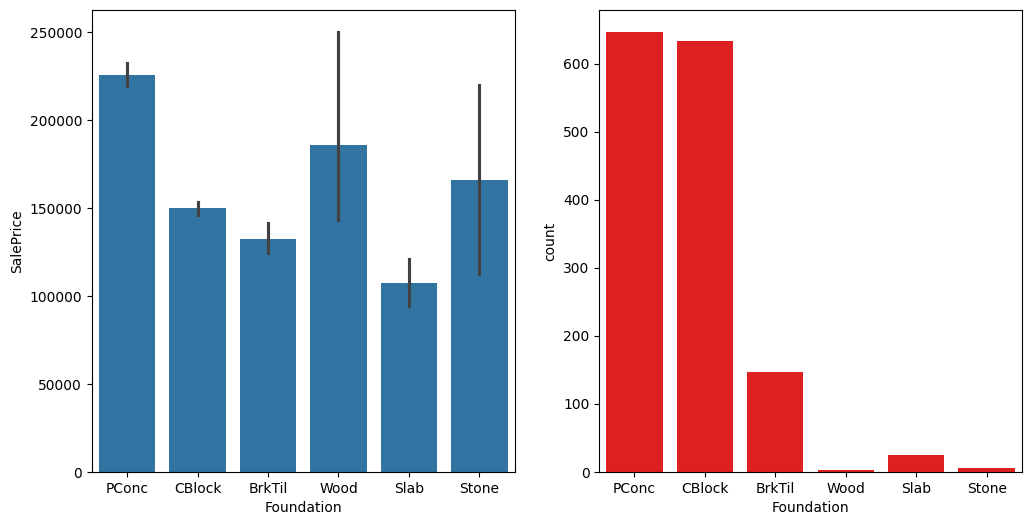

In [119]:
categorical_correlation_plot(df_clean, 'Foundation', 'SalePrice')

In [120]:
f_stat, p_value = anova_test(df_clean, 'Foundation', 'SalePrice')
print(f'f_stat value between Foundation and SalePrice is: {round(f_stat, 4)}')
print(f'p_value between Foundation and SalePrice is: {p_value}')

f_stat value between Foundation and SalePrice is: 100.2539
p_value between Foundation and SalePrice is: 5.791895002231574e-91


#### <span style = 'color: green'><u>**OneHotEncoder**</u></span>

### <span style = 'color: yellow'>BsmtQual - evaluates the height of the basement</span>

In [121]:
df_clean['BsmtQual'].isna().sum()

np.int64(37)

In [122]:
df_clean['BsmtQual'].value_counts()

BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64

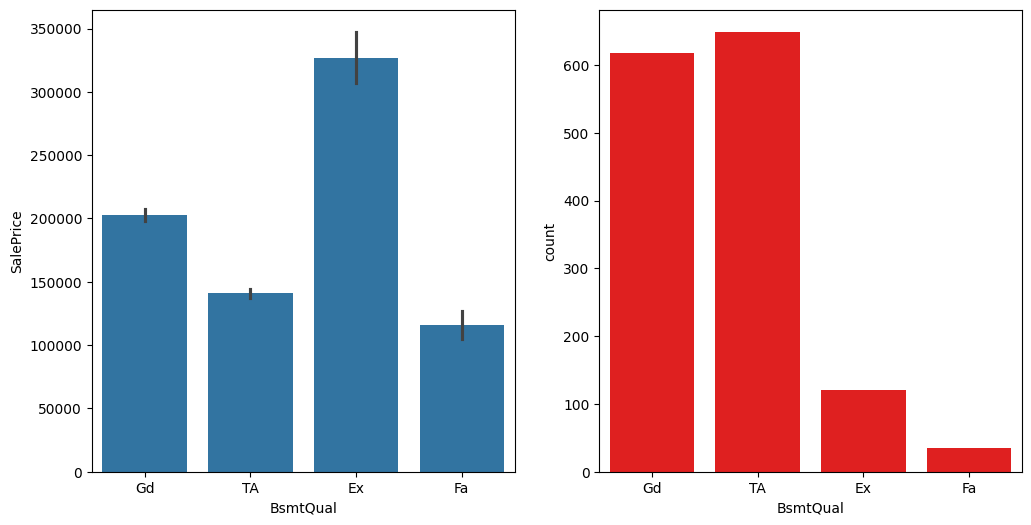

In [123]:
categorical_correlation_plot(df_clean, 'BsmtQual', 'SalePrice')

#### <span style = 'color: green'><u>**SimpleImputer with most frequent + OneHotEncoder**</u></span>

### <span style = 'color: yellow'>BsmtCond - evaluates the general condition of the basement</span>

In [124]:
df_clean['BsmtCond'].isna().sum()

np.int64(37)

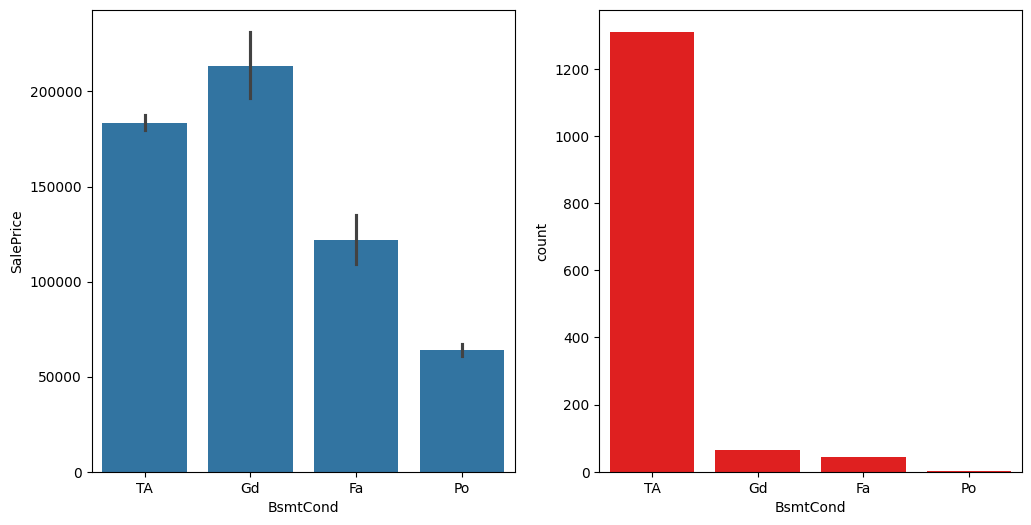

In [125]:
categorical_correlation_plot(df_clean, 'BsmtCond', 'SalePrice')

#### <span style = 'color: green'><u>**SimpleImputer with most frequent + OneHotEncoder**</u></span>

### <span style = 'color: yellow'>BsmtExposure - refers to walkout or garden level walls</span>

In [126]:
df_clean['BsmtExposure'].isna().sum()

np.int64(38)

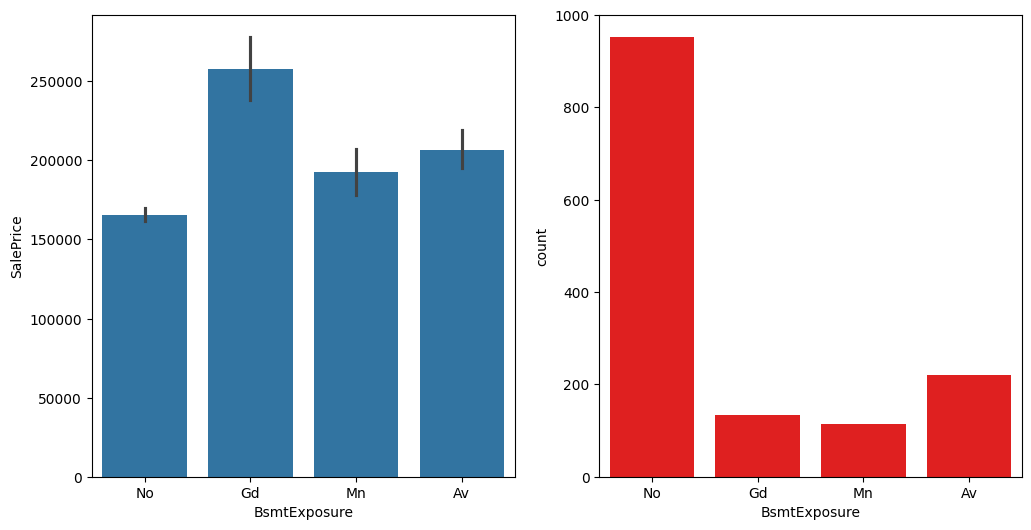

In [127]:
categorical_correlation_plot(df_clean, 'BsmtExposure', 'SalePrice')

#### <span style = 'color: green'><u>**SimpleImputer with most frequent + OneHotEncoder**</u></span>

### <span style = 'color: yellow'>BsmtFinType1 - rating of basement finished area</span>

In [128]:
df_clean['BsmtFinType1'].isna().sum()

np.int64(37)

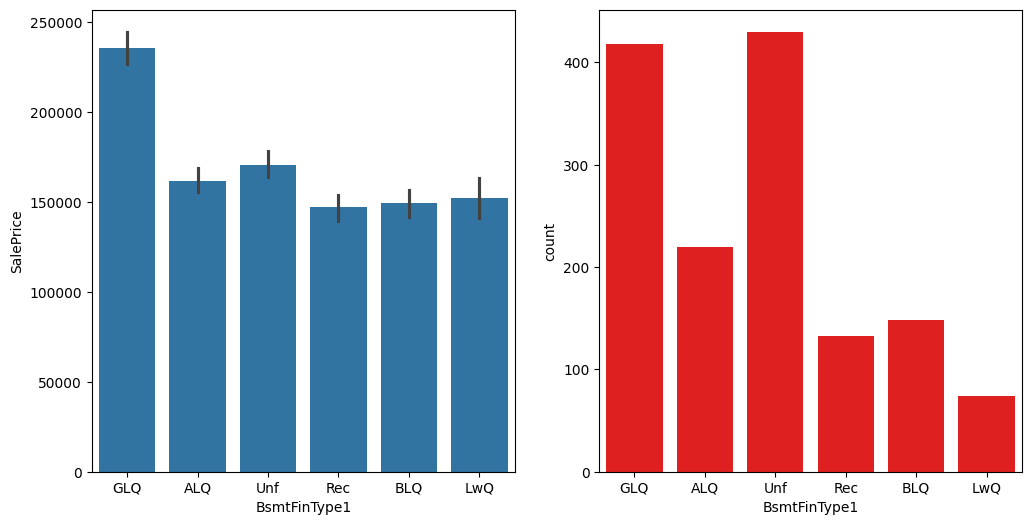

In [129]:
categorical_correlation_plot(df_clean, 'BsmtFinType1', 'SalePrice')

#### <span style = 'color: green'><u>**SimpleImputer with most frequent + OneHotEncoder**</u></span>

### <span style = 'color: yellow'>BsmtFinType2 - rating of basement finished area (if multiple types)</span>

In [130]:
df_clean['BsmtFinType2'].isna().sum()

np.int64(38)

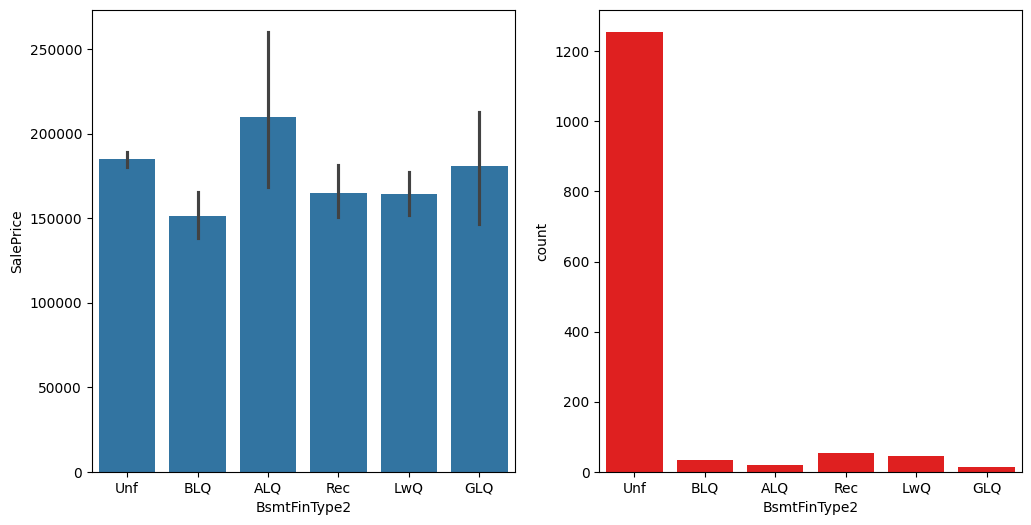

In [131]:
categorical_correlation_plot(df_clean, 'BsmtFinType2', 'SalePrice')

#### <span style = 'color: green'><u>**SimpleImputer with most frequent + OneHotEncoder**</u></span>

### <span style = 'color: gray'>BsmtFinCombined - combined rating of basement (if multiple types)</span>

In [132]:
def merge_bsmt_fin(row):
    if row['BsmtFinType1'] == row['BsmtFinType2']:
        return row['BsmtFinType1']
    else:
        return str(row['BsmtFinType1']) + '+' + str(row['BsmtFinType2'])

df_clean['BsmtFinCombined'] = df_clean.apply(merge_bsmt_fin, axis = 1)

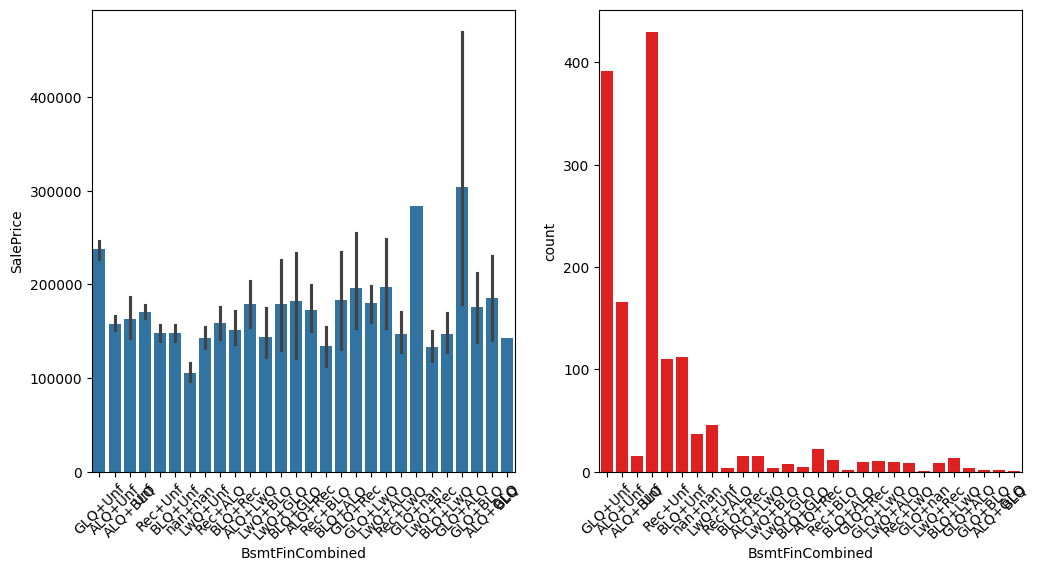

In [133]:
categorical_correlation_plot(df_clean, 'BsmtFinCombined', 'SalePrice')

In [134]:
f_stat, p_value = anova_test(df_clean, 'BsmtFinCombined', 'SalePrice')
print(f'f_stat value between BsmtFinCombined and SalePrice is: {round(f_stat, 4)}')
print(f'p_value between BsmtFinCombined and SalePrice is: {p_value}')

f_stat value between BsmtFinCombined and SalePrice is: 15.3479
p_value between BsmtFinCombined and SalePrice is: 2.4356306471733923e-61


### <span style = 'color: yellow'>BsmtFinSF1 - type1 finished square feet</span>

In [135]:
df_clean['BsmtFinSF1'].isna().sum()

np.int64(0)

            BsmtFinSF1  SalePrice
BsmtFinSF1     1.00000    0.38642
SalePrice      0.38642    1.00000


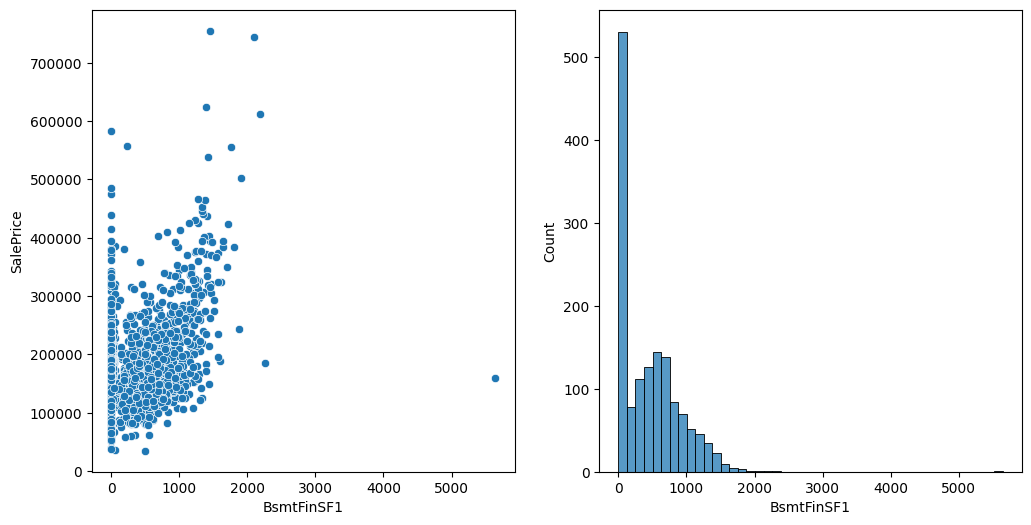

In [136]:
numeric_correlation(df_clean, 'BsmtFinSF1', 'SalePrice')

#### <span style = 'color: green'><u>**PowerTransformer + Standardize**</u></span>

### <span style = 'color: yellow'>BsmtFinSF2 - type2 finished square feet</span>

In [137]:
df_clean['BsmtFinSF2'].isna().sum()

np.int64(0)

            BsmtFinSF2  SalePrice
BsmtFinSF2    1.000000  -0.011378
SalePrice    -0.011378   1.000000


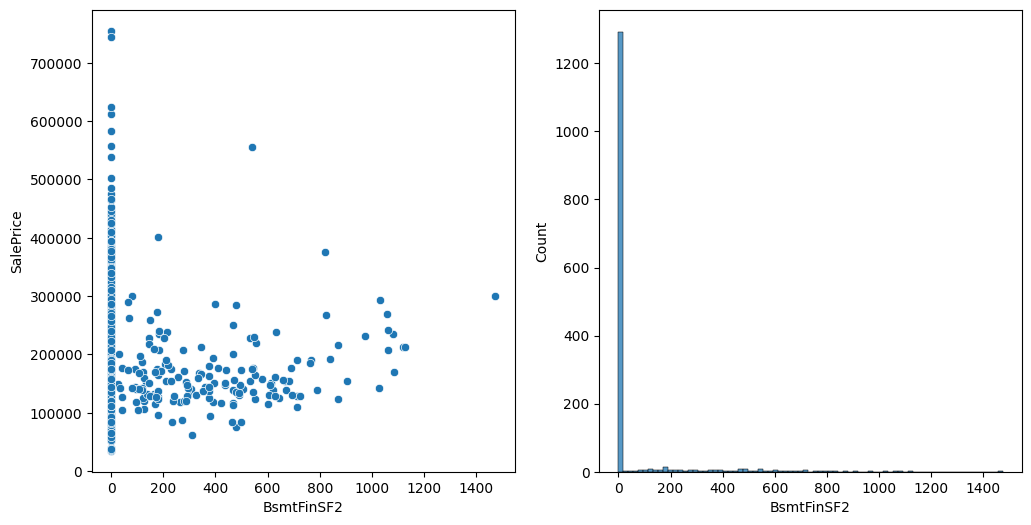

In [138]:
numeric_correlation(df_clean, 'BsmtFinSF2', 'SalePrice')

#### <span style = 'color: green'><u>**extremely imbalanced. Drop the feature**</u></span>

### <span style = 'color: yellow'>BsmtUnfSF - unfinished square feet of basement area</span>

In [139]:
df_clean['BsmtUnfSF'].isna().sum()

np.int64(0)

           BsmtUnfSF  SalePrice
BsmtUnfSF   1.000000   0.214479
SalePrice   0.214479   1.000000


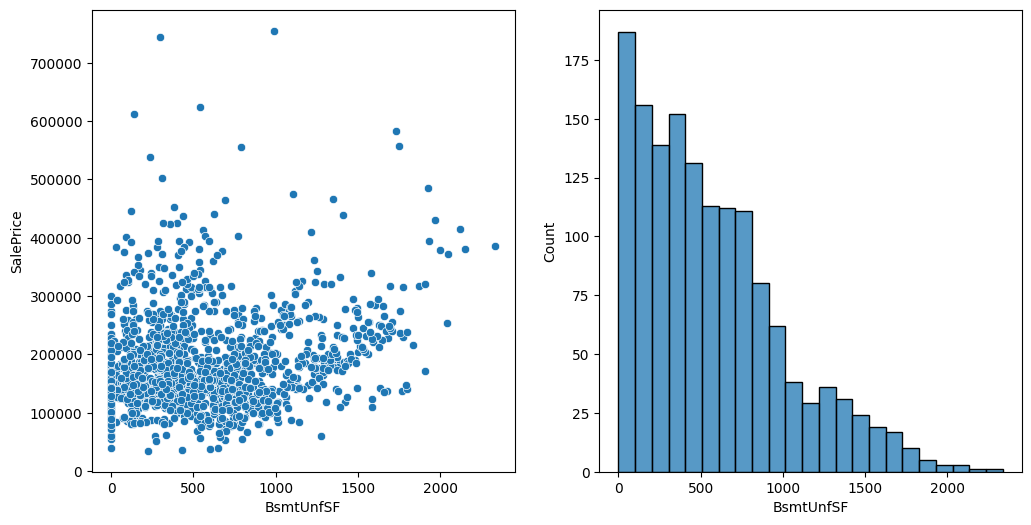

In [140]:
numeric_correlation(df_clean, 'BsmtUnfSF', 'SalePrice')

In [141]:
skewness_total_unfinished_basement = skew(df_clean['BsmtUnfSF'])
skewness_total_unfinished_basement

np.float64(0.9193227015582005)

#### <span style = 'color: green'><u>**PowerTransformer + Standardize**</u></span>

### <span style = 'color: yellow'>TotalBsmtSF - total square feet of basement area</span>

In [142]:
df_clean['TotalBsmtSF'].isna().sum()

np.int64(0)

             TotalBsmtSF  SalePrice
TotalBsmtSF     1.000000   0.613581
SalePrice       0.613581   1.000000


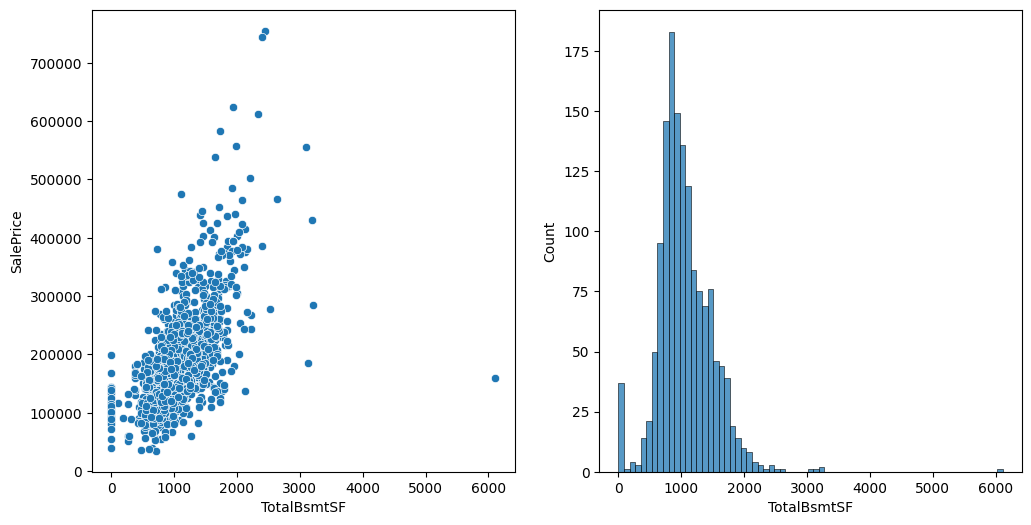

In [143]:
numeric_correlation(df_clean, 'TotalBsmtSF', 'SalePrice')

In [144]:
skewness_total_basement = skew(df_clean['TotalBsmtSF'])
skewness_total_basement

np.float64(1.522688086978629)

#### <span style = 'color: green'><u>**PowerTransformer + Standardize**</u></span>

### <span style = 'color: yellow'>Heating - type of heating</span>

In [145]:
df_clean['Heating'].isna().sum()

np.int64(0)

In [146]:
df_clean['Heating'].value_counts()

Heating
GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: count, dtype: int64

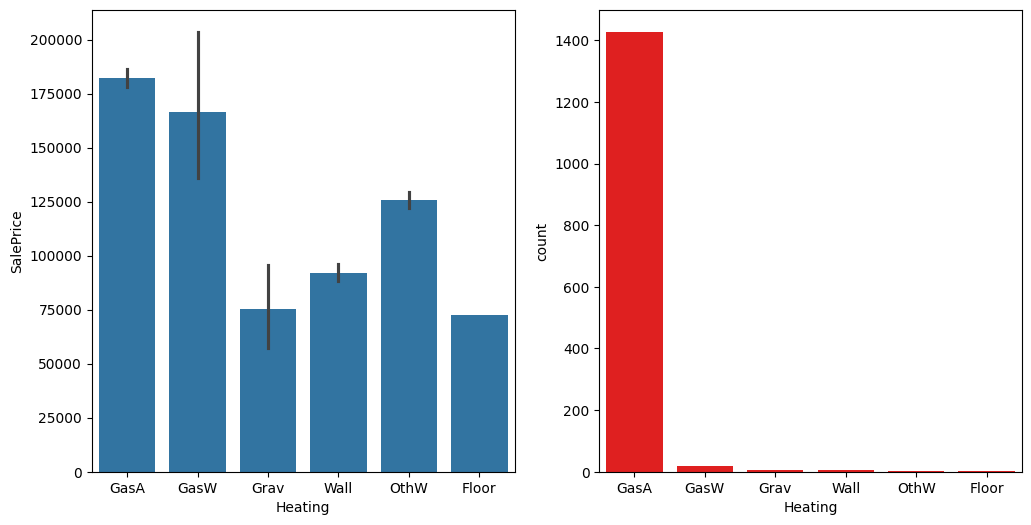

In [147]:
categorical_correlation_plot(df_clean, 'Heating', 'SalePrice')

In [148]:
f_stat, p_value = anova_test(df_clean, 'Heating', 'SalePrice')
print(f'f_stat value between Heating and SalePrice is: {round(f_stat, 4)}')
print(f'p_value between Heating and SalePrice is: {p_value}')

f_stat value between Heating and SalePrice is: 4.2598
p_value between Heating and SalePrice is: 0.000753472106445505


#### <span style = 'color: green'><u>**extremely imbalanced but the p-value is small. So keep it for now for linear model**</u></span>
#### <span style = 'color: green'><u>**OneHotEncoder**</u></span>

### <span style = 'color: yellow'>HeatingQC - heating quality and condition</span>

In [149]:
df_clean['HeatingQC'].isna().sum()

np.int64(0)

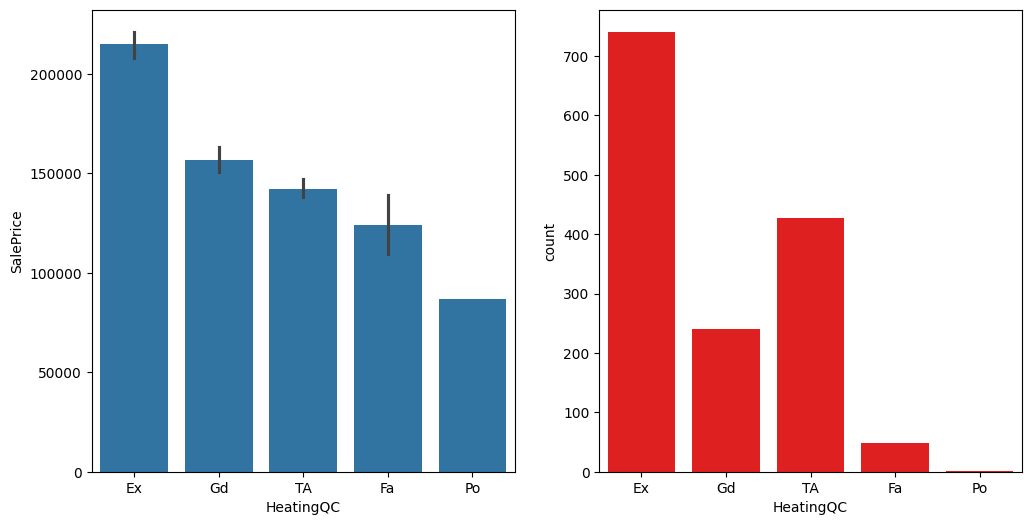

In [150]:
categorical_correlation_plot(df_clean, 'HeatingQC', 'SalePrice')

In [151]:
f_stat, p_value = anova_test(df_clean, 'HeatingQC', 'SalePrice')
print(f'f_stat value between HeatingQC and SalePrice is: {round(f_stat, 4)}')
print(f'p_value between HeatingQC and SalePrice is: {p_value}')

f_stat value between HeatingQC and SalePrice is: 88.3945
p_value between HeatingQC and SalePrice is: 2.667062092104357e-67


#### <span style = 'color: green'><u>**OneHotEncoder**</u></span>

### <span style = 'color: yellow'>CentralAir - central air conditioning</span>

In [152]:
df_clean['CentralAir'].isna().sum()

np.int64(0)

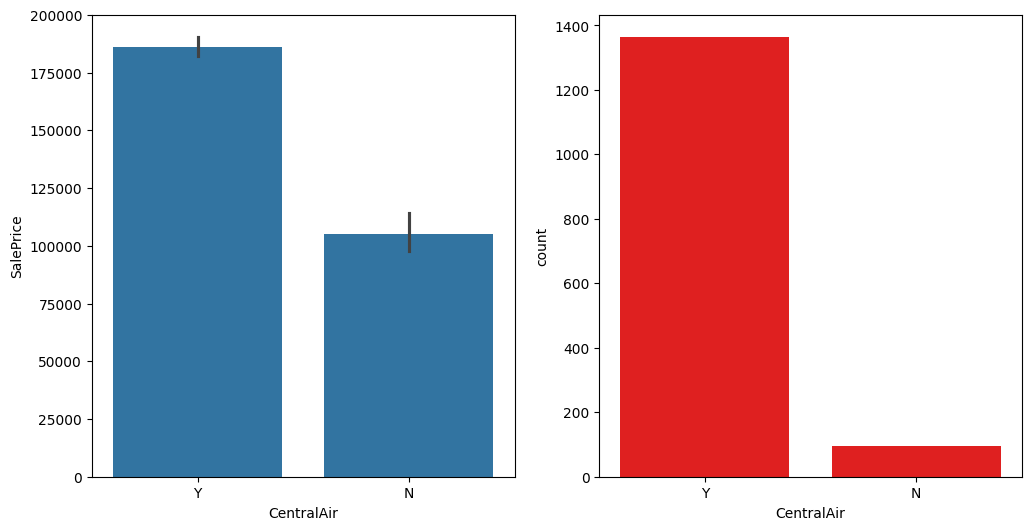

In [153]:
categorical_correlation_plot(df_clean, 'CentralAir', 'SalePrice')

In [154]:
f_stat, p_value = anova_test(df_clean, 'CentralAir', 'SalePrice')
print(f'f_stat value between CentralAir and SalePrice is: {round(f_stat, 4)}')
print(f'p_value between CentralAir and SalePrice is: {p_value}')

f_stat value between CentralAir and SalePrice is: 98.3053
p_value between CentralAir and SalePrice is: 1.8095061559276083e-22


#### <span style = 'color: green'><u>**OneHotEncoder**</u></span>

### <span style = 'color: yellow'>Electrical - electrical system</span>

In [155]:
df_clean['Electrical'].isna().sum()

np.int64(1)

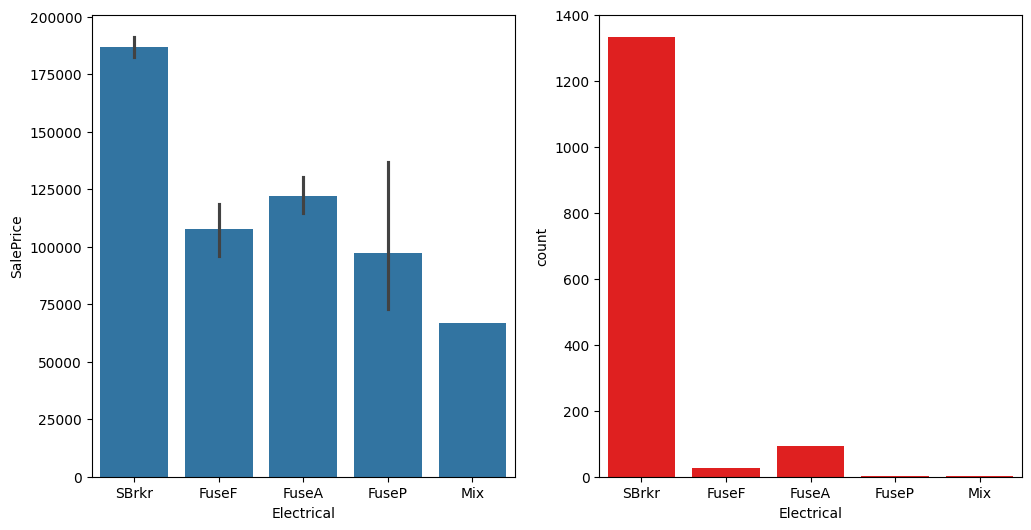

In [156]:
categorical_correlation_plot(df_clean, 'Electrical', 'SalePrice')

#### <span style = 'color: green'><u>**SimpleImputer with most frequent + OneHotEncoder**</u></span>

### <span style = 'color: yellow'>1stFlrSF - first floor square feet</span>

In [157]:
df_clean['1stFlrSF'].isna().sum()

np.int64(0)

           1stFlrSF  SalePrice
1stFlrSF   1.000000   0.605852
SalePrice  0.605852   1.000000


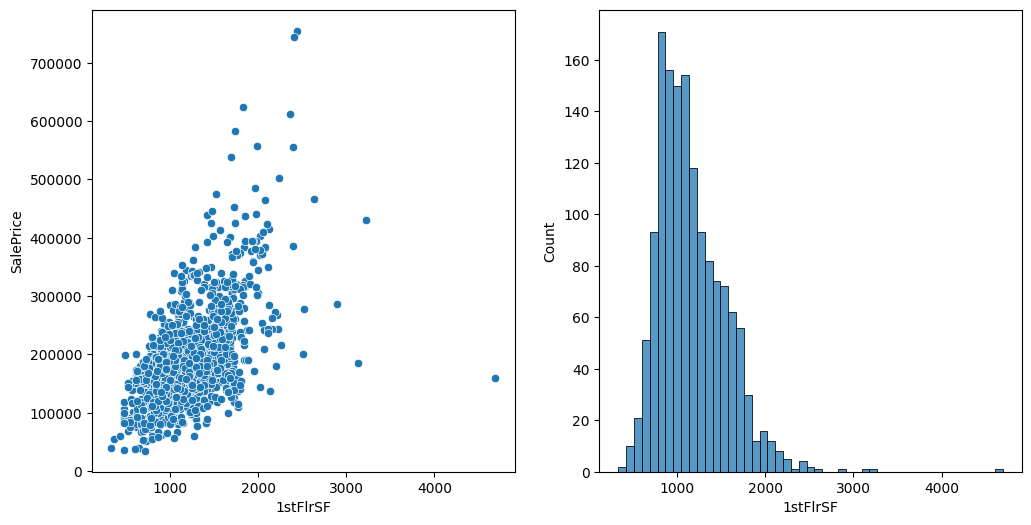

In [158]:
numeric_correlation(df_clean, '1stFlrSF', 'SalePrice')

In [159]:
skewness = skew(df_clean['1stFlrSF'])
skewness

np.float64(1.3753417421837937)

#### <span style = 'color: green'><u>**PowerTransformer + Standardize**</u></span>

### <span style = 'color: yellow'>2ndFlrSF - second floor square feet</span>

In [160]:
df_clean['2ndFlrSF'].isna().sum()

np.int64(0)

           2ndFlrSF  SalePrice
2ndFlrSF   1.000000   0.319334
SalePrice  0.319334   1.000000


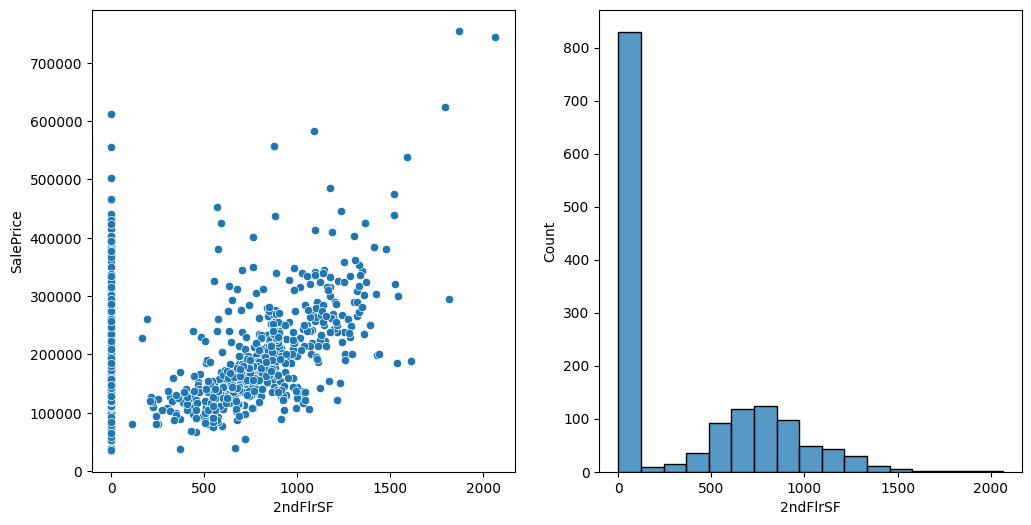

In [161]:
numeric_correlation(df_clean, '2ndFlrSF', 'SalePrice')

#### <span style = 'color: green'><u>**PowerTransformer + Standardize**</u></span>

### <span style = 'color: yellow'>TotalFlrSF - total floor square feet</span>

In [162]:
df_clean['TotalFlrSF'] = df_clean['1stFlrSF'] + df_clean['2ndFlrSF']

            TotalFlrSF  SalePrice
TotalFlrSF    1.000000   0.716883
SalePrice     0.716883   1.000000


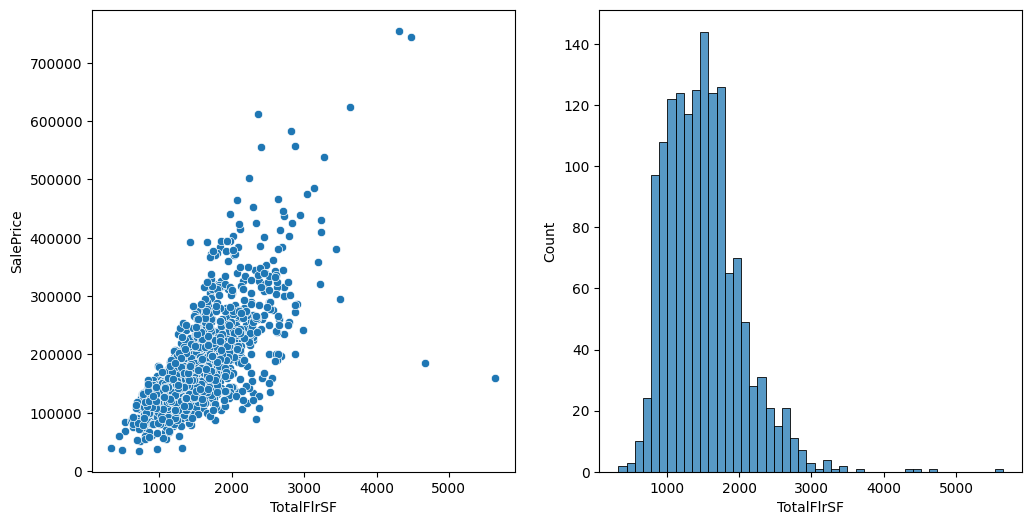

In [163]:
numeric_correlation(df_clean, 'TotalFlrSF', 'SalePrice')

#### <span style = 'color: green'><u>**PowerTransformer + Standardize**</u></span>

### <span style = 'color: yellow'>LowQualFinSF - low quality finished square feet (all floor)</span>

In [164]:
df_clean['LowQualFinSF'].isna().sum()

np.int64(0)

In [165]:
df_clean['LowQualFinSF'].value_counts()

LowQualFinSF
0      1434
80        3
360       2
205       1
479       1
397       1
514       1
120       1
481       1
232       1
53        1
515       1
156       1
473       1
420       1
390       1
371       1
392       1
144       1
572       1
528       1
234       1
513       1
384       1
Name: count, dtype: int64

              LowQualFinSF  SalePrice
LowQualFinSF      1.000000  -0.025606
SalePrice        -0.025606   1.000000


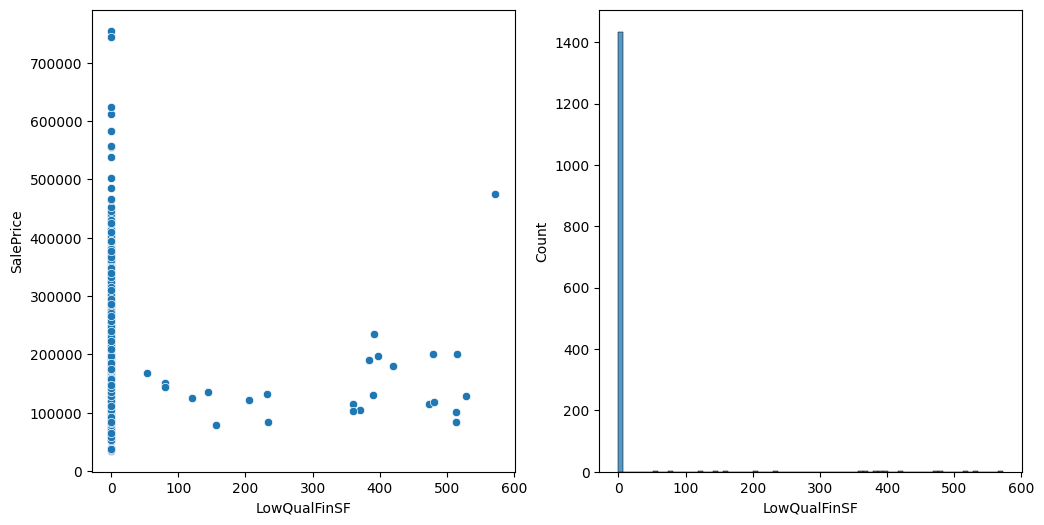

In [166]:
numeric_correlation(df_clean, 'LowQualFinSF', 'SalePrice')

#### <span style = 'color: green'><u>**drop it cuz its extremely imbalanced**</u></span>

### <span style = 'color: yellow'>is_LowQualFinSF - check if there is any finished area that is considered low quality</span>

In [167]:
def low_quality(row):
    if row['LowQualFinSF'] == 0:
        return 0
    else:
        return 1
        
df_clean['is_LowQualFinSF'] = df_clean.apply(low_quality, axis = 1)

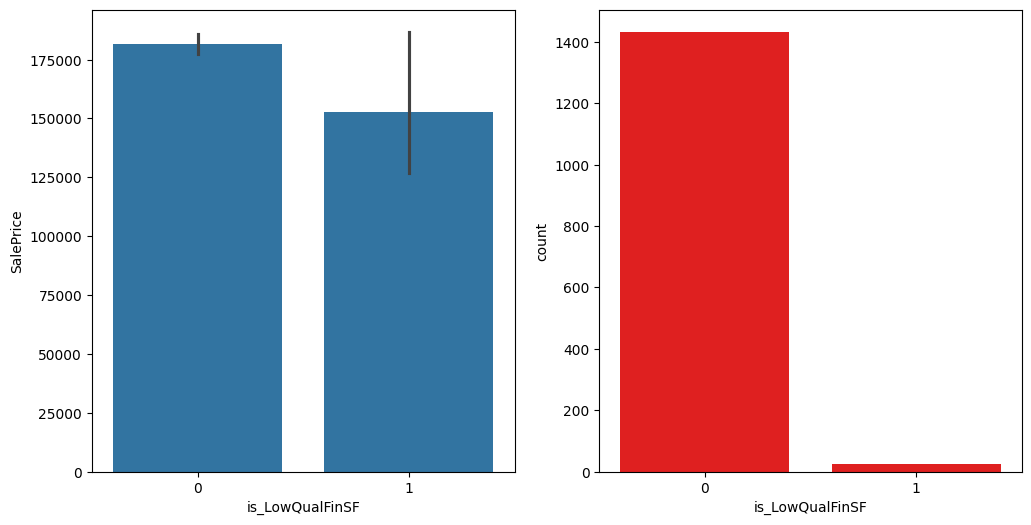

In [168]:
categorical_correlation_plot(df_clean, 'is_LowQualFinSF', 'SalePrice')

In [169]:
f_stat, p_value = anova_test(df_clean, 'is_LowQualFinSF', 'SalePrice')
print(f'f_stat value between is_LowQualFinSF and SalePrice is: {round(f_stat, 4)}')
print(f'p_value between is_LowQualFinSF and SalePrice is: {p_value}')

f_stat value between is_LowQualFinSF and SalePrice is: 3.3574
p_value between is_LowQualFinSF and SalePrice is: 0.06710868542986612


#### <span style = 'color: green'><u>**keep it passthrough and see the feature significance after modeling**</u></span>

### <span style = 'color: yellow'>GrLivArea - above grade (ground) living area square feet</span>

In [170]:
df_clean['GrLivArea'].isna().sum()

np.int64(0)

           GrLivArea  SalePrice
GrLivArea   1.000000   0.708624
SalePrice   0.708624   1.000000


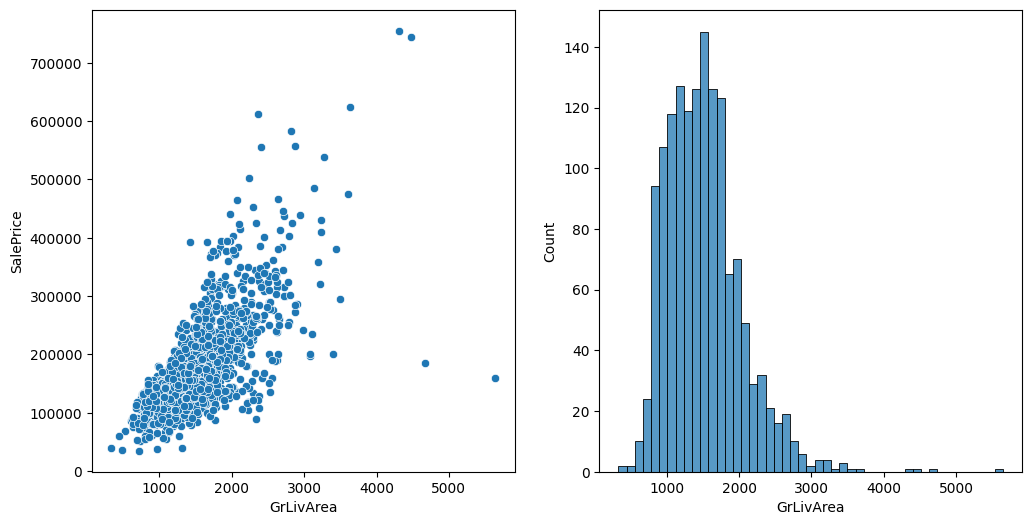

In [171]:
numeric_correlation(df_clean, 'GrLivArea', 'SalePrice')

#### <span style = 'color: green'><u>**PowerTransformer + Standardize**</u></span>

### <span style = 'color: yellow'>BsmtFullBath - basement full bathrooms</span>

In [172]:
df_clean['BsmtFullBath'].isna().sum()

np.int64(0)

In [173]:
df_clean['BsmtFullBath'].value_counts()

BsmtFullBath
0    856
1    588
2     15
3      1
Name: count, dtype: int64

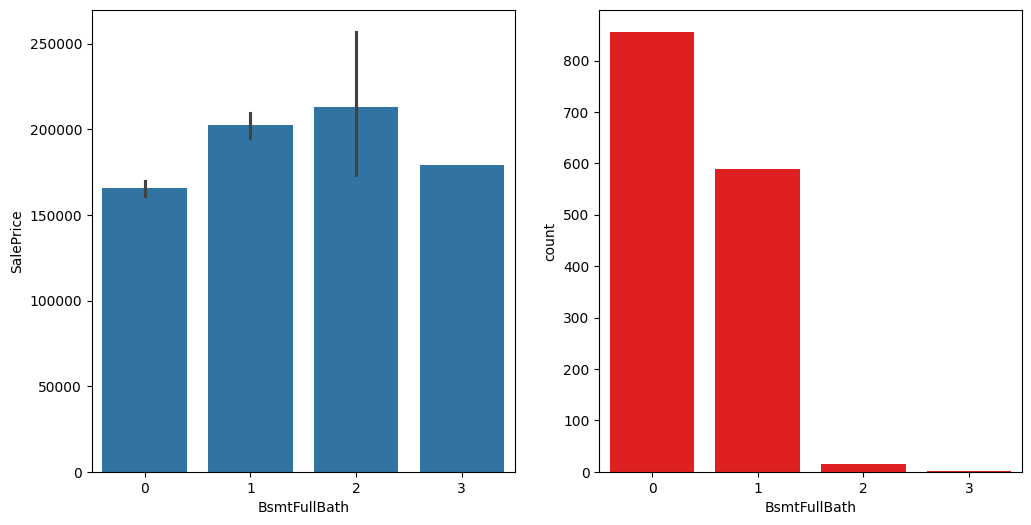

In [174]:
categorical_correlation_plot(df_clean, 'BsmtFullBath', 'SalePrice')

In [175]:
f_stat, p_value = anova_test(df_clean, 'BsmtFullBath', 'SalePrice')
print(f'f_stat value between BsmtFullBath and SalePrice is: {round(f_stat, 4)}')
print(f'p_value between BsmtFullBath and SalePrice is: {p_value}')

f_stat value between BsmtFullBath and SalePrice is: 27.448
p_value between BsmtFullBath and SalePrice is: 2.8824355272954505e-17


#### <span style = 'color: green'><u>**keep it passthrough and see the feature significance after modeling**</u></span>

### <span style = 'color: yellow'>BsmtHalfBath - basement half bathrooms</span>

In [176]:
df_clean['BsmtHalfBath'].isna().sum()

np.int64(0)

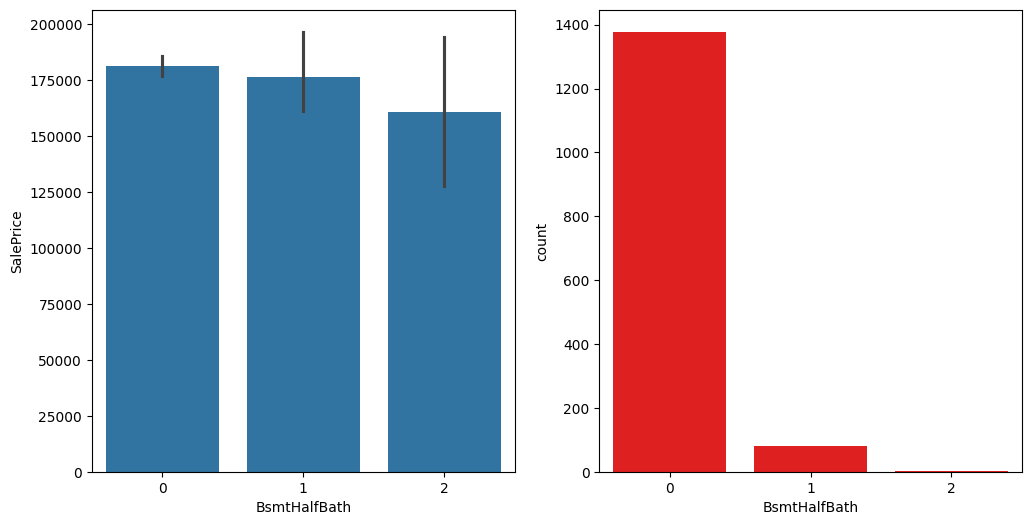

In [177]:
categorical_correlation_plot(df_clean, 'BsmtHalfBath', 'SalePrice')

In [178]:
f_stat, p_value = anova_test(df_clean, 'BsmtHalfBath', 'SalePrice')
print(f'f_stat value between BsmtHalfBath and SalePrice is: {round(f_stat, 4)}')
print(f'p_value between BsmtHalfBath and SalePrice is: {p_value}')

f_stat value between BsmtHalfBath and SalePrice is: 0.2215
p_value between BsmtHalfBath and SalePrice is: 0.8013743052057918


#### <span style = 'color: green'><u>**keep it passthrough and see the feature significance after modeling**</u></span>

### <span style = 'color: yellow'>FullBath - full bathrooms above grade</span>

In [179]:
df_clean['FullBath'].isna().sum()

np.int64(0)

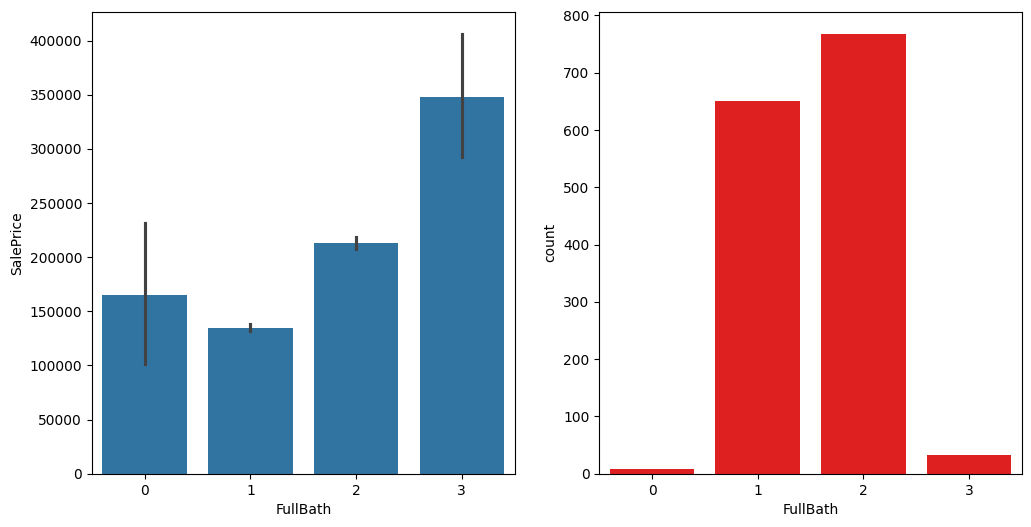

In [180]:
categorical_correlation_plot(df_clean, 'FullBath', 'SalePrice')

In [181]:
f_stat, p_value = anova_test(df_clean, 'FullBath', 'SalePrice')
print(f'f_stat value between FullBath and SalePrice is: {round(f_stat, 4)}')
print(f'p_value between FullBath and SalePrice is: {p_value}')

f_stat value between FullBath and SalePrice is: 246.067
p_value between FullBath and SalePrice is: 3.802187932450237e-129


#### <span style = 'color: green'><u>**keep it passthrough**</u></span>

### <span style = 'color: yellow'>HalfBath - half bathrooms above grade</span>

In [182]:
df_clean['HalfBath'].isna().sum()

np.int64(0)

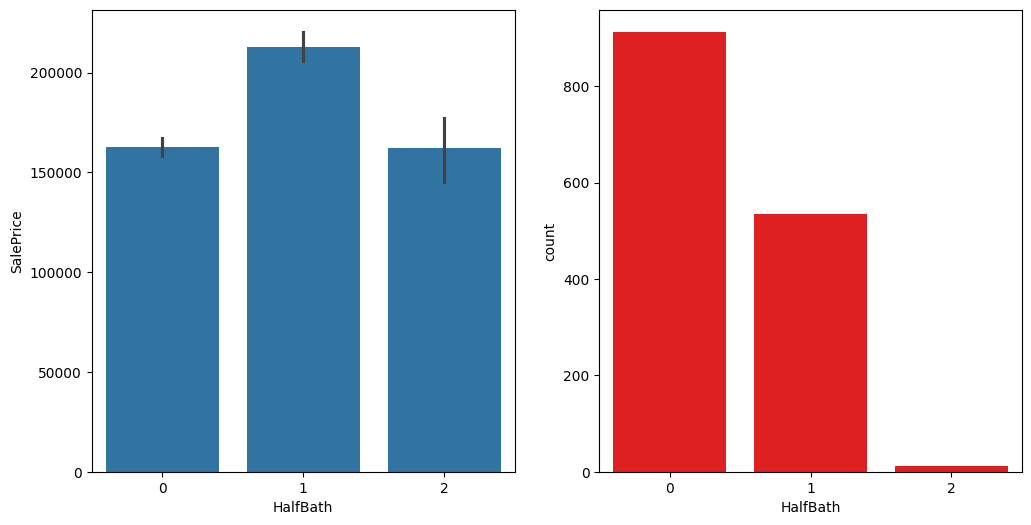

In [183]:
categorical_correlation_plot(df_clean, 'HalfBath', 'SalePrice')

In [184]:
f_stat, p_value = anova_test(df_clean, 'HalfBath', 'SalePrice')
print(f'f_stat value between HalfBath and SalePrice is: {round(f_stat, 4)}')
print(f'p_value between HalfBath and SalePrice is: {p_value}')

f_stat value between HalfBath and SalePrice is: 74.4697
p_value between HalfBath and SalePrice is: 1.609144945404951e-31


#### <span style = 'color: green'><u>**keep it passthrough**</u></span>

### <span style = 'color: yellow'>BedroomAbvGr - bedrooms above grade (does not include basement bedrooms)</span>

In [185]:
df_clean['BedroomAbvGr'].isna().sum()

np.int64(0)

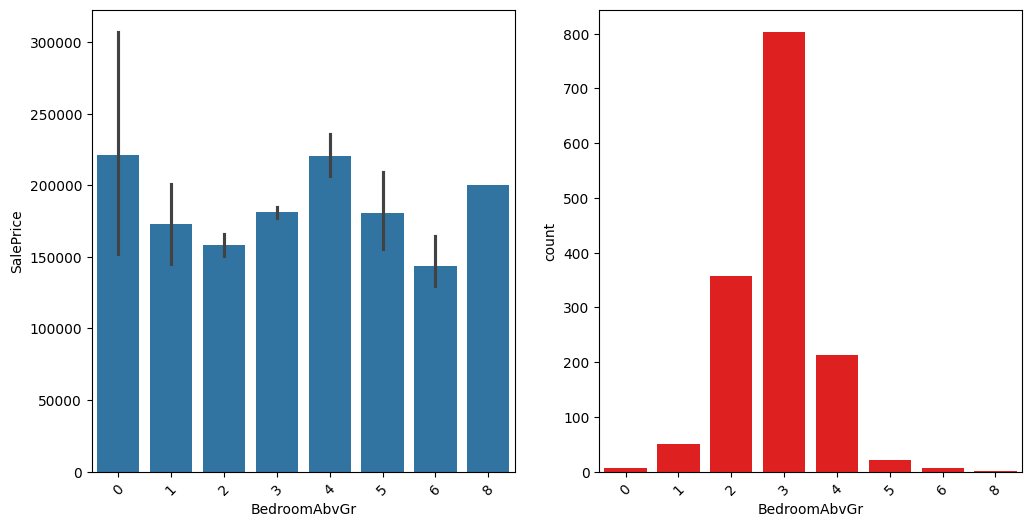

In [186]:
categorical_correlation_plot(df_clean, 'BedroomAbvGr', 'SalePrice')

In [187]:
f_stat, p_value = anova_test(df_clean, 'BedroomAbvGr', 'SalePrice')
print(f'f_stat value between BedroomAbvGr and SalePrice is: {round(f_stat, 4)}')
print(f'p_value between BedroomAbvGr and SalePrice is: {p_value}')

f_stat value between BedroomAbvGr and SalePrice is: 12.9254
p_value between BedroomAbvGr and SalePrice is: 3.30431964504614e-16


#### <span style = 'color: green'><u>**keep it passthrough**</u></span>

### <span style = 'color: yellow'>KitchenAbvGr - kitchens above grade (does not include basement bedrooms)</span>

In [188]:
df_clean['KitchenAbvGr'].isna().sum()

np.int64(0)

In [189]:
df_clean['KitchenAbvGr'].value_counts()

KitchenAbvGr
1    1392
2      65
3       2
0       1
Name: count, dtype: int64

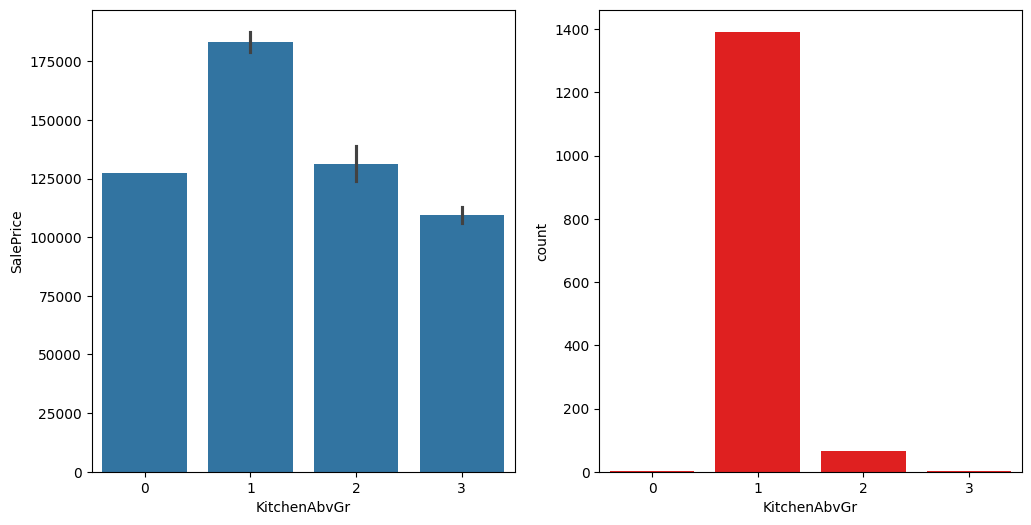

In [190]:
categorical_correlation_plot(df_clean, 'KitchenAbvGr', 'SalePrice')

In [191]:
f_stat, p_value = anova_test(df_clean, 'KitchenAbvGr', 'SalePrice')
print(f'f_stat value between KitchenAbvGr and SalePrice is: {round(f_stat, 4)}')
print(f'p_value between KitchenAbvGr and SalePrice is: {p_value}')

f_stat value between KitchenAbvGr and SalePrice is: 9.8355
p_value between KitchenAbvGr and SalePrice is: 2.011735142858798e-06


#### <span style = 'color: green'><u>**keep it passthrough**</u></span>

### <span style = 'color: yellow'>KitchenQual - kitchens quality</span>

In [192]:
df_clean['KitchenQual'].isna().sum()

np.int64(0)

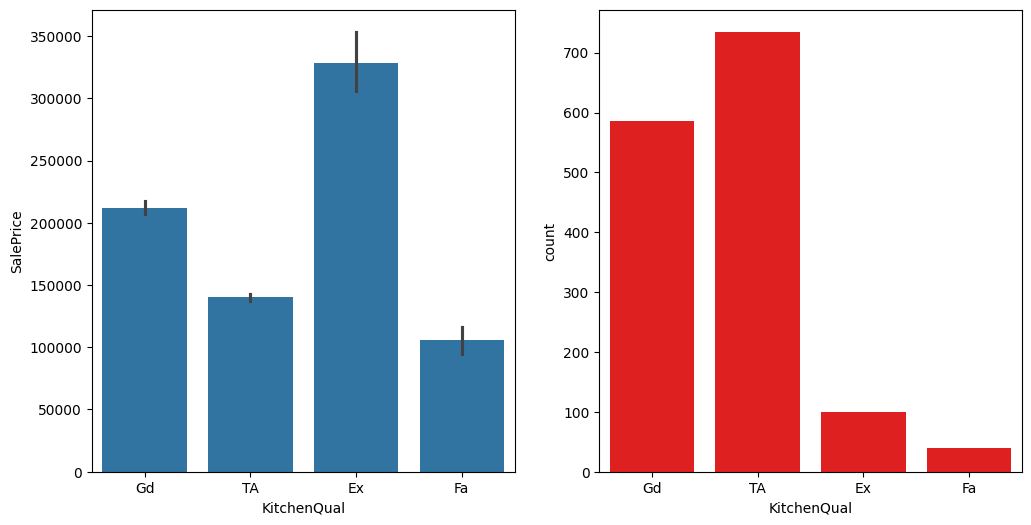

In [193]:
categorical_correlation_plot(df_clean, 'KitchenQual', 'SalePrice')

In [194]:
f_stat, p_value = anova_test(df_clean, 'KitchenQual', 'SalePrice')
print(f'f_stat value between KitchenQual and SalePrice is: {round(f_stat, 4)}')
print(f'p_value between KitchenQual and SalePrice is: {p_value}')

f_stat value between KitchenQual and SalePrice is: 407.8064
p_value between KitchenQual and SalePrice is: 3.0322127528416126e-192


#### <span style = 'color: green'><u>**OneHotEncoder**</u></span>

### <span style = 'color: yellow'>TotRmsAbvGrd - total rooms above grade (does not include bathrooms)</span>

In [195]:
df_clean['TotRmsAbvGrd'].isna().sum()

np.int64(0)

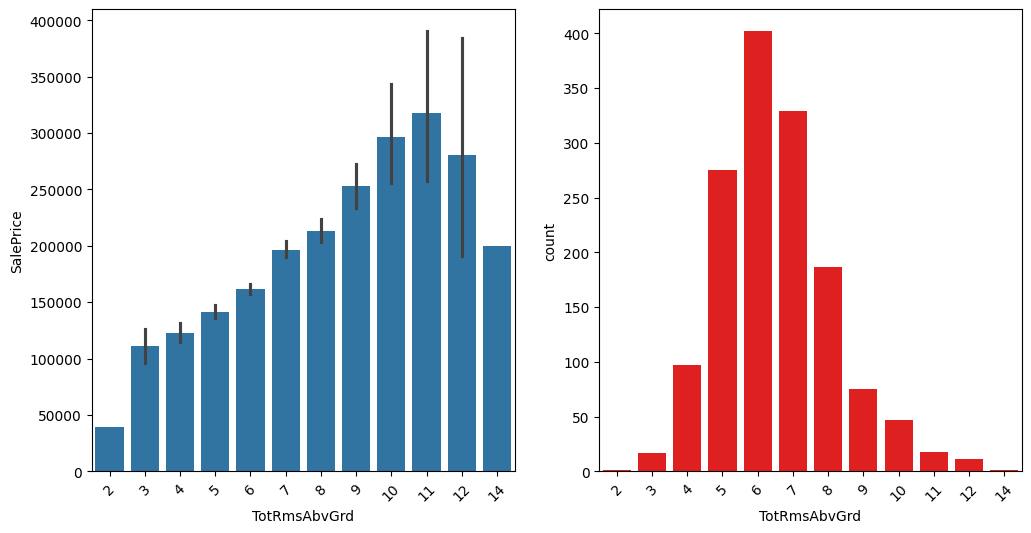

In [196]:
categorical_correlation_plot(df_clean, 'TotRmsAbvGrd', 'SalePrice')

In [197]:
f_stat, p_value = anova_test(df_clean, 'TotRmsAbvGrd', 'SalePrice')
print(f'f_stat value between TotRmsAbvGrd and SalePrice is: {round(f_stat, 4)}')
print(f'p_value between TotRmsAbvGrd and SalePrice is: {p_value}')

f_stat value between TotRmsAbvGrd and SalePrice is: 56.1642
p_value between TotRmsAbvGrd and SalePrice is: 1.1917103366537483e-103


#### <span style = 'color: green'><u>**keep it passthrough**</u></span>

### <span style = 'color: yellow'>Functional - home functionality (assume typical unless deductions are warranted)</span>

In [198]:
df_clean['Functional'].isna().sum()

np.int64(0)

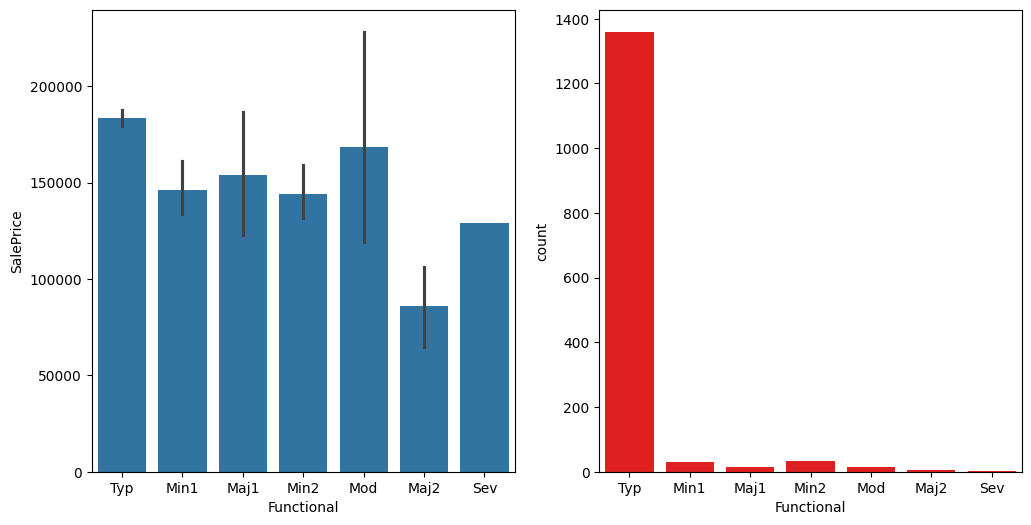

In [199]:
categorical_correlation_plot(df_clean, 'Functional', 'SalePrice')

In [200]:
f_stat, p_value = anova_test(df_clean, 'Functional', 'SalePrice')
print(f'f_stat value between Functional and SalePrice is: {round(f_stat, 4)}')
print(f'p_value between Functional and SalePrice is: {p_value}')

f_stat value between Functional and SalePrice is: 4.0579
p_value between Functional and SalePrice is: 0.00048416968010805815


#### <span style = 'color: green'><u>**OneHotEncoder**</u></span>

### <span style = 'color: yellow'>Fireplaces - number of fireplaces</span>

In [201]:
df_clean['Fireplaces'].isna().sum()

np.int64(0)

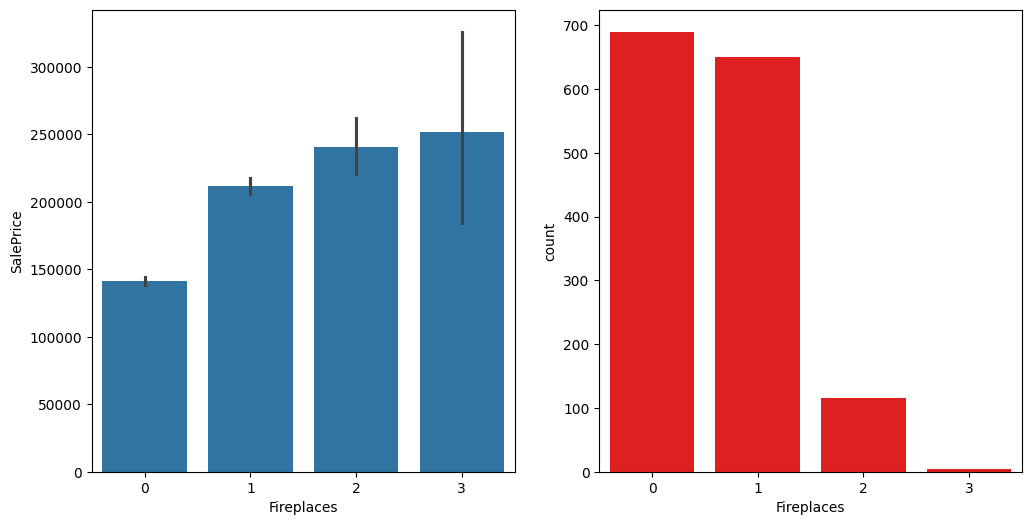

In [202]:
categorical_correlation_plot(df_clean, 'Fireplaces', 'SalePrice')

In [203]:
f_stat, p_value = anova_test(df_clean, 'Fireplaces', 'SalePrice')
print(f'f_stat value between Fireplaces and SalePrice is: {round(f_stat, 4)}')
print(f'p_value between Fireplaces and SalePrice is: {p_value}')

f_stat value between Fireplaces and SalePrice is: 146.7412
p_value between Fireplaces and SalePrice is: 4.421001030727789e-83


#### <span style = 'color: green'><u>**keep it passthrough**</u></span>

### <span style = 'color: yellow'>FireplaceQu - fireplace quality</span>

In [204]:
df_clean['FireplaceQu'].isna().sum()

np.int64(690)

In [205]:
df_clean['FireplaceQu'] = df_clean['FireplaceQu'].replace(np.nan, 'NoFirePlace')

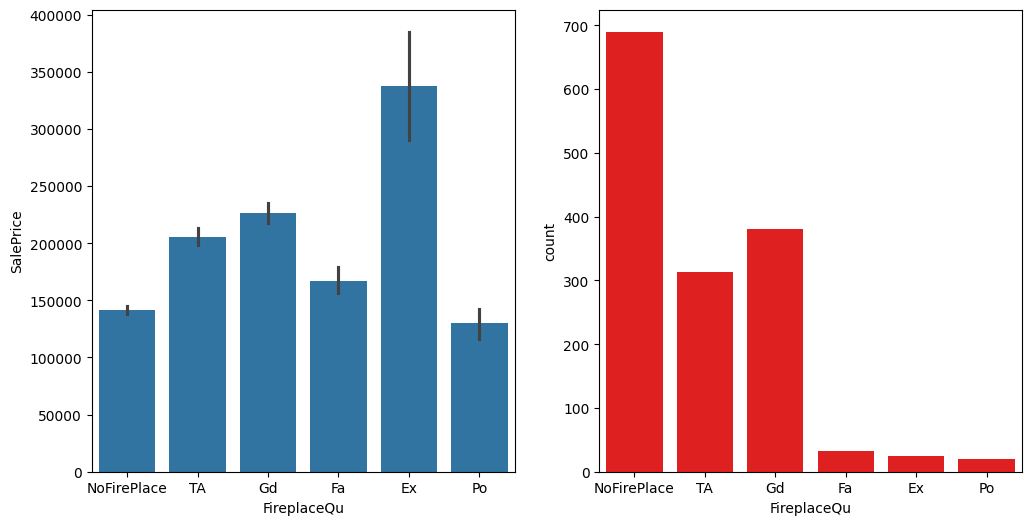

In [206]:
categorical_correlation_plot(df_clean, 'FireplaceQu', 'SalePrice')

In [207]:
f_stat, p_value = anova_test(df_clean, 'FireplaceQu', 'SalePrice')
print(f'f_stat value between FireplaceQu and SalePrice is: {round(f_stat, 4)}')
print(f'p_value between FireplaceQu and SalePrice is: {p_value}')

f_stat value between FireplaceQu and SalePrice is: 121.0751
p_value between FireplaceQu and SalePrice is: 2.9712169727633336e-107


#### <span style = 'color: green'><u>**OneHotEncoder**</u></span>

### <span style = 'color: yellow'>GarageType - garage location</span>

In [208]:
df_clean['GarageType'].isna().sum()

np.int64(81)

In [209]:
df_clean['GarageType'].value_counts()

GarageType
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64

In [210]:
df_clean['GarageType'] = df_clean['GarageType'].replace(np.nan, 'NoGarage')

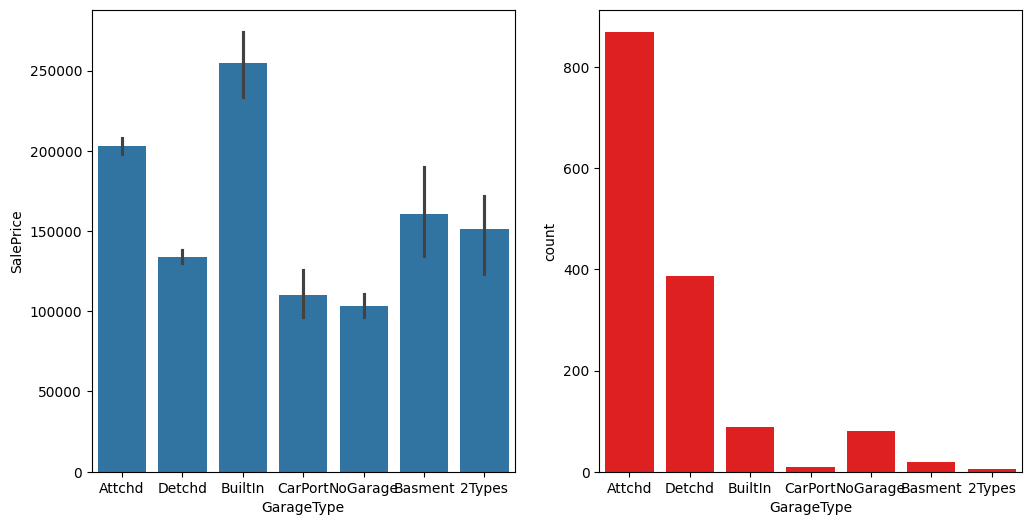

In [211]:
categorical_correlation_plot(df_clean, 'GarageType', 'SalePrice')

In [212]:
f_stat, p_value = anova_test(df_clean, 'GarageType', 'SalePrice')
print(f'f_stat value between GarageType and SalePrice is: {round(f_stat, 4)}')
print(f'p_value between GarageType and SalePrice is: {p_value}')

f_stat value between GarageType and SalePrice is: 80.38
p_value between GarageType and SalePrice is: 6.117025805441844e-87


#### <span style = 'color: green'><u>**OneHotEncoder**</u></span>

### <span style = 'color: yellow'>GarageYrBlt - year garage was built</span>

In [213]:
df_clean['GarageYrBlt'].isna().sum()

np.int64(81)

#### fill those missing value with the built year of the house

In [214]:
df_clean['GarageYrBlt'] = df_clean['GarageYrBlt'].fillna(df_clean['YearBuilt'])

             GarageYrBlt  SalePrice
GarageYrBlt     1.000000   0.508043
SalePrice       0.508043   1.000000


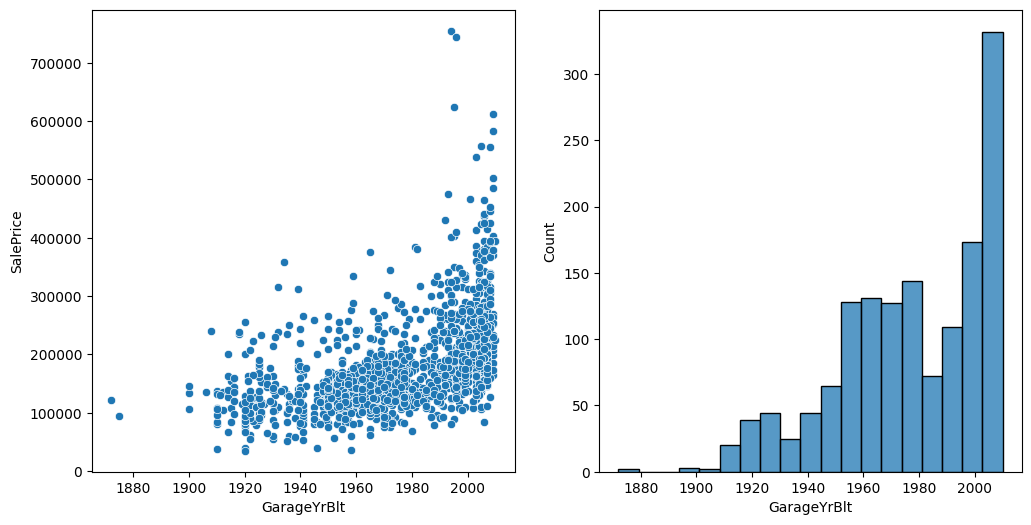

In [215]:
numeric_correlation(df_clean, 'GarageYrBlt', 'SalePrice')

In [216]:
skewness = skew(df_clean['GarageYrBlt'])
skewness

np.float64(-0.693615411226019)

#### <span style = 'color: green'><u>**standardize**</u></span>

### <span style = 'color: yellow'>GarageFinish - interior finish of the garage</span>

In [217]:
df_clean['GarageFinish'].isna().sum()

np.int64(81)

In [218]:
df_clean['GarageFinish'] = df_clean['GarageFinish'].replace(np.nan, 'NoGarage')

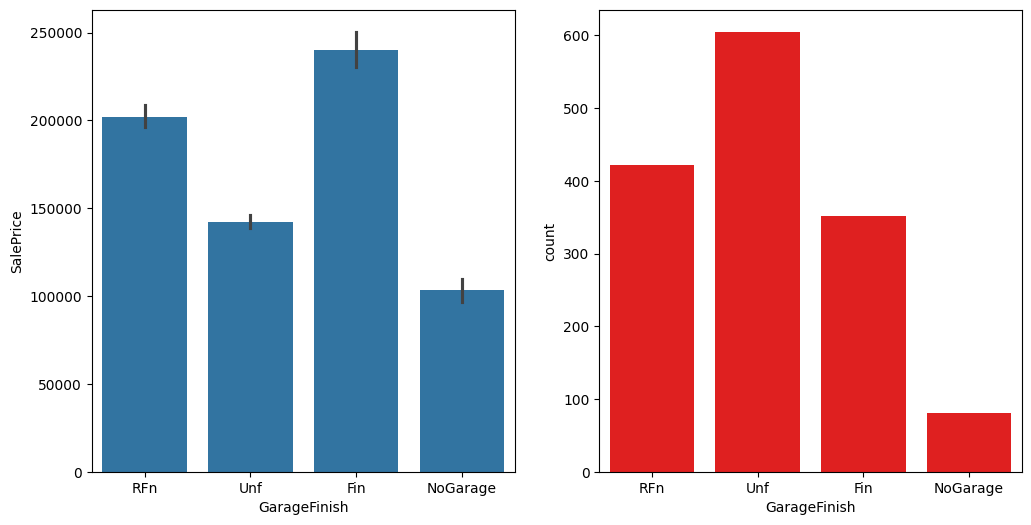

In [219]:
categorical_correlation_plot(df_clean, 'GarageFinish', 'SalePrice')

In [220]:
f_stat, p_value = anova_test(df_clean, 'GarageFinish', 'SalePrice')
print(f'f_stat value between GarageFinish and SalePrice is: {round(f_stat, 4)}')
print(f'p_value between GarageFinish and SalePrice is: {p_value}')

f_stat value between GarageFinish and SalePrice is: 213.867
p_value between GarageFinish and SalePrice is: 6.228747181517754e-115


#### <span style = 'color: green'><u>**OneHotEncoder**</u></span>

### <span style = 'color: yellow'>GarageCars - size of garage in car capacity</span>

In [221]:
df_clean['GarageCars'].isna().sum()

np.int64(0)

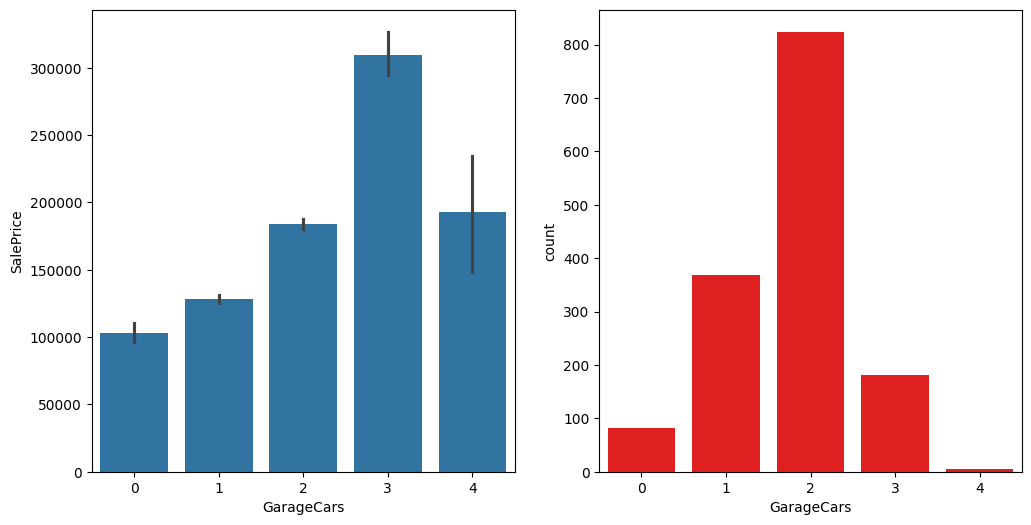

In [222]:
categorical_correlation_plot(df_clean, 'GarageCars', 'SalePrice')

In [223]:
f_stat, p_value = anova_test(df_clean, 'GarageCars', 'SalePrice')
print(f'f_stat value between GarageCars and SalePrice is: {round(f_stat, 4)}')
print(f'p_value between GarageCars and SalePrice is: {p_value}')

f_stat value between GarageCars and SalePrice is: 351.2075
p_value between GarageCars and SalePrice is: 1.1211287650614395e-211


#### <span style = 'color: green'><u>**keep it passthrough**</u></span>

### <span style = 'color: yellow'>GarageArea - size of garage in square feet</span>

In [224]:
df_clean['GarageArea'].isna().sum()

np.int64(0)

            GarageArea  SalePrice
GarageArea    1.000000   0.623431
SalePrice     0.623431   1.000000


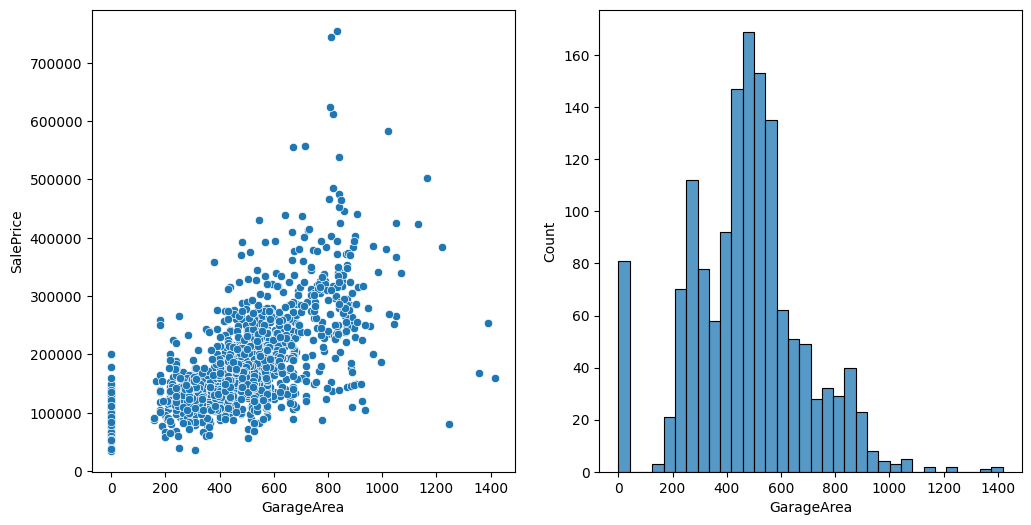

In [225]:
numeric_correlation(df_clean, 'GarageArea', 'SalePrice')

In [226]:
skewness = skew(df_clean['GarageArea'])
skewness

np.float64(0.1797959420587727)

#### <span style = 'color: green'><u>**PowerTransformer + standardize**</u></span>

### <span style = 'color: yellow'>GarageQual - garage quality</span>

In [227]:
df_clean['GarageQual'].isna().sum()

np.int64(81)

In [228]:
df_clean['GarageQual'] = df_clean['GarageQual'].replace(np.nan, 'NoGarage')

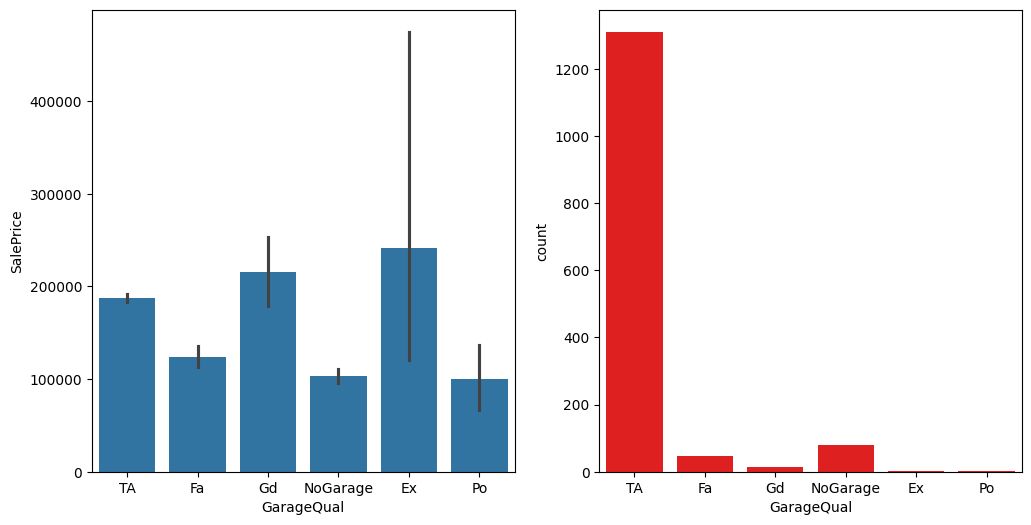

In [229]:
categorical_correlation_plot(df_clean, 'GarageQual', 'SalePrice')

In [230]:
f_stat, p_value = anova_test(df_clean, 'GarageQual', 'SalePrice')
print(f'f_stat value between GarageQual and SalePrice is: {round(f_stat, 4)}')
print(f'p_value between GarageQual and SalePrice is: {p_value}')

f_stat value between GarageQual and SalePrice is: 25.7761
p_value between GarageQual and SalePrice is: 5.388762379336016e-25


#### <span style = 'color: green'><u>**OneHotEncoder**</u></span>

### <span style = 'color: yellow'>GarageCond - garage condition</span>

In [231]:
df_clean['GarageCond'].isna().sum()

np.int64(81)

In [232]:
df_clean['GarageCond'] = df_clean['GarageCond'].replace(np.nan, 'NoGarage')

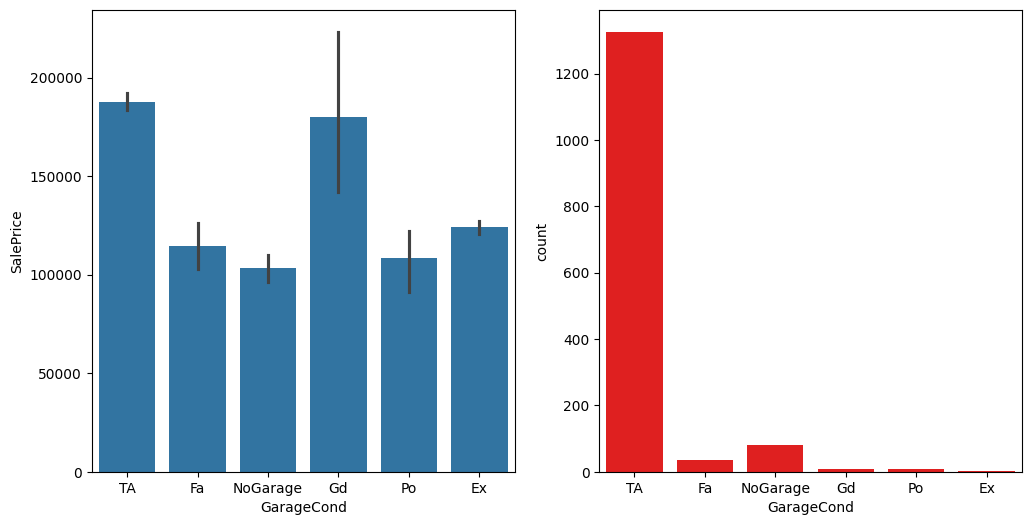

In [233]:
categorical_correlation_plot(df_clean, 'GarageCond', 'SalePrice')

In [234]:
f_stat, p_value = anova_test(df_clean, 'GarageCond', 'SalePrice')
print(f'f_stat value between GarageCond and SalePrice is: {round(f_stat, 4)}')
print(f'p_value between GarageCond and SalePrice is: {p_value}')

f_stat value between GarageCond and SalePrice is: 25.7502
p_value between GarageCond and SalePrice is: 5.711745645774751e-25


#### <span style = 'color: green'><u>**OneHotEncoder**</u></span>

### <span style = 'color: yellow'>PavedDrive - paved driveway</span>

In [235]:
df_clean['PavedDrive'].isna().sum()

np.int64(0)

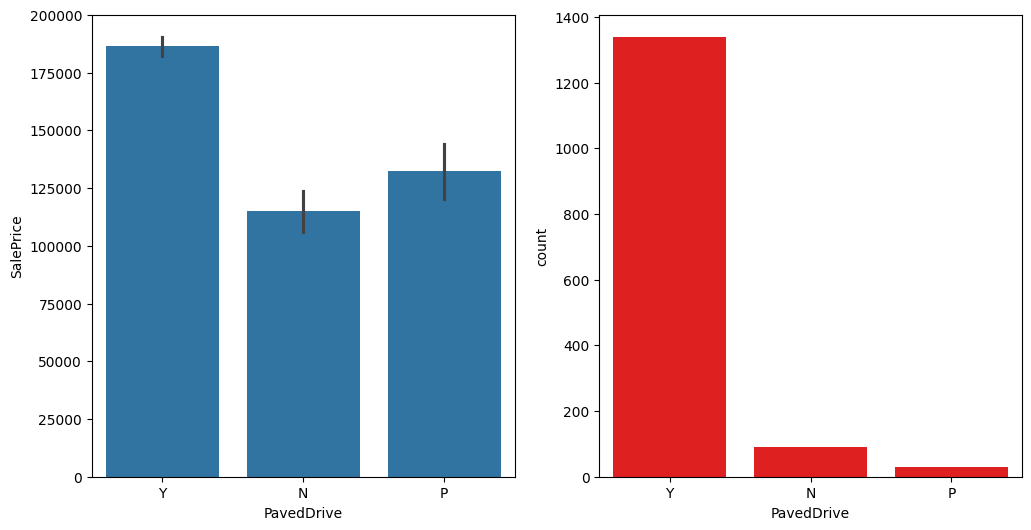

In [236]:
categorical_correlation_plot(df_clean, 'PavedDrive', 'SalePrice')

In [237]:
f_stat, p_value = anova_test(df_clean, 'PavedDrive', 'SalePrice')
print(f'f_stat value between PavedDrive and SalePrice is: {round(f_stat, 4)}')
print(f'p_value between PavedDrive and SalePrice is: {p_value}')

f_stat value between PavedDrive and SalePrice is: 42.0242
p_value between PavedDrive and SalePrice is: 1.8035688906531733e-18


#### <span style = 'color: green'><u>**OneHotEncoder**</u></span>

### <span style = 'color: yellow'>WoodDeckSF - wood deck area in square feet</span>

In [238]:
df_clean['WoodDeckSF'].isna().sum()

np.int64(0)

            WoodDeckSF  SalePrice
WoodDeckSF    1.000000   0.324413
SalePrice     0.324413   1.000000


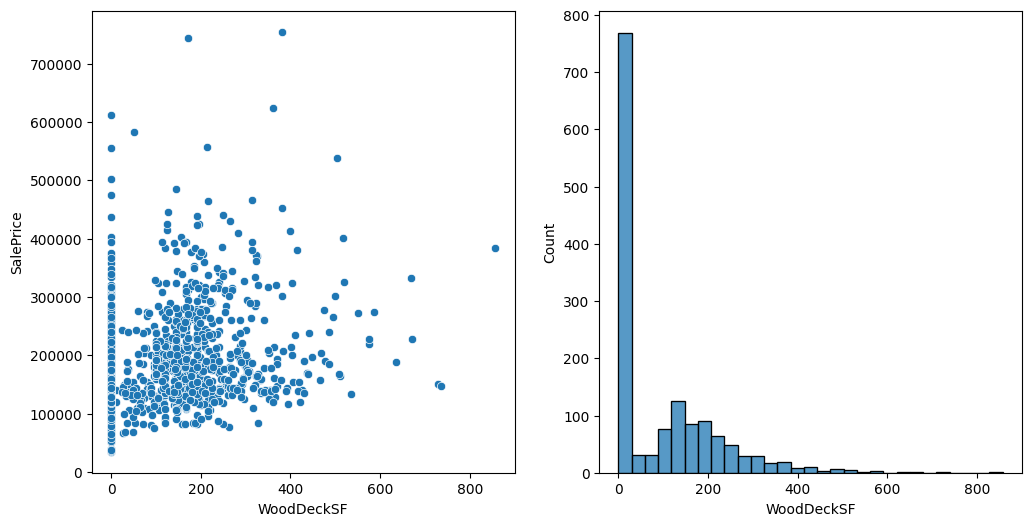

In [239]:
numeric_correlation(df_clean, 'WoodDeckSF', 'SalePrice')

#### <span style = 'color: green'><u>**PowerTransformer + Standardize**</u></span>

### <span style = 'color: yellow'>Has_Wooden_Deck - has wooden deck or not</span>

In [240]:
df_clean['Has_Wooden_Deck'] = (df_clean['WoodDeckSF'] != 0).astype(int)

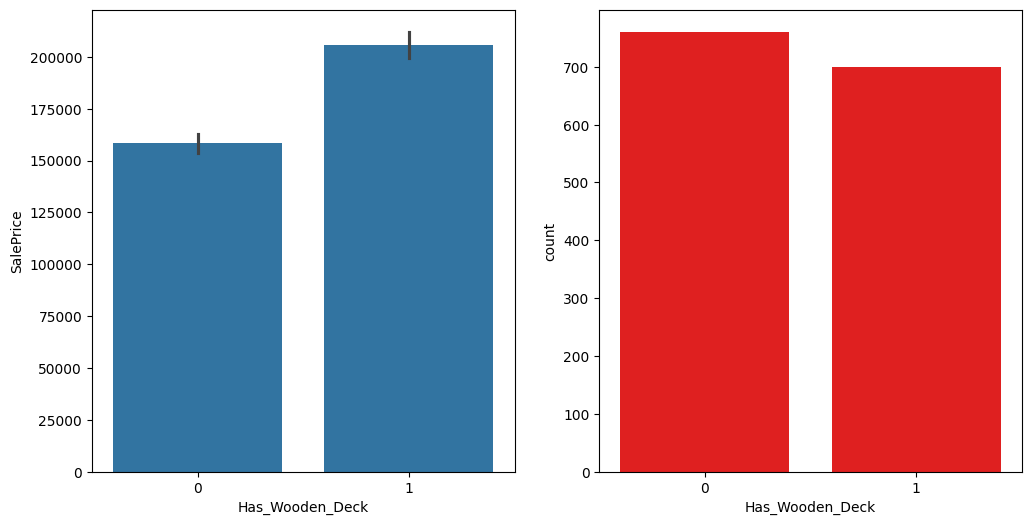

In [241]:
categorical_correlation_plot(df_clean, 'Has_Wooden_Deck', 'SalePrice')

In [242]:
f_stat, p_value = anova_test(df_clean, 'Has_Wooden_Deck', 'SalePrice')
print(f'f_stat value between Has_Wooden_Deck and SalePrice is: {round(f_stat, 4)}')
print(f'p_value between Has_Wooden_Deck and SalePrice is: {p_value}')

f_stat value between Has_Wooden_Deck and SalePrice is: 141.7413
p_value between Has_Wooden_Deck and SalePrice is: 2.9527459226210163e-31


#### <span style = 'color: green'><u>**keep it passthrough**</u></span>

### <span style = 'color: yellow'>OpenPorchSF - open porch area in square feet</span>

In [243]:
df_clean['OpenPorchSF'].isna().sum()

np.int64(0)

             OpenPorchSF  SalePrice
OpenPorchSF     1.000000   0.315856
SalePrice       0.315856   1.000000


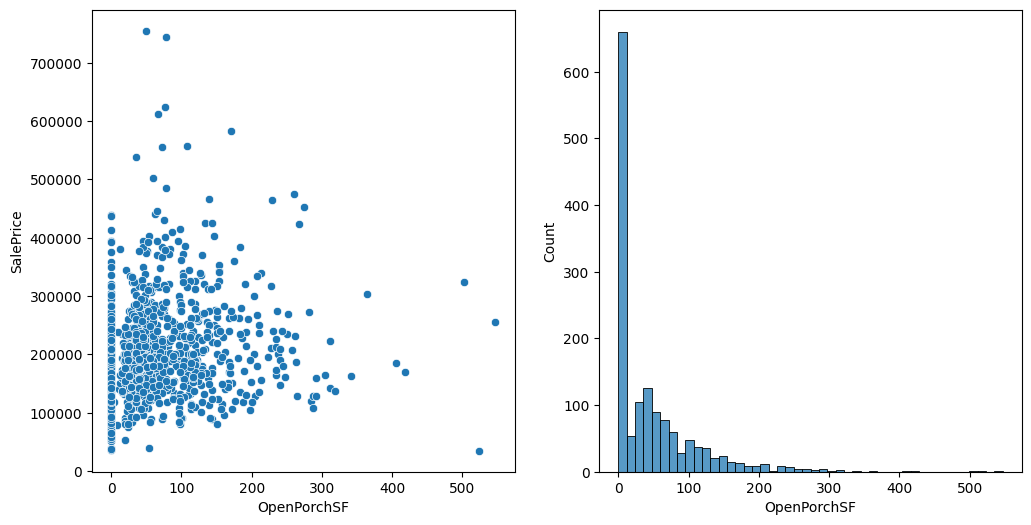

In [244]:
numeric_correlation(df_clean, 'OpenPorchSF', 'SalePrice')

#### <span style = 'color: green'><u>**PowerTransformer + Standardize**</u></span>

### <span style = 'color: yellow'>Has_Open_Porch - has open porch or not</span>

In [245]:
def has_open_porch(row):
    if row['OpenPorchSF'] == 0:
        return 0
    else:
        return 1
        
df_clean['Has_Open_Porch'] = df_clean.apply(has_open_porch, axis = 1)

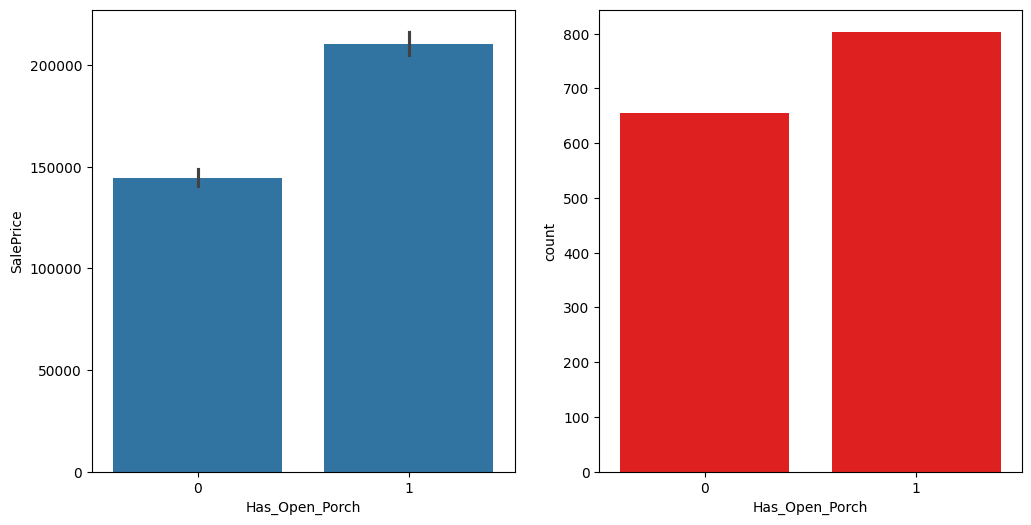

In [246]:
categorical_correlation_plot(df_clean, 'Has_Open_Porch', 'SalePrice')

In [247]:
f_stat, p_value = anova_test(df_clean, 'Has_Open_Porch', 'SalePrice')
print(f'f_stat value between Has_Open_Porch and SalePrice is: {round(f_stat, 4)}')
print(f'p_value between Has_Open_Porch and SalePrice is: {p_value}')

f_stat value between Has_Open_Porch and SalePrice is: 299.7593
p_value between Has_Open_Porch and SalePrice is: 3.2097702652587226e-61


### <span style = 'color: yellow'>EnclosedPorch - enclosed porch area in square feet</span>

In [248]:
df_clean['EnclosedPorch'].isna().sum()

np.int64(0)

In [249]:
df_clean['EnclosedPorch'].value_counts()

EnclosedPorch
0      1252
112      15
96        6
192       5
144       5
       ... 
54        1
136       1
148       1
140       1
99        1
Name: count, Length: 120, dtype: int64

               EnclosedPorch  SalePrice
EnclosedPorch       1.000000  -0.128578
SalePrice          -0.128578   1.000000


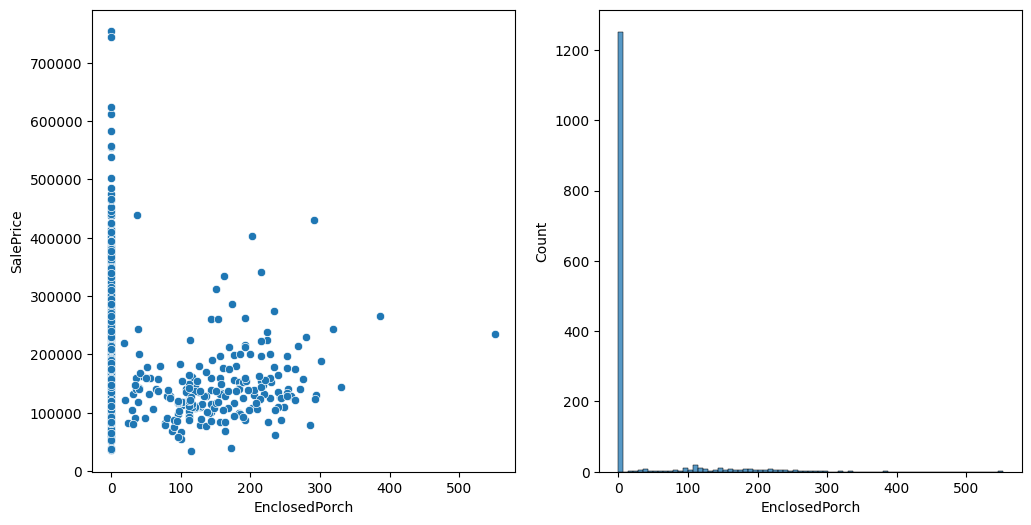

In [250]:
numeric_correlation(df_clean, 'EnclosedPorch', 'SalePrice')

#### <span style = 'color: green'><u>**extremely imbalanced. Drop the feature**</u></span>

### <span style = 'color: yellow'>Has_Enclose_Porch - has enclosed porch or not</span>

In [251]:
def has_enclosed_porch(row):
    if row['EnclosedPorch'] == 0:
        return 0
    else:
        return 1
df_clean['Has_Enclose_Porch'] = df_clean.apply(has_enclosed_porch, axis = 1)

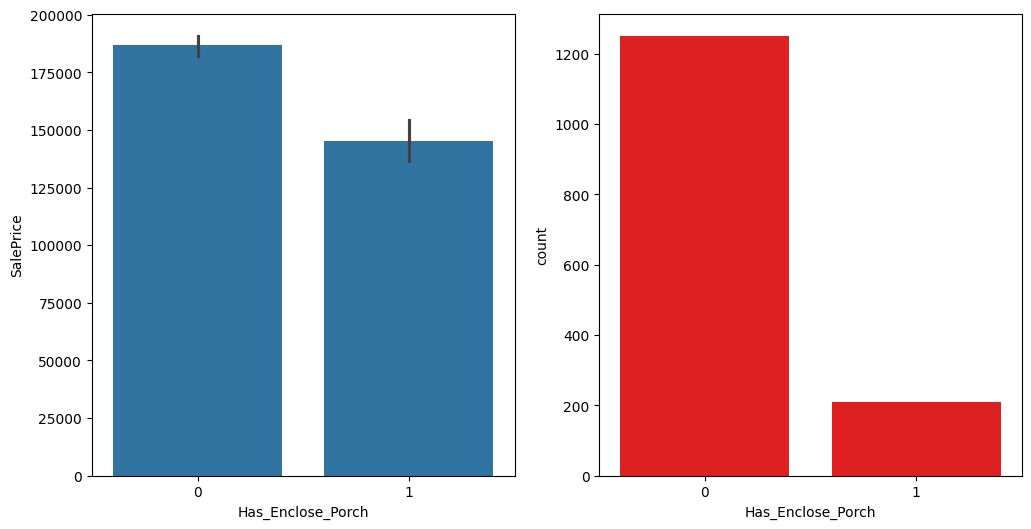

In [252]:
categorical_correlation_plot(df_clean, 'Has_Enclose_Porch', 'SalePrice')

In [253]:
f_stat, p_value = anova_test(df_clean, 'Has_Enclose_Porch', 'SalePrice')
print(f'f_stat value between Has_Enclose_Porch and SalePrice is: {round(f_stat, 4)}')
print(f'p_value between Has_Enclose_Porch and SalePrice is: {p_value}')

f_stat value between Has_Enclose_Porch and SalePrice is: 50.7325
p_value between Has_Enclose_Porch and SalePrice is: 1.657229233663709e-12


#### <span style = 'color: green'><u>**keep it passthrough**</u></span>

### <span style = 'color: yellow'>3SsnPorch - three season porch area in square feet</span>

In [254]:
df_clean['3SsnPorch'].isna().sum()

np.int64(0)

In [255]:
df_clean['3SsnPorch'].value_counts()

3SsnPorch
0      1436
168       3
144       2
180       2
216       2
290       1
153       1
96        1
23        1
162       1
182       1
196       1
320       1
245       1
238       1
508       1
140       1
130       1
407       1
304       1
Name: count, dtype: int64

           3SsnPorch  SalePrice
3SsnPorch   1.000000   0.044584
SalePrice   0.044584   1.000000


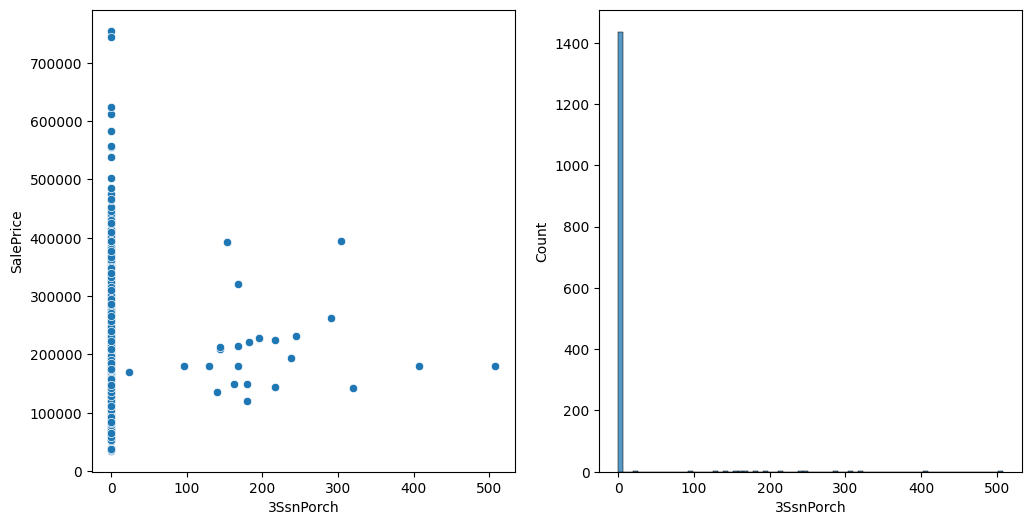

In [256]:
numeric_correlation(df_clean, '3SsnPorch', 'SalePrice')

#### <span style = 'color: green'><u>**extremely imbalanced. Drop the feature**</u></span>

### <span style = 'color: yellow'>Has_3Sn_Porch - has 3 season porch or not</span>

In [257]:
def has_three_season_porch(row):
    if row['3SsnPorch'] == 0:
        return 0
    else:
        return 1
df_clean['Has_3Sn_Porch'] = df_clean.apply(has_three_season_porch, axis = 1)

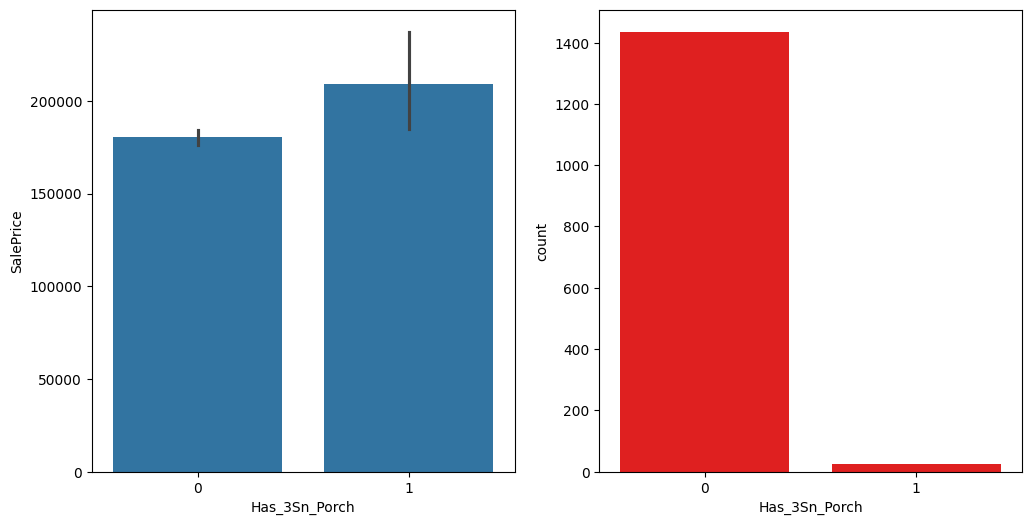

In [258]:
categorical_correlation_plot(df_clean, 'Has_3Sn_Porch', 'SalePrice')

In [259]:
f_stat, p_value = anova_test(df_clean, 'Has_3Sn_Porch', 'SalePrice')
print(f'f_stat value between Has_3Sn_Porch and SalePrice is: {round(f_stat, 4)}')
print(f'p_value between Has_3Sn_Porch and SalePrice is: {p_value}')

f_stat value between Has_3Sn_Porch and SalePrice is: 3.0937
p_value between Has_3Sn_Porch and SalePrice is: 0.07880723532504473


#### <span style = 'color: green'><u>**keep it passthrough**</u></span>

### <span style = 'color: yellow'>ScreenPorch - screen porch area in square feet</span>

In [260]:
df_clean['ScreenPorch'].isna().sum()

np.int64(0)

             ScreenPorch  SalePrice
ScreenPorch     1.000000   0.111447
SalePrice       0.111447   1.000000


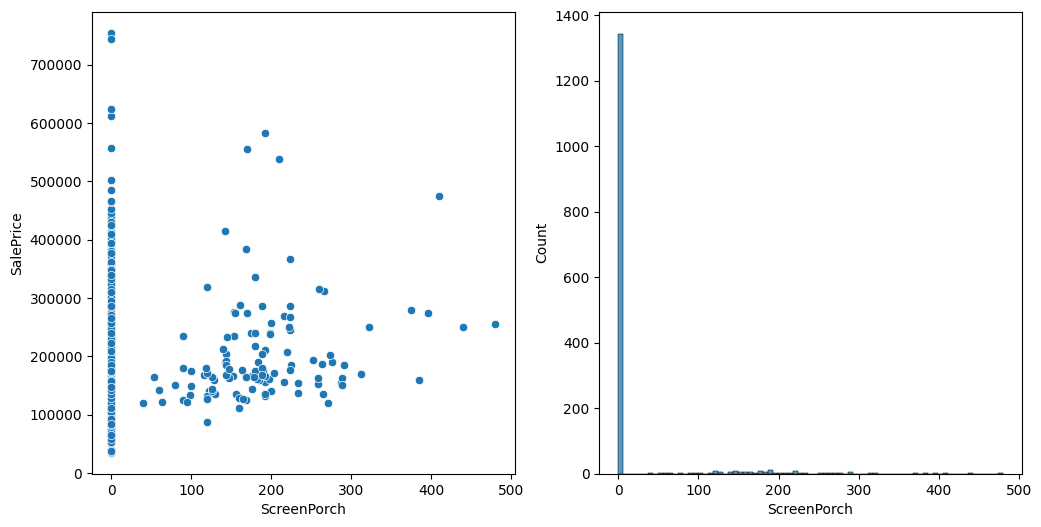

In [261]:
numeric_correlation(df_clean, 'ScreenPorch', 'SalePrice')

#### <span style = 'color: green'><u>**extremely imbalanced. Drop the feature**</u></span>

### <span style = 'color: yellow'>Has_Screen_Porch - has screen porch or not</span>

In [262]:
def has_screen_porch(row):
    if row['ScreenPorch'] == 0:
        return 0
    else:
        return 1
df_clean['Has_Screen_Porch'] = df_clean.apply(has_screen_porch, axis = 1)

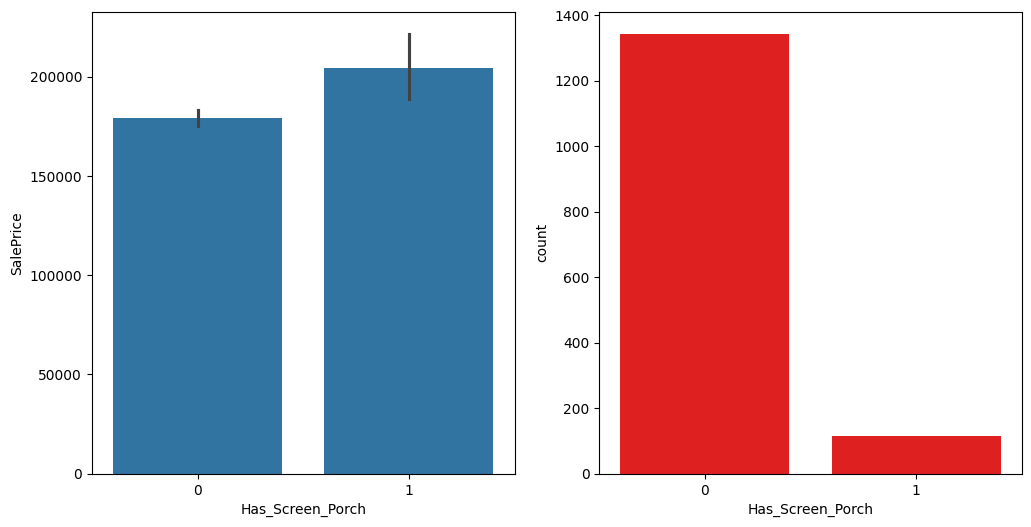

In [263]:
categorical_correlation_plot(df_clean, 'Has_Screen_Porch', 'SalePrice')

In [264]:
f_stat, p_value = anova_test(df_clean, 'Has_Screen_Porch', 'SalePrice')
print(f'f_stat value between Has_Screen_Porch and SalePrice is: {round(f_stat, 4)}')
print(f'p_value between Has_Screen_Porch and SalePrice is: {p_value}')

f_stat value between Has_Screen_Porch and SalePrice is: 11.1566
p_value between Has_Screen_Porch and SalePrice is: 0.0008584699305275489


#### <span style = 'color: green'><u>**keep it passthrough**</u></span>

### <span style = 'color: yellow'>Total_Porch_Area - total porch area in square feet</span>

In [265]:
df_clean['Total_Porch_Area'] = df_clean['OpenPorchSF'] + df_clean['EnclosedPorch'] + df_clean['3SsnPorch'] + df_clean['ScreenPorch']

                  Total_Porch_Area  SalePrice
Total_Porch_Area          1.000000   0.195739
SalePrice                 0.195739   1.000000


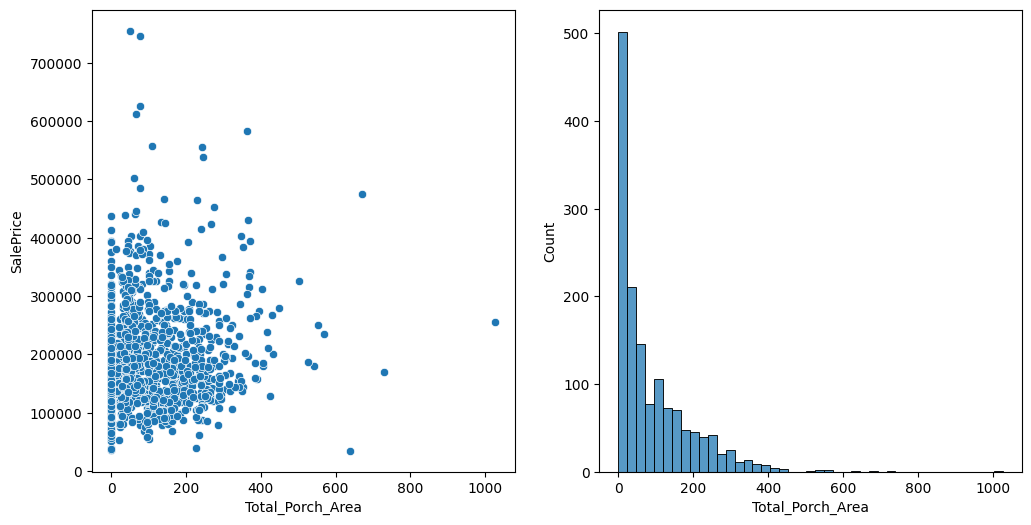

In [266]:
numeric_correlation(df_clean, 'Total_Porch_Area', 'SalePrice')

#### <span style = 'color: green'><u>**PowerTransformer + Standardize**</u></span>

### <span style = 'color: yellow'>PoolArea - pool area in square feet</span>

In [267]:
df_clean['PoolArea'].isna().sum()

np.int64(0)

In [268]:
df_clean['PoolArea'].value_counts()

PoolArea
0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: count, dtype: int64

           PoolArea  SalePrice
PoolArea   1.000000   0.092404
SalePrice  0.092404   1.000000


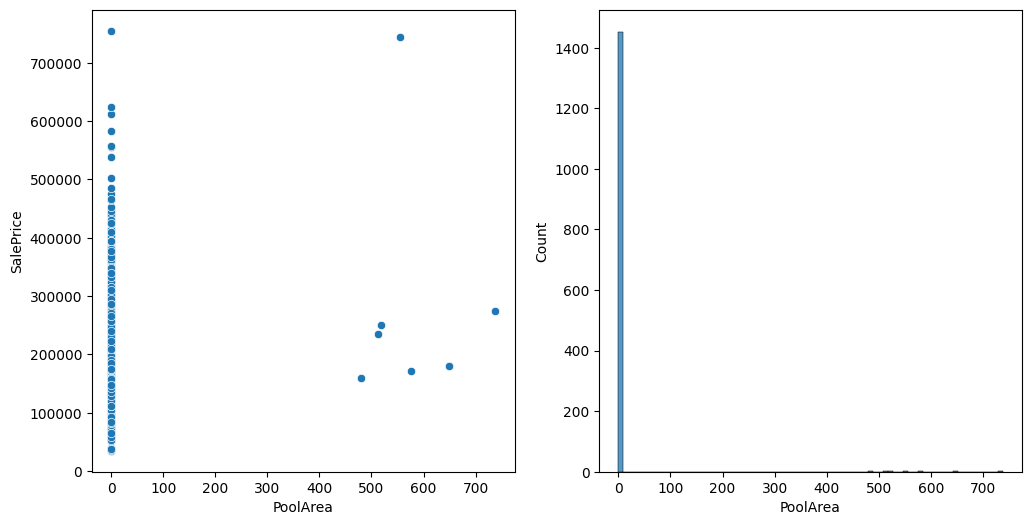

In [269]:
numeric_correlation(df_clean, 'PoolArea', 'SalePrice')

#### <span style = 'color: green'><u>**extremely imbalanced. Drop the feature**</u></span>

### <span style = 'color: yellow'>Has_Pool - check if there is a pool in the house</span>

In [270]:
df_clean["Has_Pool"] = (df_clean["PoolArea"] > 0).astype(int)

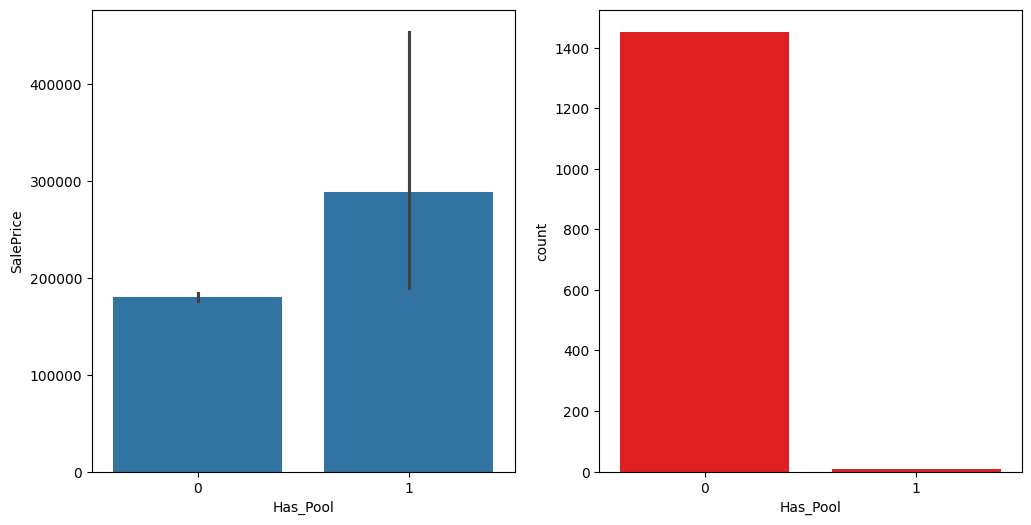

In [271]:
categorical_correlation_plot(df_clean, 'Has_Pool', 'SalePrice')

In [272]:
f_stat, p_value = anova_test(df_clean, 'Has_Pool', 'SalePrice')
print(f'f_stat value between Has_Pool and SalePrice is: {round(f_stat, 4)}')
print(f'p_value between Has_Pool and SalePrice is: {p_value}')

f_stat value between Has_Pool and SalePrice is: 12.9164
p_value between Has_Pool and SalePrice is: 0.00033655238143039806


#### <span style = 'color: green'><u>**keep it passthrough**</u></span>

### <span style = 'color: yellow'>PoolQC - pool quality</span>

In [273]:
df_clean['PoolQC'].isna().sum()

np.int64(1453)

In [274]:
df_clean['PoolQC'] = df_clean['PoolQC'].replace(np.nan, 'NoPool')

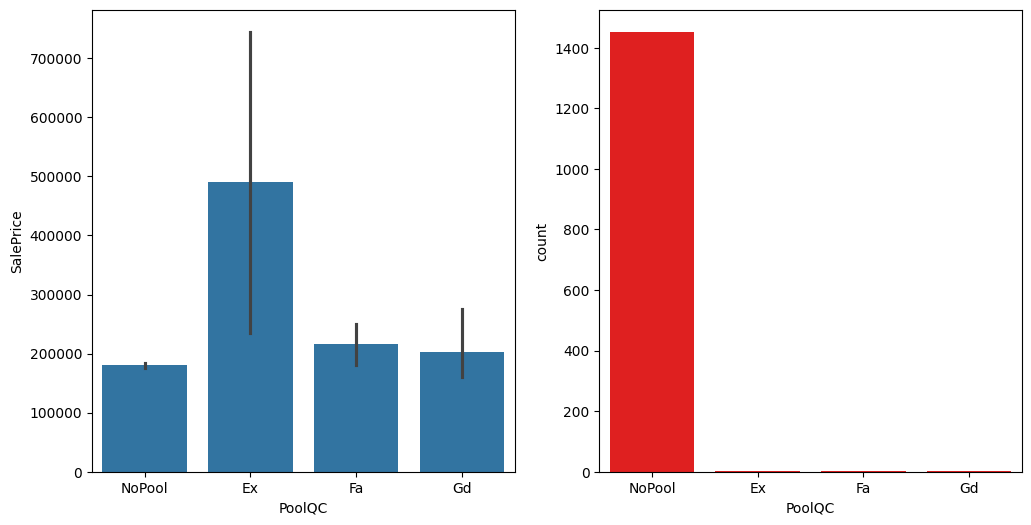

In [275]:
categorical_correlation_plot(df_clean, 'PoolQC', 'SalePrice')

In [276]:
f_stat, p_value = anova_test(df_clean, 'PoolQC', 'SalePrice')
print(f'f_stat value between PoolQC and SalePrice is: {round(f_stat, 4)}')
print(f'p_value between PoolQC and SalePrice is: {p_value}')

f_stat value between PoolQC and SalePrice is: 10.5099
p_value between PoolQC and SalePrice is: 7.700989415718202e-07


#### <span style = 'color: green'><u>**OneHotEncoder**</u></span>

### <span style = 'color: yellow'>Fence - fence quality</span>

In [277]:
df_clean['Fence'].isna().sum()

np.int64(1179)

In [278]:
df_clean['Fence'] = df_clean['Fence'].replace(np.nan, 'NoFence')

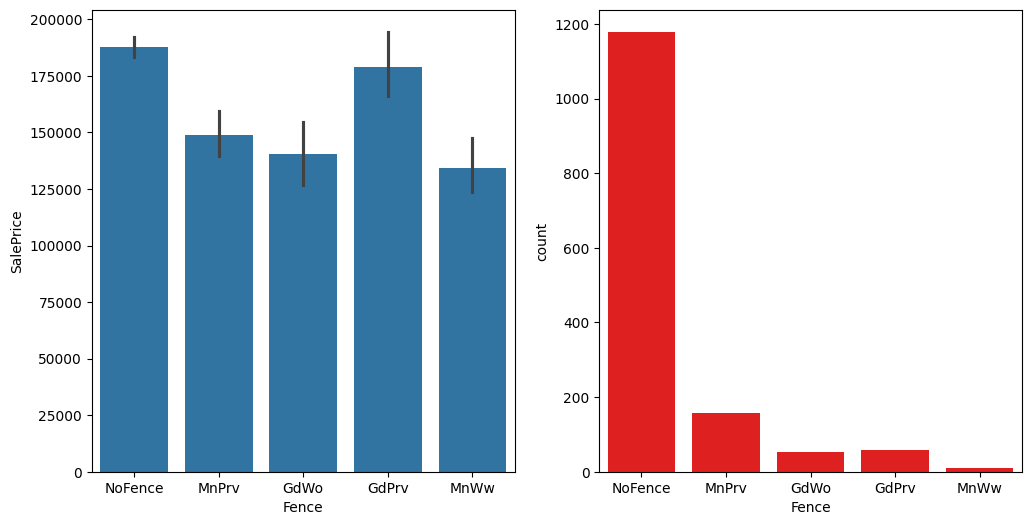

In [279]:
categorical_correlation_plot(df_clean, 'Fence', 'SalePrice')

In [280]:
f_stat, p_value = anova_test(df_clean, 'Fence', 'SalePrice')
print(f'f_stat value between Fence and SalePrice is: {round(f_stat, 4)}')
print(f'p_value between Fence and SalePrice is: {p_value}')

f_stat value between Fence and SalePrice is: 13.4333
p_value between Fence and SalePrice is: 9.379976594788224e-11


#### <span style = 'color: green'><u>**OneHotEncoder**</u></span>

### <span style = 'color: yellow'>MiscFeature - Miscellaneous feature not covered in other categories</span>

In [281]:
df_clean['MiscFeature'].isna().sum()

np.int64(1406)

In [282]:
df_clean['MiscFeature'] = df_clean['MiscFeature'].replace(np.nan, 'NoFeature')

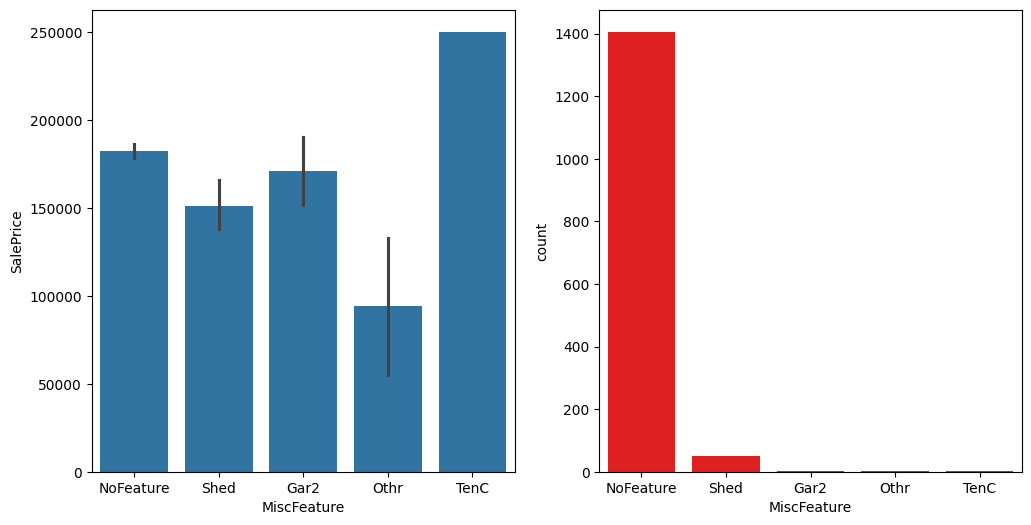

In [283]:
categorical_correlation_plot(df_clean, 'MiscFeature', 'SalePrice')

In [284]:
f_stat, p_value = anova_test(df_clean, 'MiscFeature', 'SalePrice')
print(f'f_stat value between MiscFeature and SalePrice is: {round(f_stat, 4)}')
print(f'p_value between MiscFeature and SalePrice is: {p_value}')

f_stat value between MiscFeature and SalePrice is: 2.5936
p_value between MiscFeature and SalePrice is: 0.0350036718754266


#### <span style = 'color: green'><u>**OneHotEncoder**</u></span>

### <span style = 'color: yellow'>MiscVal - value of Miscellaneous feature</span>

In [285]:
df_clean['MiscVal'].isna().sum()

np.int64(0)

           MiscVal  SalePrice
MiscVal    1.00000   -0.02119
SalePrice -0.02119    1.00000


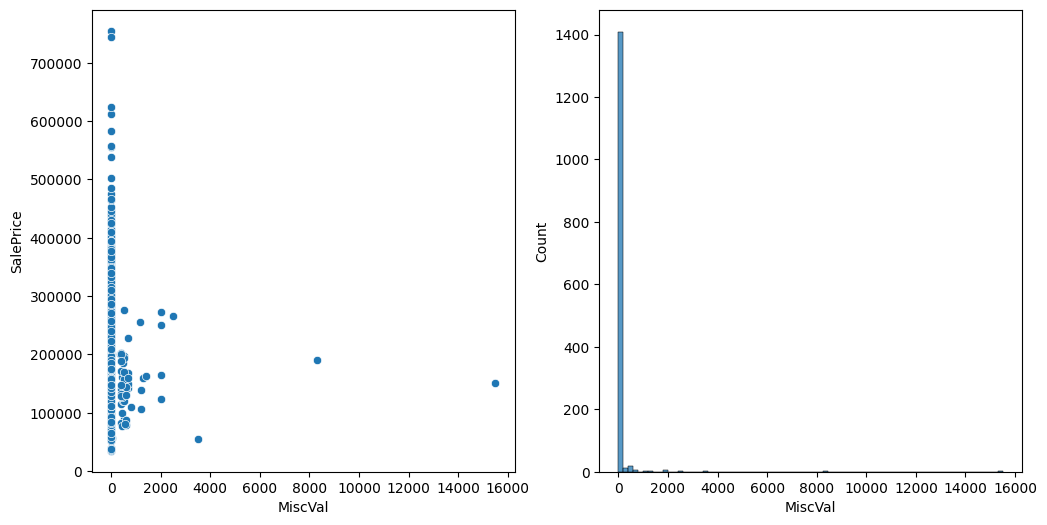

In [286]:
numeric_correlation(df_clean, 'MiscVal', 'SalePrice')

#### <span style = 'color: green'><u>**extremely imbalanced. Drop the feature**</u></span>

### <span style = 'color: yellow'>MoSold - month sold</span>

In [287]:
df_clean['MoSold'].isna().sum()

np.int64(0)

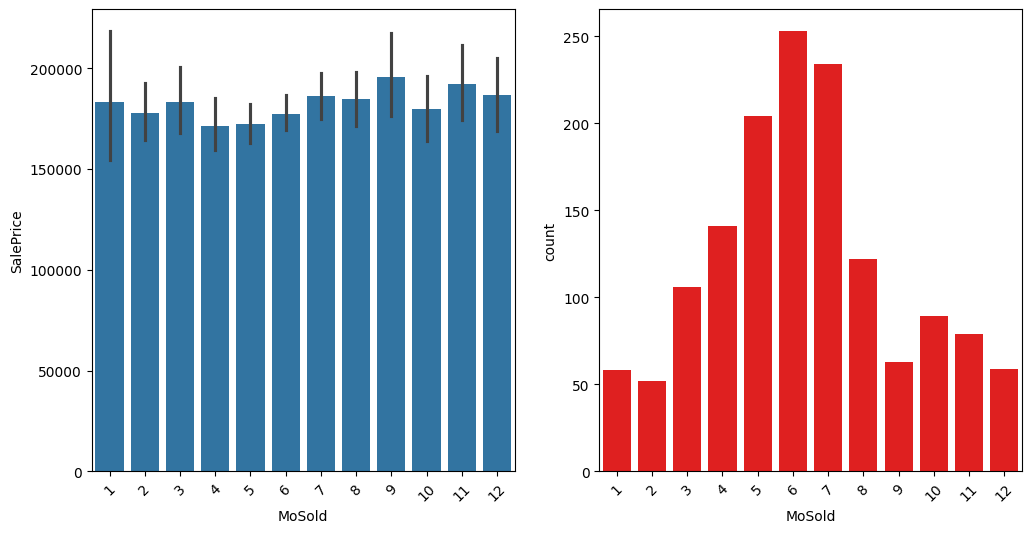

In [288]:
categorical_correlation_plot(df_clean, 'MoSold', 'SalePrice')

In [289]:
f_stat, p_value = anova_test(df_clean, 'MoSold', 'SalePrice')
print(f'f_stat value between MoSold and SalePrice is: {round(f_stat, 4)}')
print(f'p_value between MoSold and SalePrice is: {p_value}')

f_stat value between MoSold and SalePrice is: 0.9579
p_value between MoSold and SalePrice is: 0.4833523298919613


#### <span style = 'color: green'><u>**OneHotEncoder**</u></span>

### <span style = 'color: yellow'>YrSold - year sold</span>

In [290]:
df_clean['YrSold'].isna().sum()

np.int64(0)

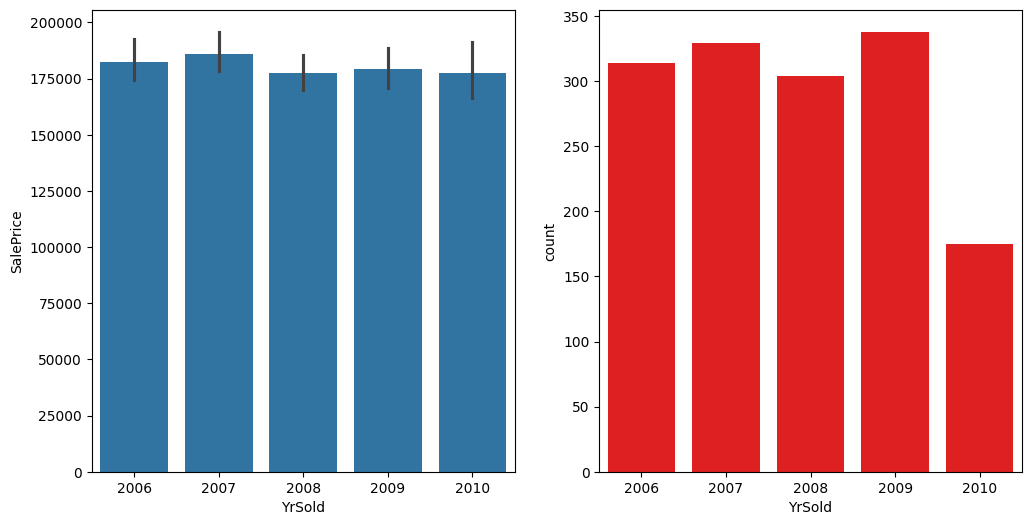

In [291]:
categorical_correlation_plot(df_clean, 'YrSold', 'SalePrice')

In [292]:
f_stat, p_value = anova_test(df_clean, 'YrSold', 'SalePrice')
print(f'f_stat value between YrSold and SalePrice is: {round(f_stat, 4)}')
print(f'p_value between YrSold and SalePrice is: {p_value}')

f_stat value between YrSold and SalePrice is: 0.6455
p_value between YrSold and SalePrice is: 0.6300887663573457


#### <span style = 'color: green'><u>**OneHotEncoder**</u></span>

### <span style = 'color: yellow'>Year_Month_Sold - year and month sold</span>

In [293]:
df_clean['YrSold_str'] = df_clean['YrSold'].astype(str)
df_clean['MoSold_str'] = df_clean['MoSold'].astype(str)
df_clean['Year_Month_Sold'] = df_clean['YrSold_str'] + '-' + df_clean['MoSold_str']

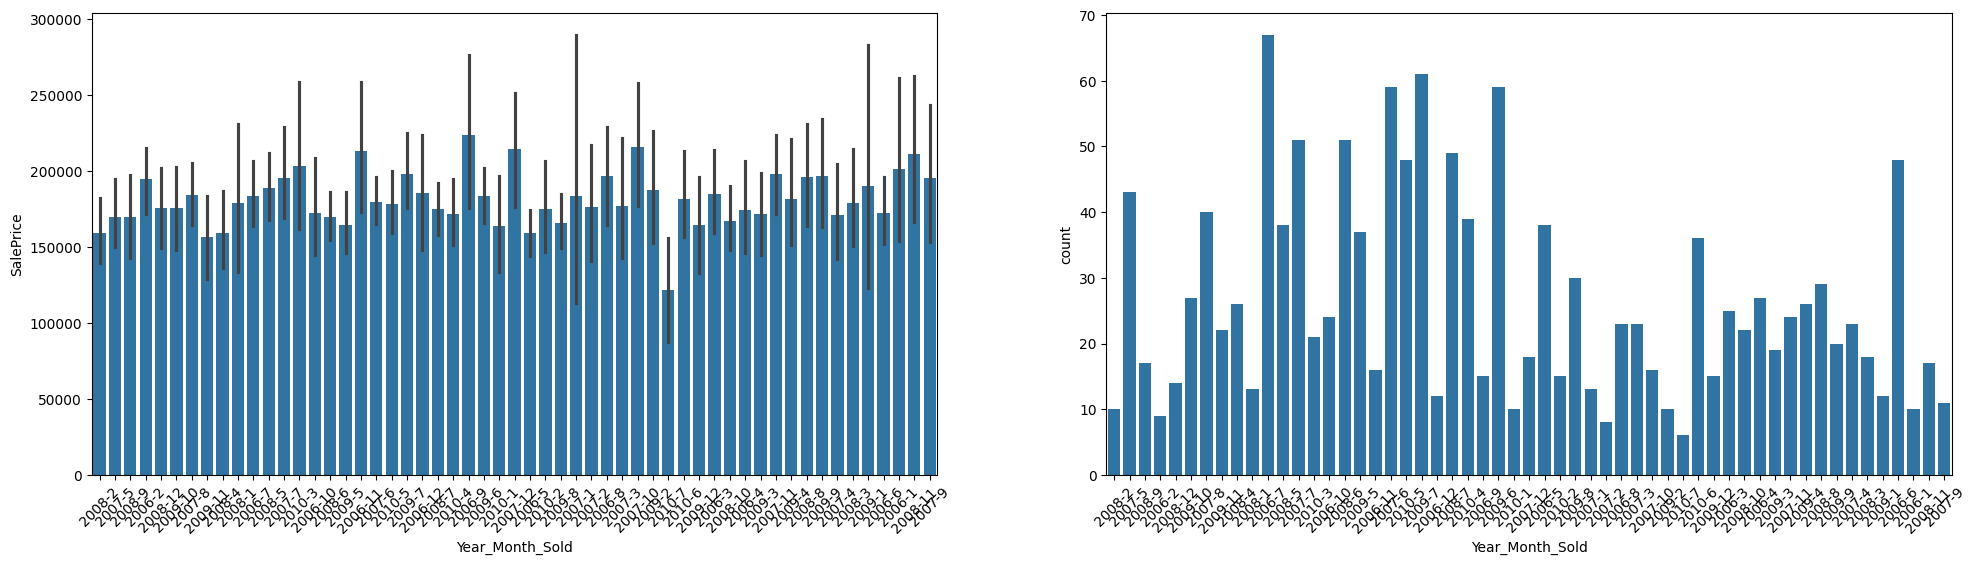

In [294]:
fig, ax = plt.subplots(1, 2, figsize = [24, 6])
sns.barplot(data = df_clean, x = 'Year_Month_Sold', y = 'SalePrice', ax = ax[0])
ax[0].tick_params(axis = 'x', rotation = 45)
sns.countplot(data = df_clean, x = 'Year_Month_Sold', ax = ax[1])
ax[1].tick_params(axis = 'x', rotation = 45)

In [295]:
f_stat, p_value = anova_test(df_clean, 'Year_Month_Sold', 'SalePrice')
print(f'f_stat value between Year_Month_Sold and SalePrice is: {round(f_stat, 4)}')
print(f'p_value between Year_Month_Sold and SalePrice is: {p_value}')

f_stat value between Year_Month_Sold and SalePrice is: 0.8942
p_value between Year_Month_Sold and SalePrice is: 0.6911655191495665


#### <span style = 'color: green'><u>**OneHotEncoder**</u></span>

### <span style = 'color: yellow'>Season_Sold - season sold</span>

In [296]:
# ames, Iowa four seasons
winter = [12, 1, 2]
spring = [3, 4, 5]
summer = [6, 7, 8]
fall = [9, 10, 11]
def seasons_sold(row):
    if row['MoSold'] in winter:
        return 'winter'
    elif row['MoSold'] in spring:
        return 'spring'
    elif row['MoSold'] in summer:
        return 'summer'
    else:
        return 'fall'
df_clean['Season_Sold'] = df_clean.apply(seasons_sold, axis = 1)

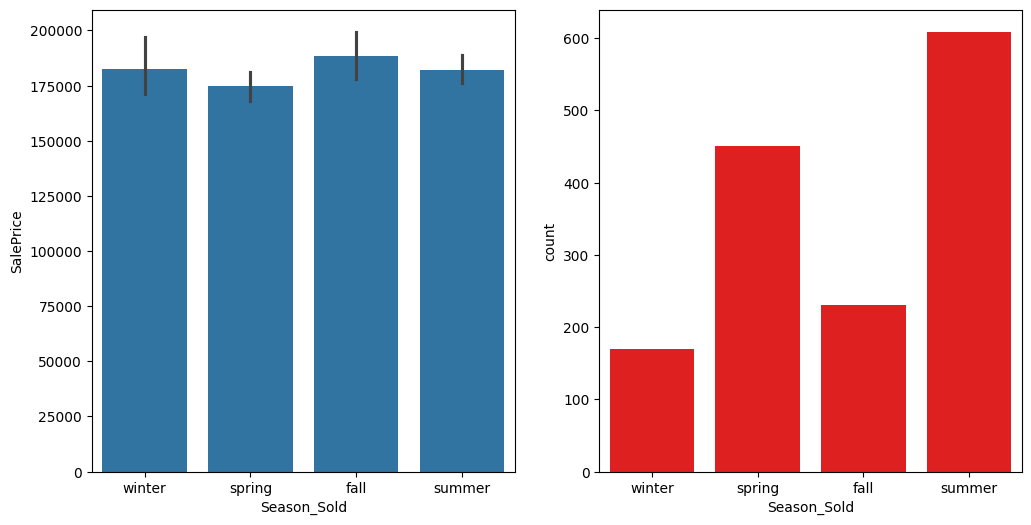

In [297]:
categorical_correlation_plot(df_clean, 'Season_Sold', 'SalePrice')

In [298]:
f_stat, p_value = anova_test(df_clean, 'Season_Sold', 'SalePrice')
print(f'f_stat value between Season_Sold and SalePrice is: {round(f_stat, 4)}')
print(f'p_value between Season_Sold and SalePrice is: {p_value}')

f_stat value between Season_Sold and SalePrice is: 1.6964
p_value between Season_Sold and SalePrice is: 0.16587644487660902


#### <span style = 'color: green'><u>**OneHotEncoder**</u></span>

### <span style = 'color: yellow'>SaleType - type of sale</span>

In [299]:
df_clean['SaleType'].isna().sum()

np.int64(0)

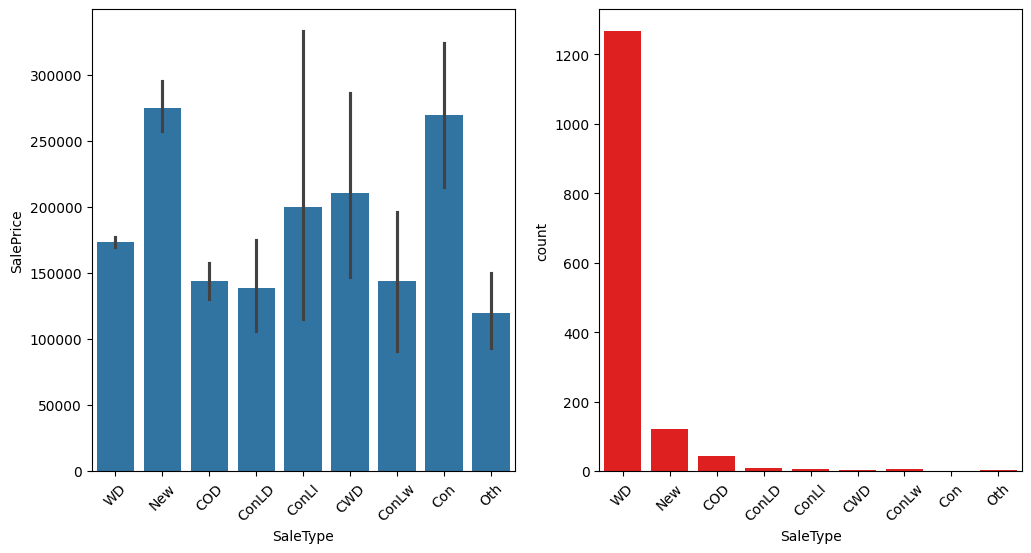

In [300]:
categorical_correlation_plot(df_clean, 'SaleType', 'SalePrice')

In [301]:
f_stat, p_value = anova_test(df_clean, 'SaleType', 'SalePrice')
print(f'f_stat value between SaleType and SalePrice is: {round(f_stat, 4)}')
print(f'p_value between SaleType and SalePrice is: {p_value}')

f_stat value between SaleType and SalePrice is: 28.8631
p_value between SaleType and SalePrice is: 5.0397668894664616e-42


#### <span style = 'color: green'><u>**OneHotEncoder**</u></span>

### <span style = 'color: yellow'>SaleCondition - condition of sale</span>

In [302]:
df_clean['SaleCondition'].isna().sum()

np.int64(0)

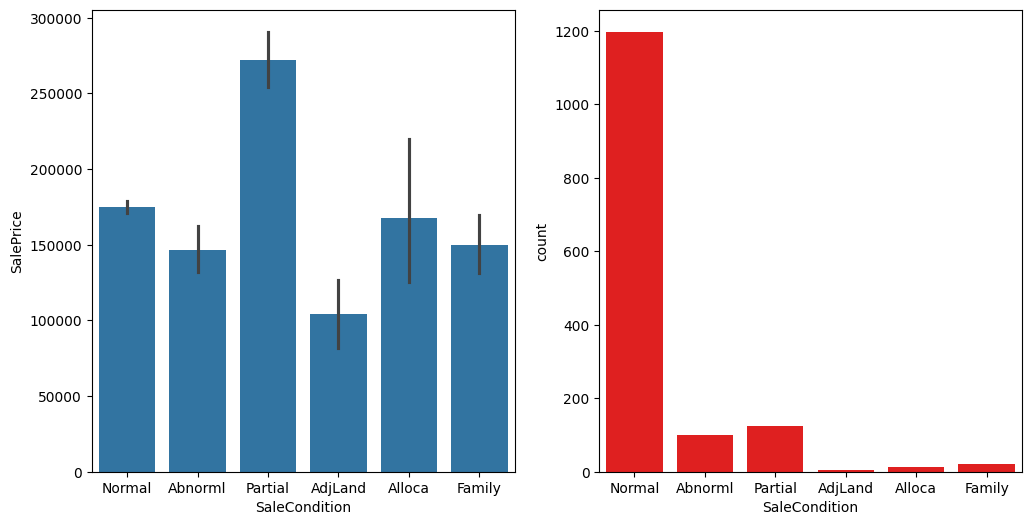

In [303]:
categorical_correlation_plot(df_clean, 'SaleCondition', 'SalePrice')

In [304]:
f_stat, p_value = anova_test(df_clean, 'SaleCondition', 'SalePrice')
print(f'f_stat value between SaleCondition and SalePrice is: {round(f_stat, 4)}')
print(f'p_value between SaleCondition and SalePrice is: {p_value}')

f_stat value between SaleCondition and SalePrice is: 45.5784
p_value between SaleCondition and SalePrice is: 7.988268404991176e-44


#### <span style = 'color: green'><u>**OneHotEncoder**</u></span>

### <span style = 'color: yellow'>SalePrice</span>

In [305]:
df_clean['SalePrice'].isna().sum()

np.int64(0)

<Axes: xlabel='SalePrice', ylabel='Count'>

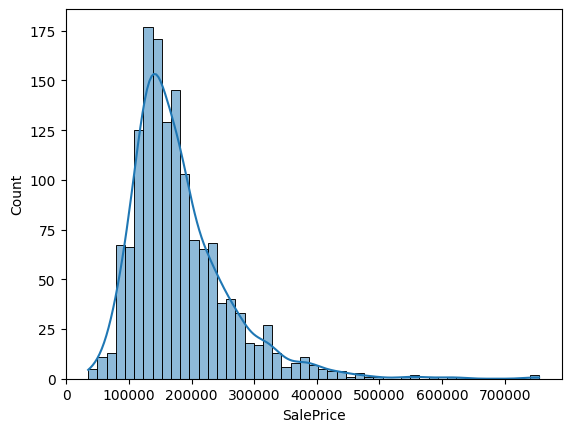

In [306]:
sns.histplot(data = df_clean, x = 'SalePrice', kde = True)

In [307]:
df_clean['SalePrice_log'] = np.log1p(df_clean['SalePrice'])

<Axes: xlabel='SalePrice_log', ylabel='Count'>

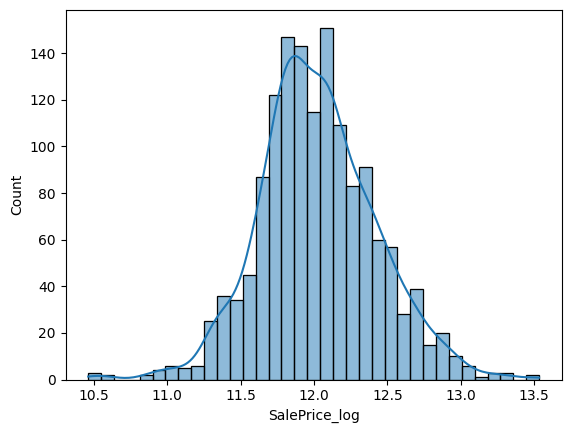

In [308]:
sns.histplot(data = df_clean, x = 'SalePrice_log', kde = True)

### <span style = 'color: blue'>check missing value</span>
#### - Alley has too many missing values. Drop the feature
#### - MasVnrType & MaxVnrArea combine to is_MasVnr

In [309]:
df_clean.isna().sum()[df_clean.isna().sum() > 0]

LotFrontage     259
MasVnrType      872
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
dtype: int64

In [310]:
joblib.dump(df_clean, '../data/df_clean.pkl')

['../data/df_clean.pkl']

In [311]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 101 entries, Id to SalePrice_log
dtypes: float64(5), int64(46), object(50)
memory usage: 1.1+ MB
